# Volatility Trading

This script should help to gather necessary data for volatility trading. Below is a list of things that I think I will need. At least from 2007 or 2008.

1. `VIX` Term Structure. 
    - From Quandl
2. `VIX` spot value, `VXV`, and `VVIX`.
    - From the CBOE website. 
3. `XIV`, `VXX`, `UVXY`, `VVIX`, `ZIV`, and `VXZ`.
    - Some of these do not go back as far as a robust backtest needs. I download them from Volatility Investing weblogs (six figures investing). They are artifically constructed from the futures contracts.
    - Intrinio
    - Synthetically built from futures contracts. This has the longest history, goes back to 2004.
4. `VVIX` and implied vol of `VXX` and `UVXY`.
    - Interactive Brokers. 

Potentially, this work can be expanded to other volatility indecies and products as well.

In [1]:
from IBPY import IB_PY
from Functions_Volatility_ETF_Trading import get_daily_from_ib
import numpy as np
import pandas as pd
import datetime
import quandl
import time
import intrinio
intrinio.client.username = '18bdb72ea412c75a62b5c8fb4f3ae00e'
intrinio.client.password = 'f983e02a890d7f0b7df4e460a86123c6'
# ===================
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

### Spot VIX, VXV, and VVIX

This is coming straight from CBOE. 

1. http://www.cboe.com/products/vix-index-volatility/vix-options-and-futures/vix-index/vix-historical-data
2. https://www.cboe.com/products/vix-index-volatility/volatility-on-stock-indexes/the-cboe-vvix-index

In [2]:
vix = pd.read_csv(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/vixcurrent.csv',
                 header = 1)
vix['pd_dates'] = pd.to_datetime(vix.Date)
vix.set_index('pd_dates', inplace=True)
vix.drop('Date', axis = 1, inplace=True)

In [3]:
vvix = pd.read_csv(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/vvixtimeseries.csv',
                 header = 1)
vvix['pd_dates'] = pd.to_datetime(vvix.Date)
vvix.set_index('pd_dates', inplace=True)
vvix.drop('Date', axis = 1, inplace=True)

In [4]:
vix3m = pd.read_csv(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/vix3mdailyprices.csv',
                 header = 2)
vix3m['pd_dates'] = pd.to_datetime(vix3m.iloc[:,0])
vix3m.set_index('pd_dates', inplace=True)
vix3m.drop(vix3m.columns[0], axis = 1, inplace=True)

In [5]:
vixmt = pd.read_csv(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/vxmtdailyprices.csv',
                 header = 2)
vixmt['pd_dates'] = pd.to_datetime(vixmt.iloc[:,0])
vixmt.set_index('pd_dates', inplace=True)
vixmt.drop(vixmt.columns[0], axis = 1, inplace=True)

In [6]:
xiv_long = pd.read_table(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/XIVlong.txt',
                         delimiter=',')
xiv_long['pd_dates'] = pd.to_datetime(xiv_long.Date)
xiv_long.set_index('pd_dates', inplace=True)
xiv_long.drop(xiv_long.columns[0], axis=1, inplace=True)

In [7]:
vxx_long = pd.read_table(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/VXXlong.txt',
                         delimiter=',')
vxx_long['pd_dates'] = pd.to_datetime(vxx_long.Date)
vxx_long.set_index('pd_dates', inplace=True)
vxx_long.drop(vxx_long.columns[0], axis=1, inplace=True)

In [8]:
vxst = pd.read_csv(filepath_or_buffer='/Users/HoumanDehghan/Documents/Quant Trading/VIX_CBOE_Data/vxstcurrent.csv',
                 header = 3)
vxst['pd_dates'] = pd.to_datetime(vxst.iloc[:,0], dayfirst=False)
vxst.set_index('pd_dates', inplace=True)
vxst.drop(vxst.columns[0], axis = 1, inplace=True)

### Daily Prices of ETF(N)'s

In [9]:
xiv = intrinio.prices(identifier='XIV', start_date='2007-01-01')

In [10]:
vxx = intrinio.prices(identifier='VXX', start_date='2007-01-01')

In [11]:
uvxy = intrinio.prices(identifier='UVXY', start_date='2007-01-01')

In [12]:
ziv = intrinio.prices(identifier='ZIV', start_date='2007-01-01')

In [13]:
vxz = intrinio.prices(identifier='VXZ', start_date='2007-01-01')

### Implied Volatility of ETF(N)'s from IB

The function is ready. We can simply query the IVOL from IB. 

In [2]:
VXX_ivol = get_daily_from_ib(ticker_='VXX', whatToShow_='OPTION_IMPLIED_VOLATILITY', how_many_years_back_= 2)

Server Version: 76
TWS Time at connection:20171227 11:22:16 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

In [7]:
UVXY_ivol = get_daily_from_ib(ticker_='UVXY', whatToShow_='OPTION_IMPLIED_VOLATILITY', how_many_years_back_= 2)

Server Version: 76
TWS Time at connection:20171227 11:29:46 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

In [32]:
VXZ_ivol = get_daily_from_ib(ticker_='VXZ', whatToShow_='OPTION_IMPLIED_VOLATILITY', how_many_years_back_= 2)

Server Version: 76
TWS Time at connection:20171227 11:38:15 EST
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Historical Data Handler - 
 - In Histor

### Term Structure of VIX

In [14]:
# querying the term structure of VIX from quandl
vx1 = quandl.get("CHRIS/CBOE_VX1") # Continuous front month VIX futures contract 
vx1.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx2 = quandl.get("CHRIS/CBOE_VX2") # Continuous 2nd month VIX futures contract 
vx2.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx3 = quandl.get("CHRIS/CBOE_VX3") # Continuous 3rd month VIX futures contract 
vx3.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx4 = quandl.get("CHRIS/CBOE_VX4") # Continuous 4th month VIX futures contract 
vx4.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx5 = quandl.get("CHRIS/CBOE_VX5") # Continuous 5th month VIX futures contract 
vx5.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx6 = quandl.get("CHRIS/CBOE_VX6") # Continuous 6th month VIX futures contract 
vx6.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx7 = quandl.get("CHRIS/CBOE_VX7") # Continuous 7th month VIX futures contract 
vx7.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx8 = quandl.get("CHRIS/CBOE_VX8") # Continuous 8th month VIX futures contract 
vx8.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)

vx9 = quandl.get("CHRIS/CBOE_VX9") # Continuous 9th month VIX futures contract 
vx9.drop(['Open', 'High', 'Low', 'Change', 'EFP'], axis = 1, inplace = True)


In [15]:
# Standardize them
cols = ['close', 'settle', 'volume', 'prev_day_open_interest']

cols1 = [a + '_1' for a in cols]
vx1.columns = tuple(cols1)

cols2 = [a + '_2' for a in cols]
vx2.columns = tuple(cols2)

cols3 = [a + '_3' for a in cols]
vx3.columns = tuple(cols3)

cols4 = [a + '_4' for a in cols]
vx4.columns = tuple(cols4)

cols5 = [a + '_5' for a in cols]
vx5.columns = tuple(cols5)

cols6 = [a + '_6' for a in cols]
vx6.columns = tuple(cols6)

cols7 = [a + '_7' for a in cols]
vx7.columns = tuple(cols7)

cols8 = [a + '_8' for a in cols]
vx8.columns = tuple(cols8)

cols9 = [a + '_9' for a in cols]
vx9.columns = tuple(cols9)


In [16]:
# Putting it all together
# The term structure of VIX futures
ts_vix = pd.concat([vx1, vx2], axis=1, join='inner')
ts_vix = pd.concat([ts_vix, vx3], axis = 1, join = 'inner')
ts_vix = pd.concat([ts_vix, vx4], axis = 1, join = 'inner')
ts_vix = pd.concat([ts_vix, vx5], axis = 1, join = 'inner')
ts_vix = pd.concat([ts_vix, vx6], axis = 1, join = 'inner')
ts_vix = pd.concat([ts_vix, vx7], axis = 1, join = 'inner')
# 8th and 9th months contracts make the history really short
#ts_vix = pd.concat([ts_vix, vx8], axis = 1, join = 'inner') 
#ts_vix = pd.concat([ts_vix, vx9], axis = 1, join = 'inner')

In [17]:
# Forvisualization and comparison to Ilya's data
# *: I need to think about the production of this in case I go live with a strategy.
# *: I can however just use IB data when I go live. 
ts_vix.head()

close_1  settle_1  volume_1  prev_day_open_interest_1  close_2  \
Trade Date                                                                   
2007-07-19    17.18     17.18    2832.0                   24113.0    17.33   
2007-07-20    17.70     17.72    1592.0                   24655.0    17.77   
2007-07-23    17.54     17.55    1220.0                   25444.0    17.62   
2007-07-24    18.18     18.18    3388.0                   24877.0    18.18   
2007-07-25    18.05     18.07    4672.0                   24023.0    18.12   

            settle_2  volume_2  prev_day_open_interest_2  close_3  settle_3  \
Trade Date                                                                    
2007-07-19     17.36    1171.0                    5319.0    17.36     17.38   
2007-07-20     17.76     923.0                    5139.0    17.83     17.82   
2007-07-23     17.63     520.0                    5490.0    17.65     17.67   
2007-07-24     18.14     538.0                    5672.0    18.38     18.26   
2007-07-25     18.18     564.0                    5537.0    18.27     18.27   

                      ...             volume_5  prev_day_open_interest_5  \
Trade Date            ...                                                  
2007-07-19            ...                507.0                    2629.0   
2007-07-20            ...                124.0                    2633.0   
2007-07-23            ...                 85.0                    2655.0   
2007-07-24            ...                453.0                    2969.0   
2007-07-25            ...                 80.0                    2977.0   

            close_6  settle_6  volume_6  prev_day_open_interest_6  close_7  \
Trade Date                                                                   
2007-07-19    17.62     17.59     507.0                    2629.0    17.92   
2007-07-20    18.03     17.94     124.0                    2633.0    18.30   
2007-07-23    17.77     17.78      85.0                    2655.0    18.15   
2007-07-24    18.70     18.70     453.0                    2969.0    19.32   
2007-07-25    18.52     18.47      80.0                    2977.0    18.72   

            settle_7  volume_7  prev_day_open_interest_7  
Trade Date                                                
2007-07-19     17.93     901.0                    3202.0  
2007-07-20     18.29     140.0                    3204.0  
2007-07-23     18.08      24.0                    3261.0  
2007-07-24     18.88     742.0                    3281.0  
2007-07-25     18.67     350.0                    2995.0  

[5 rows x 28 columns]

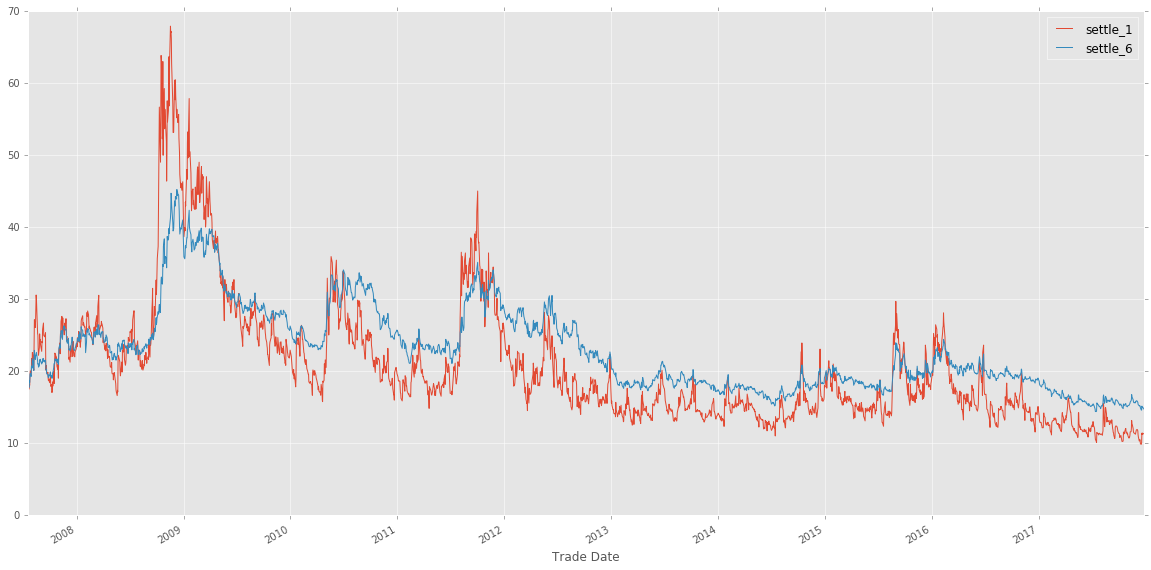

In [14]:
plt.figure(figsize=(20, 10)); ts_vix.loc[:,['settle_1', 'settle_6']].plot(figsize = (20,10)); plt.legend(loc = 'best')

# Analysis

## Strategies 

### Strategy 1. Trading Contango 

This is rather a dumb strategy with no risk management. But it is a good start! Let's implement it. I am taking it exactly as it is in the `Euan Sinclair` book.



$$IVTS = \frac{VIX}{VXV}$$

1. If IVTS < 0.9 -> buy XIV.
2. If IVTS >= 0.9 and IVTS < 1.05 -> cash
3. If IVTS >= 1.05 -> buy VXX

In [17]:
ivts = vix.iloc[:,3]/vix3m.iloc[:,3]
ivts = ivts.rename('ivts')
#ivts.describe()ivts = vix.iloc[:,3]/vix3m.iloc[:,3]
ivts = ivts.rename('ivts')
#ivts.describe()

In [18]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')

In [19]:
trade_data = pd.concat([ivts, rets], axis = 1, join='inner')

In this part we are goin to make an unrealistic assumption about trading. We observe at the close and we trade at the close. This is very crude but hey this is a first step in the game. 

In [20]:
trade_data['xiv_sig'] = 0
trade_data['vxx_sig'] = 0

In [21]:
trade_data.loc[trade_data.loc[:,'ivts'] < 0.9, 'xiv_sig'] = 1
trade_data.loc[trade_data.loc[:,'ivts'] > 1.05, 'vxx_sig'] = 1

In this part we shif the return to get the next day close-to-close return. This is very unrealistic as we are 
1. Observing the signal at the close, and 
2. Placing an order at the close, and
3. Realizing the close-to-close return.

In [22]:
# visualizing the data
trade_data.head()

ivts  close_xiv   ret_xiv  close_vxx   ret_vxx  xiv_sig  \
2010-11-30  0.934498      9.557       NaN   12618.24  0.069197        0   
2010-12-01  0.890371      9.787  0.024066   12019.20 -0.047474        1   
2010-12-02  0.881764     10.429  0.065597   11087.36 -0.077529        1   
2010-12-03  0.857619     11.041  0.058683   10572.80 -0.046410        1   
2010-12-06  0.856464     11.252  0.019111   10380.80 -0.018160        1   

            vxx_sig  
2010-11-30        0  
2010-12-01        0  
2010-12-02        0  
2010-12-03        0  
2010-12-06        0

In [97]:
trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)

In [99]:
# Getting the "realized" returns
trade_data['pnl_xiv'] = trade_data['xiv_sig'] * trade_data['ret_xiv_real']
trade_data['pnl_vxx'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['pnl_xiv'] + trade_data['pnl_vxx']

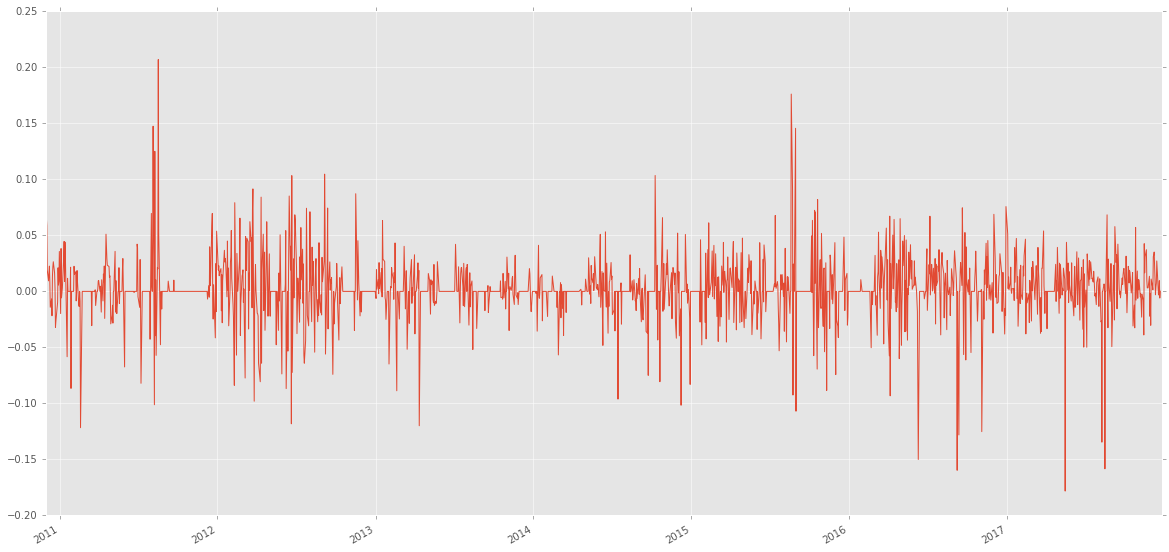

In [101]:
trade_data.pnl.plot(figsize=(20, 10))

In [103]:
# getting an equity curve
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1

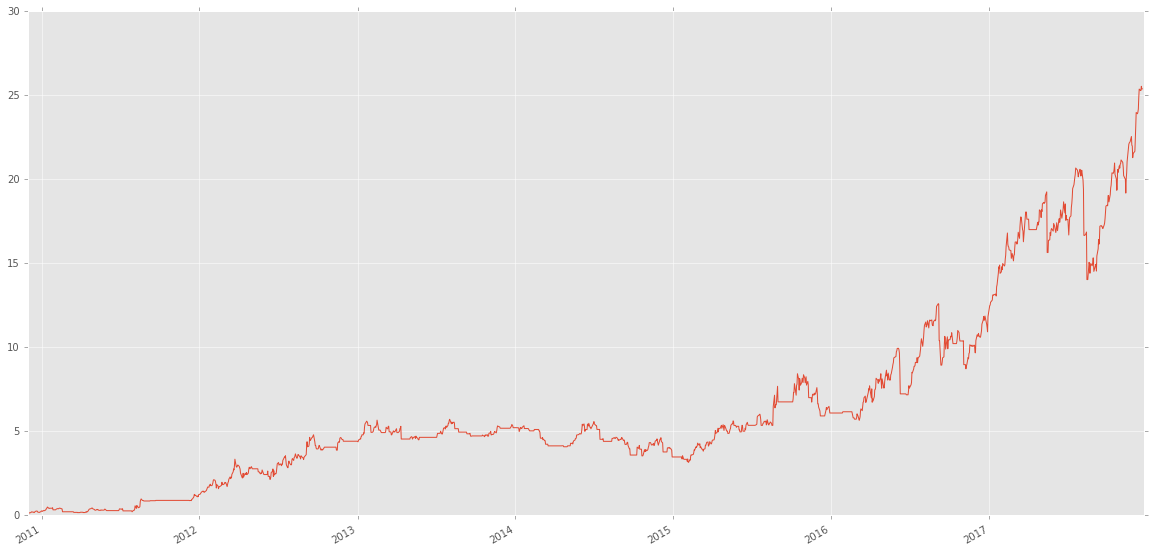

In [106]:
trade_data.cum_pnl.plot(figsize=(20, 10))

### Longer Backtest

In [396]:
#ivts = vix.iloc[:,3]/vix3m.iloc[:,3]
#ivts = ivts.rename('ivts')
#ivts.describe()ivts = vix.iloc[:,3]/vix3m.iloc[:,3]
#ivts = ivts.rename('ivts')
#ivts.describe()
# 
ivts = pd.DataFrame(columns = ['ivts', 'rolling_ivts'], index=ts_vix.index)
ivts['ivts'] = ts_vix.loc[:,'close_1']/ts_vix.loc[:,'close_2']
ivts['rolling_ivts'] = pd.rolling_mean(ivts, window=90)

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=90,center=False).mean()


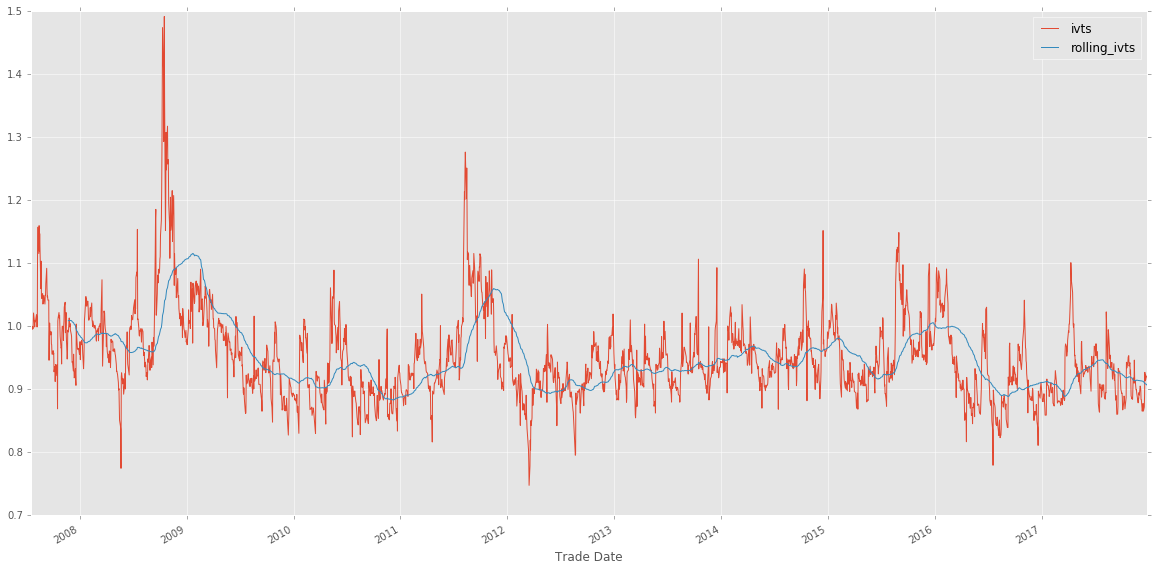

In [397]:
ivts.plot(figsize = (20, 10))

In [398]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv_long.index))
xiv_ret['close_xiv'] = xiv_long.loc[:,'Close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(1))/xiv_ret.close_xiv.shift(1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx_long.index))
vxx_ret['close_vxx'] = vxx_long.loc[:,'Close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(1))/vxx_ret.close_vxx.shift(1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')

In [399]:
rets.head()

close_xiv   ret_xiv  close_vxx   ret_vxx
pd_dates                                            
2004-03-29       1.78       NaN  101507.84 -0.025482
2004-03-30       1.79  0.005618  100634.24 -0.008606
2004-03-31       1.78 -0.005587  101265.12  0.006269
2004-04-01       1.80  0.011236  100531.84 -0.007241
2004-04-02       1.86  0.033333   96978.72 -0.035343

In [404]:
trade_data = pd.concat([ivts, rets], axis = 1, join='inner')
trade_data['xiv_sig'] = 0
trade_data['vxx_sig'] = 0

trade_data.loc[(trade_data.loc[:,'ivts'] < 0.95) & (trade_data.loc[:,'ivts'] < trade_data.loc[:,'rolling_ivts']), 'xiv_sig'] = 0.8
trade_data.loc[(trade_data.loc[:,'ivts'] < 0.95) & (trade_data.loc[:,'ivts'] < trade_data.loc[:,'rolling_ivts']), 'vxx_sig'] = 0.2

#trade_data.loc[(trade_data.loc[:,'ivts'] >= 0.95) & (trade_data.loc[:,'ivts'] < 0.99), 'xiv_sig'] = 0.7
#trade_data.loc[(trade_data.loc[:,'ivts'] >= 0.95) & (trade_data.loc[:,'ivts'] < 0.99), 'vxx_sig'] = 0.3

#trade_data.loc[trade_data.loc[:,'ivts'] >= 1.05, 'xiv_sig'] = 0.35
#trade_data.loc[trade_data.loc[:,'ivts'] >= 1.05, 'vxx_sig'] = 0.65

trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)
# Getting the "realized" returns
trade_data['pnl_xiv'] = trade_data['xiv_sig'] * trade_data['ret_xiv_real']
trade_data['pnl_vxx'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['pnl_xiv'] + trade_data['pnl_vxx']
trade_data.loc[trade_data['pnl'] > 0.5, 'pnl'] = 0.0
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/trade_data.shape[0]
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.000994930945707
robust average return:  0.0
worst return:  -0.105856653341
std:  0.0116906005311
win rate:  0.256273764259
win size:  0.0128924533117
robust win size:  0.0106786648434
sharpe:  1.35100323394


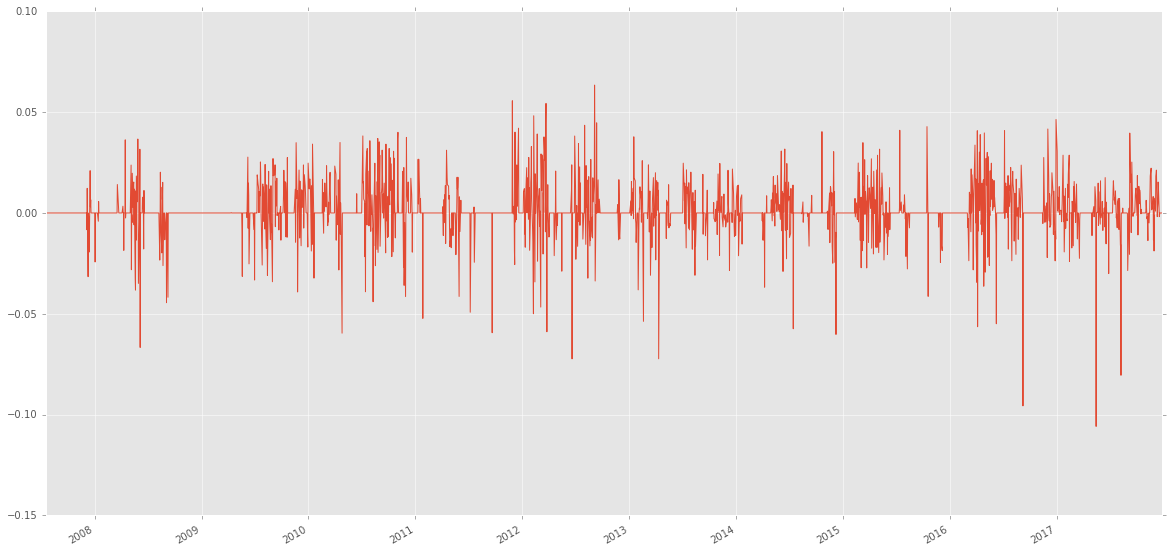

In [405]:
trade_data.pnl.plot(figsize = (20, 10))

In [406]:
# getting an equity curve
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1

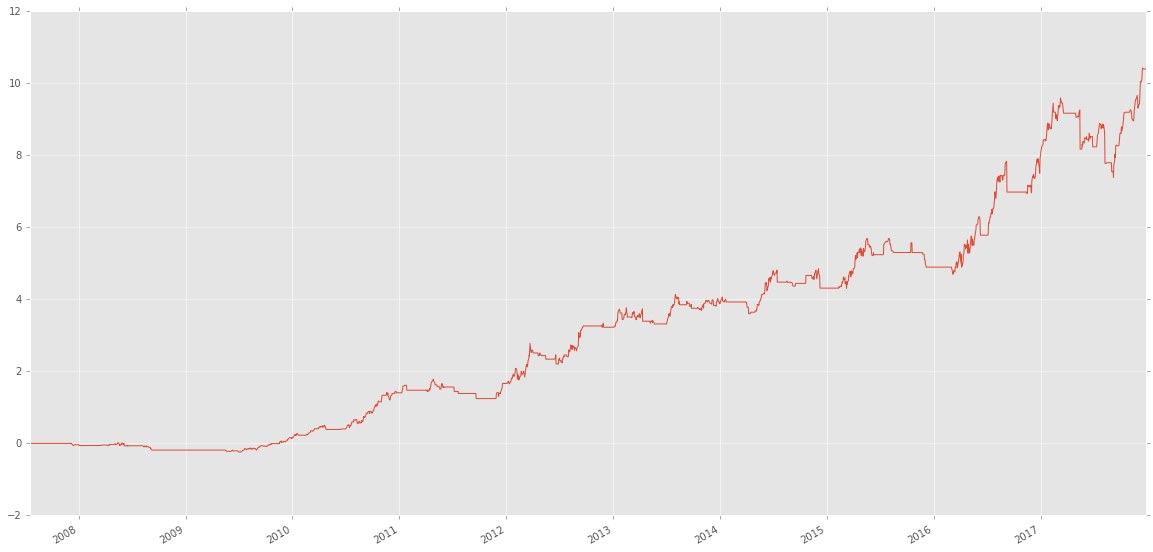

In [407]:
trade_data.loc[:, 'cum_pnl'].plot(figsize=(20, 10))

### Better Contango-Backwardation Signal

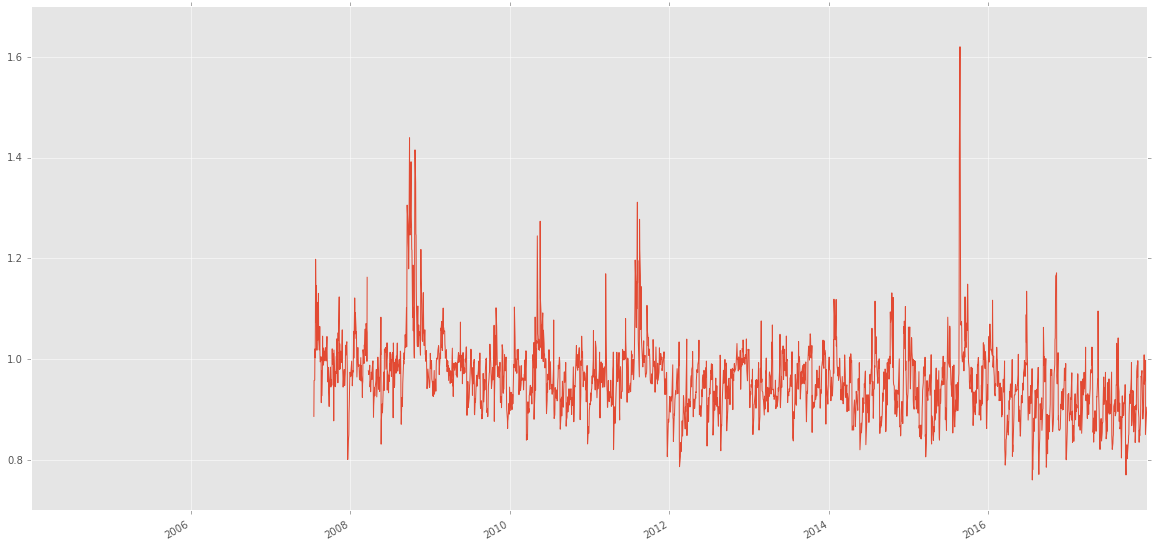

In [174]:
# Instead of ivts, I should use the VIX over 30-day continuous VIX futures ratio
# Lets take a look at that
ivts_30 = vix.loc[:,'VIX Close']/ts_vix.loc[:,'close_1']
ivts_30 = ivts_30.rename('ivts')
ivts_30.plot(figsize = (20, 10))

In [148]:
vxz_ret = pd.DataFrame(columns=['close_vxz', 'ret_vxz'], index=pd.to_datetime(vxz.index))
vxz_ret['close_vxz'] = vxz.loc[:,'adj_close']
vxz_ret.sort_index(axis=0)
vxz_ret['ret_vxz'] = (vxz_ret.close_vxz - vxz_ret.close_vxz.shift(-1))/vxz_ret.close_vxz.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([vxz_ret, vxx_ret], axis=1, join='inner')

In [175]:
trade_data = pd.concat([ivts_30, rets], axis = 1, join='inner')
trade_data['vxz_sig'] = 0
trade_data['vxx_sig'] = 0

trade_data.loc[trade_data.loc[:,'ivts'] <= 0.92, 'vxz_sig'] = 0.4
trade_data.loc[trade_data.loc[:,'ivts'] <= 0.92, 'vxx_sig'] = -0.6

trade_data.loc[(trade_data.loc[:,'ivts'] > 0.92) & (trade_data.loc[:,'ivts'] <= 0.94), 'vxz_sig'] = 0.54
trade_data.loc[(trade_data.loc[:,'ivts'] > 0.92) & (trade_data.loc[:,'ivts'] <= 0.94), 'vxx_sig'] = -0.46

trade_data.loc[(trade_data.loc[:,'ivts'] > 0.94) & (trade_data.loc[:,'ivts'] <= 1.00), 'vxz_sig'] = 0.64
trade_data.loc[(trade_data.loc[:,'ivts'] > 0.94) & (trade_data.loc[:,'ivts'] <= 1.00), 'vxx_sig'] = -0.36

trade_data.loc[trade_data.loc[:,'ivts'] > 1.0, 'vxz_sig'] = -0.5
trade_data.loc[trade_data.loc[:,'ivts'] > 1.0, 'vxx_sig'] = 0.5

trade_data['ret_vxz_real'] = trade_data.loc[:,'ret_vxz'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)
# Getting the "realized" returns
trade_data['pnl_vxz'] = trade_data['vxz_sig'] * trade_data['ret_vxz_real']
trade_data['pnl_vxx'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['pnl_vxz'] + trade_data['pnl_vxx']
# one-time crazy returns 
trade_data.loc[trade_data['pnl'] > 0.5, 'pnl'] = 0.0

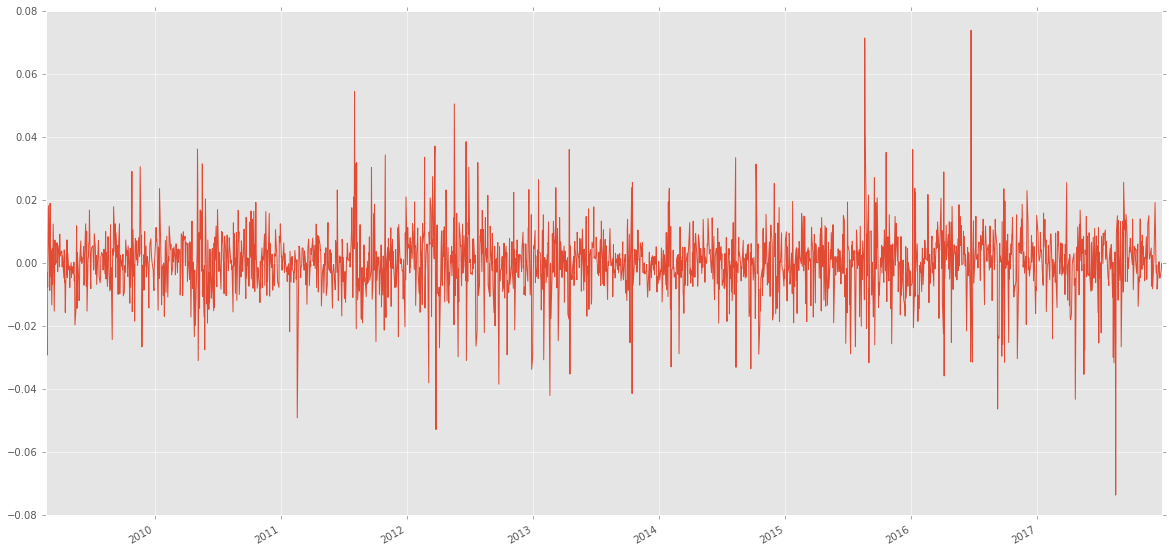

In [176]:
trade_data.pnl.plot(figsize = (20, 10))

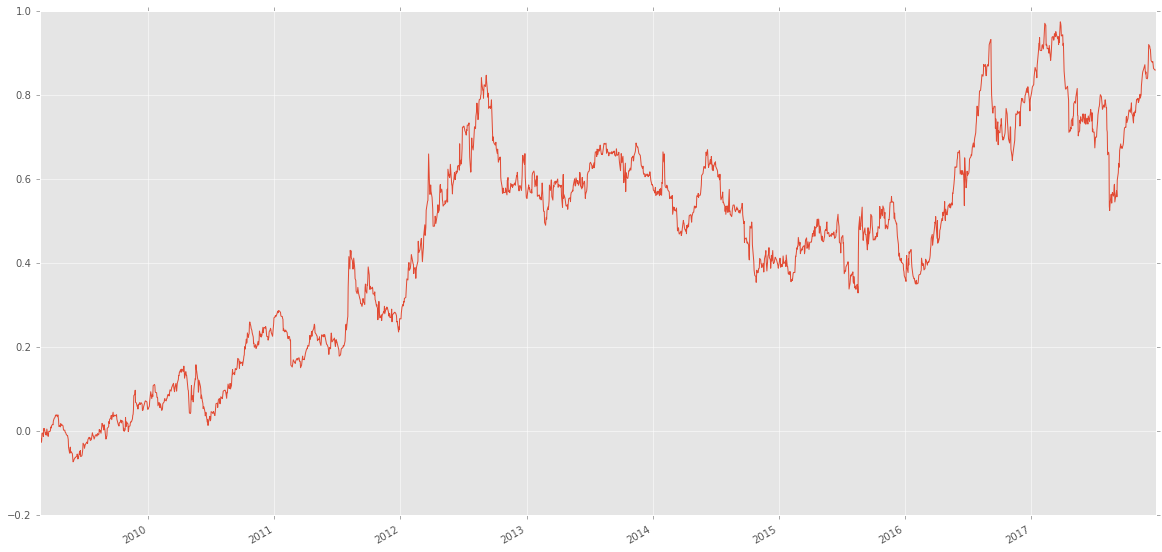

In [177]:
# getting an equity curve
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1
trade_data.loc[trade_data.index > datetime.datetime(2008, 1, 1), 'cum_pnl'].plot(figsize = (20, 10))

### Mediumterm Vol as Indicator

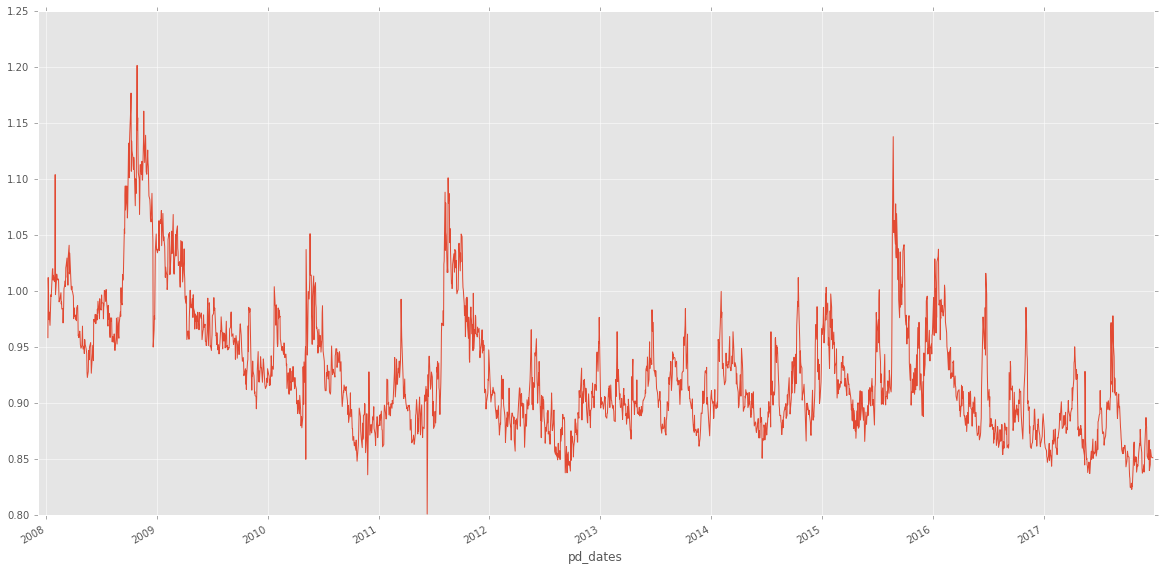

In [192]:
# Instead of ivts, I should use the VIX over 30-day continuous VIX futures ratio
# Lets take a look at that
ivts_90 = vix3m.loc[:,'CLOSE']/vixmt.loc[:,'Close']
ivts_90 = ivts_90.rename('ivts')
ivts_90.plot(figsize = (20, 10))

In [193]:
vxz_ret = pd.DataFrame(columns=['close_vxz', 'ret_vxz'], index=pd.to_datetime(vxz.index))
vxz_ret['close_vxz'] = vxz.loc[:,'adj_close']
vxz_ret.sort_index(axis=0)
vxz_ret['ret_vxz'] = (vxz_ret.close_vxz - vxz_ret.close_vxz.shift(-1))/vxz_ret.close_vxz.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([vxz_ret, vxx_ret], axis=1, join='inner')

In [255]:
trade_data = pd.concat([ivts_90, rets], axis = 1, join='inner')
trade_data['vxz_sig'] = 0
trade_data['vxx_sig'] = 0

#trade_data.loc[trade_data.loc[:,'ivts'] <= 0.9, 'vxz_sig'] = 0.33
#trade_data.loc[trade_data.loc[:,'ivts'] <= 0.9, 'vxx_sig'] = -0.66

#trade_data.loc[(trade_data.loc[:,'ivts'] > 0.9) & (trade_data.loc[:,'ivts'] <= 0.95), 'vxz_sig'] = 0.4
#trade_data.loc[(trade_data.loc[:,'ivts'] > 0.9) & (trade_data.loc[:,'ivts'] <= 0.95), 'vxx_sig'] = -0.5

trade_data.loc[(trade_data.loc[:,'ivts'] > 0.95) & (trade_data.loc[:,'ivts'] <= 1.00), 'vxz_sig'] = 0.45
trade_data.loc[(trade_data.loc[:,'ivts'] > 0.95) & (trade_data.loc[:,'ivts'] <= 1.00), 'vxx_sig'] = -0.55

#trade_data.loc[trade_data.loc[:,'ivts'] > 1.0, 'vxz_sig'] = -0.3
#trade_data.loc[trade_data.loc[:,'ivts'] > 1.0, 'vxx_sig'] = 0.7

trade_data['ret_vxz_real'] = trade_data.loc[:,'ret_vxz'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)
# Getting the "realized" returns
trade_data['pnl_vxz'] = trade_data['vxz_sig'] * trade_data['ret_vxz_real']
trade_data['pnl_vxx'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['pnl_vxz'] + trade_data['pnl_vxx']
# one-time crazy returns 
trade_data.loc[trade_data['pnl'] > 0.5, 'pnl'] = 0.0

0.716964187432


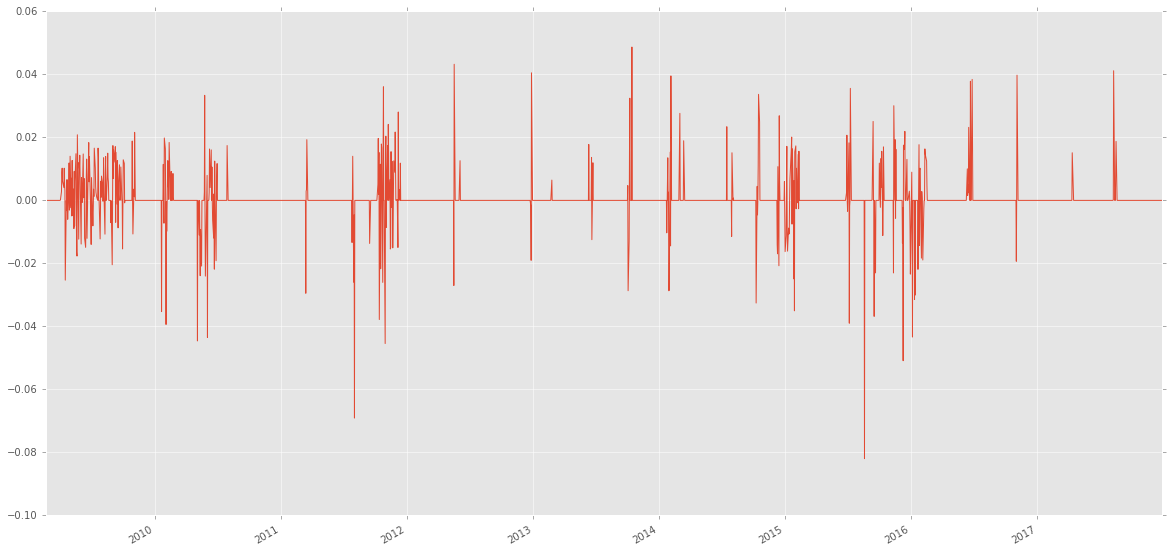

In [256]:
trade_data.pnl.plot(figsize = (20, 10))
print trade_data.pnl.mean() / trade_data.pnl.std() * np.sqrt(252)

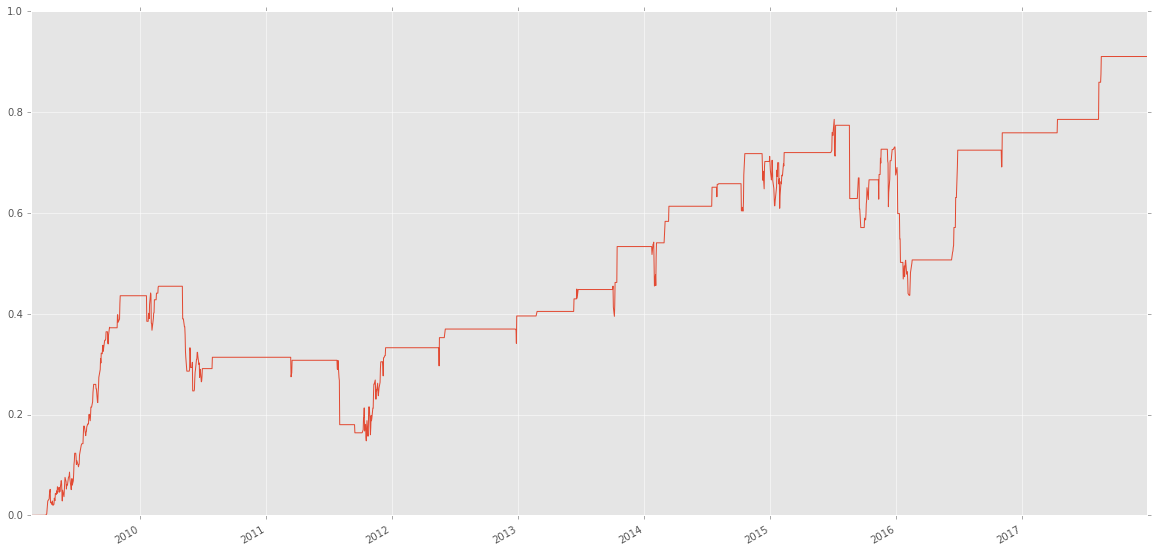

In [257]:
# getting an equity curve
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1
trade_data.loc[trade_data.index > datetime.datetime(2008, 1, 1), 'cum_pnl'].plot(figsize = (20, 10))

### Strategy 2. Donninger(2011)

In this part I implement the strategy exactly as it is outlined in the `Euan Sinclair`'s book. Let's see if it has been arbitraged. What sort of risk/return does it offer. 

1.  IVTS <= 0.91 -> VXX -0.6 and VXZ 0.4. 
2.  0.91 < IVTS <= 0.97 -> VXX -0.32 and VXZ 0.68
3.  0.97 < IVTS <= 1.05 -> VXX -0.25 and VXZ 0.75
4.  IVTS > 1.05 -> VXX -0.1 and VXZ 0.9


This strategy is always invested and always hedged. Maybe it is good to test this hypothesis too. Should we stay out of the market? or be always in and hedged? 

In [21]:
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
vxz_ret = pd.DataFrame(columns=['close_vxz', 'ret_vxz'], index=pd.to_datetime(vxz.index))
vxz_ret['close_vxz'] = vxz.loc[:,'adj_close']
vxz_ret.sort_index(axis=0)
vxz_ret['ret_vxz'] = (vxz_ret.close_vxz - vxz_ret.close_vxz.shift(-1))/vxz_ret.close_vxz.shift(-1)
#
rets = pd.concat([vxx_ret, vxz_ret], axis=1, join='inner')

In [25]:
trade_data = pd.concat([ivts, rets], axis = 1, join='inner')
trade_data['vxx_sig'] = 0
trade_data['vxz_sig'] = 0

In [26]:
trade_data.loc[trade_data.loc[:,'ivts'] < 0.9, 'vxx_sig'] = -0.6
trade_data.loc[trade_data.loc[:,'ivts'] < 0.9, 'vxz_sig'] = 0.40
#
trade_data.loc[(trade_data.loc[:,'ivts'] >= 0.9) & (trade_data.loc[:,'ivts'] < 0.97), 'vxx_sig'] = -0.32
trade_data.loc[(trade_data.loc[:,'ivts'] >= 0.9) & (trade_data.loc[:,'ivts'] < 0.97), 'vxz_sig'] = 0.68
#
trade_data.loc[(trade_data.loc[:,'ivts'] >= 0.97) & (trade_data.loc[:,'ivts'] < 1.05), 'vxx_sig'] = -0.25
trade_data.loc[(trade_data.loc[:,'ivts'] >= 0.97) & (trade_data.loc[:,'ivts'] < 1.05), 'vxz_sig'] = 0.75
#
trade_data.loc[trade_data.loc[:,'ivts'] > 1.05, 'vxx_sig'] = -0.1
trade_data.loc[trade_data.loc[:,'ivts'] > 1.05, 'vxz_sig'] = 0.9
#
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)
trade_data['ret_vxz_real'] = trade_data.loc[:,'ret_vxz'].shift(-1)

In [30]:
trade_data.tail(30)

ivts  close_vxx   ret_vxx  close_vxz   ret_vxz  vxx_sig  \
2017-11-13  0.836364      34.90  0.002874      20.08  0.004000     -0.6   
2017-11-14  0.832017      35.16  0.007450      20.43  0.017430     -0.6   
2017-11-15  0.895634      36.51  0.038396      20.71  0.013705     -0.6   
2017-11-16  0.842407      35.01 -0.041085      20.31 -0.019314     -0.6   
2017-11-17  0.828261      34.45 -0.015995      20.09 -0.010832     -0.6   
2017-11-20  0.801958      33.36 -0.031640      19.76 -0.016426     -0.6   
2017-11-21  0.775299      32.10 -0.037770      19.39 -0.018725     -0.6   
2017-11-22  0.794212      31.79 -0.009657      19.26 -0.006704     -0.6   
2017-11-24  0.778583      31.64 -0.004718      19.19 -0.003634     -0.6   
2017-11-27  0.785203      31.63 -0.000316      19.31  0.006253     -0.6   
2017-11-28  0.817441      31.21 -0.013279      19.16 -0.007768     -0.6   
2017-11-29  0.834633      31.89  0.021788      19.44  0.014614     -0.6   
2017-11-30  0.865031      31.97  0.002509      19.32 -0.006173     -0.6   
2017-12-01  0.860693      32.83  0.026900      19.69  0.019151     -0.6   
2017-12-04  0.861993      32.59 -0.007310      19.36 -0.016760     -0.6   
2017-12-05  0.836780      32.45 -0.004296      19.29 -0.003616     -0.6   
2017-12-06  0.819331      32.41 -0.001233      19.34  0.002592     -0.6   
2017-12-07  0.785770      31.36 -0.032397      19.08 -0.013444     -0.6   
2017-12-08  0.768860      30.33 -0.032844      18.84 -0.012579     -0.6   
2017-12-11  0.760586      29.29 -0.034289      18.78 -0.003185     -0.6   
2017-12-12  0.794872      29.38  0.003073      18.76 -0.001065     -0.6   
2017-12-13  0.814400      29.30 -0.002723      18.64 -0.006397     -0.6   
2017-12-14  0.819531      29.12 -0.006143      18.56 -0.004292     -0.6   
2017-12-15  0.779801      28.19 -0.031937      18.27 -0.015625     -0.6   
2017-12-18  0.789561      27.78 -0.014544      17.95 -0.017515     -0.6   
2017-12-19  0.801759      27.88  0.003600      17.93 -0.001114     -0.6   
2017-12-20  0.785772      27.80 -0.002869      17.91 -0.001115     -0.6   
2017-12-21  0.778947      27.60 -0.007194      17.74 -0.009492     -0.6   
2017-12-22  0.792634      27.73  0.004710      17.69 -0.002818     -0.6   
2017-12-26  0.812203      27.78  0.001803      17.53 -0.009045     -0.6   

            vxz_sig  ret_vxx_real  ret_vxz_real  
2017-11-13      0.4      0.007450      0.017430  
2017-11-14      0.4      0.038396      0.013705  
2017-11-15      0.4     -0.041085     -0.019314  
2017-11-16      0.4     -0.015995     -0.010832  
2017-11-17      0.4     -0.031640     -0.016426  
2017-11-20      0.4     -0.037770     -0.018725  
2017-11-21      0.4     -0.009657     -0.006704  
2017-11-22      0.4     -0.004718     -0.003634  
2017-11-24      0.4     -0.000316      0.006253  
2017-11-27      0.4     -0.013279     -0.007768  
2017-11-28      0.4      0.021788      0.014614  
2017-11-29      0.4      0.002509     -0.006173  
2017-11-30      0.4      0.026900      0.019151  
2017-12-01      0.4     -0.007310     -0.016760  
2017-12-04      0.4     -0.004296     -0.003616  
2017-12-05      0.4     -0.001233      0.002592  
2017-12-06      0.4     -0.032397     -0.013444  
2017-12-07      0.4     -0.032844     -0.012579  
2017-12-08      0.4     -0.034289     -0.003185  
2017-12-11      0.4      0.003073     -0.001065  
2017-12-12      0.4     -0.002723     -0.006397  
2017-12-13      0.4     -0.006143     -0.004292  
2017-12-14      0.4     -0.031937     -0.015625  
2017-12-15      0.4     -0.014544     -0.017515  
2017-12-18      0.4      0.003600     -0.001114  
2017-12-19      0.4     -0.002869     -0.001115  
2017-12-20      0.4     -0.007194     -0.009492  
2017-12-21      0.4      0.004710     -0.002818  
2017-12-22      0.4      0.001803     -0.009045  
2017-12-26      0.4           NaN           NaN

In [31]:
# Getting the "realized" returns
trade_data['pnl_vxx'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real']
trade_data['pnl_vxz'] = trade_data['vxz_sig'] * trade_data['ret_vxz_real']
trade_data['pnl'] = trade_data['pnl_vxx'] + trade_data['pnl_vxz']
# getting an equity curve
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1

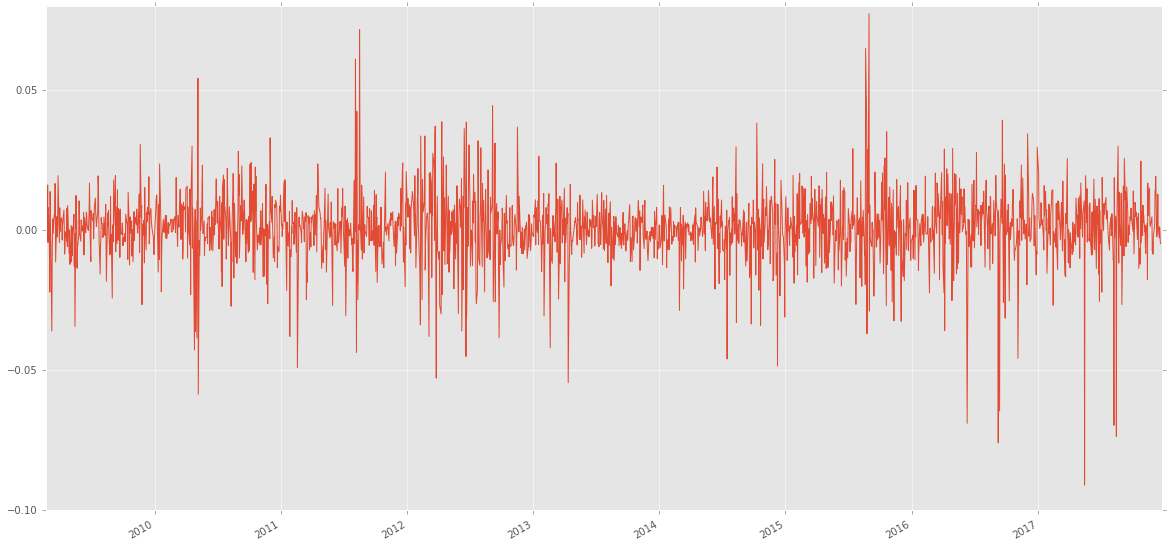

In [32]:
trade_data.pnl.plot(figsize=(20, 10))

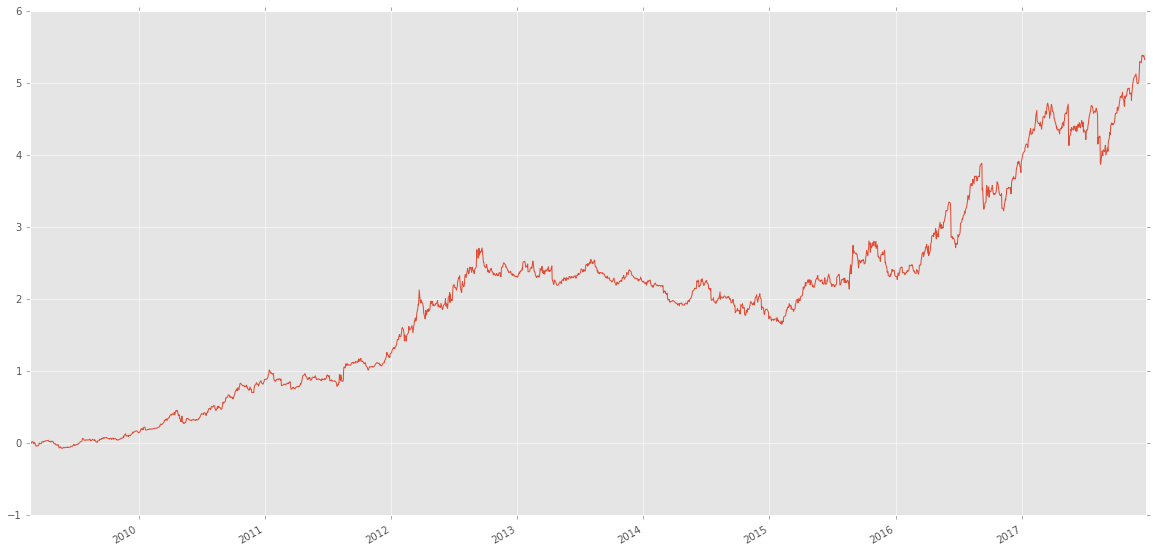

In [35]:
trade_data.cum_pnl.plot(figsize=(20, 10))

### Strategy 3. Basis Trade

In this strategy we look at the relation between spot VIX and front month VIX. 

1. If the front month VIX is above spot VIX by 0.1 * VIX then we buy XIV or sell volatility (Contango is going to converge).
2. If the front month VIX is below spot VIX by 0.1 * VIX then we buy VXX or buy volatility (Backwardation is going to converge).

In [40]:
ts_vix.head()

close_1  settle_1  volume_1  prev_day_open_interest_1  close_2  \
Trade Date                                                                   
2007-07-19    17.18     17.18    2832.0                   24113.0    17.33   
2007-07-20    17.70     17.72    1592.0                   24655.0    17.77   
2007-07-23    17.54     17.55    1220.0                   25444.0    17.62   
2007-07-24    18.18     18.18    3388.0                   24877.0    18.18   
2007-07-25    18.05     18.07    4672.0                   24023.0    18.12   

            settle_2  volume_2  prev_day_open_interest_2  close_3  settle_3  \
Trade Date                                                                    
2007-07-19     17.36    1171.0                    5319.0    17.36     17.38   
2007-07-20     17.76     923.0                    5139.0    17.83     17.82   
2007-07-23     17.63     520.0                    5490.0    17.65     17.67   
2007-07-24     18.14     538.0                    5672.0    18.38     18.26   
2007-07-25     18.18     564.0                    5537.0    18.27     18.27   

                      ...             volume_5  prev_day_open_interest_5  \
Trade Date            ...                                                  
2007-07-19            ...                507.0                    2629.0   
2007-07-20            ...                124.0                    2633.0   
2007-07-23            ...                 85.0                    2655.0   
2007-07-24            ...                453.0                    2969.0   
2007-07-25            ...                 80.0                    2977.0   

            close_6  settle_6  volume_6  prev_day_open_interest_6  close_7  \
Trade Date                                                                   
2007-07-19    17.62     17.59     507.0                    2629.0    17.92   
2007-07-20    18.03     17.94     124.0                    2633.0    18.30   
2007-07-23    17.77     17.78      85.0                    2655.0    18.15   
2007-07-24    18.70     18.70     453.0                    2969.0    19.32   
2007-07-25    18.52     18.47      80.0                    2977.0    18.72   

            settle_7  volume_7  prev_day_open_interest_7  
Trade Date                                                
2007-07-19     17.93     901.0                    3202.0  
2007-07-20     18.29     140.0                    3204.0  
2007-07-23     18.08      24.0                    3261.0  
2007-07-24     18.88     742.0                    3281.0  
2007-07-25     18.67     350.0                    2995.0  

[5 rows x 28 columns]

In [41]:
vix.head()

VIX Open  VIX High  VIX Low  VIX Close
pd_dates                                          
2004-01-02     17.96     18.68    17.54      18.22
2004-01-05     18.45     18.49    17.44      17.49
2004-01-06     17.66     17.67    16.19      16.73
2004-01-07     16.72     16.75    15.50      15.50
2004-01-08     15.42     15.68    15.32      15.61

In [70]:
trade_data = pd.concat([ts_vix.loc[:,['close_1', 'settle_1']], vix.loc[:,'VIX Close']], axis = 1, join='inner')
trade_data = pd.concat([trade_data, xiv.loc[:,'adj_close']], axis=1, join='inner')
trade_data = pd.concat([trade_data, vxx.loc[:, 'adj_close']], axis=1, join='inner')
trade_data.columns = ['close_1', 'settle_1', 'vix_close', 'xiv_close', 'vxx_close']

In [71]:
trade_data.sort_index(axis=0, inplace=True)
trade_data['xiv_ret'] = \
(trade_data.loc[:,'xiv_close'] - trade_data.loc[:,'xiv_close'].shift(1))/trade_data.loc[:,'xiv_close'].shift(1)
trade_data.sort_index(axis=0, inplace=True)
trade_data['vxx_ret'] = \
(trade_data.loc[:,'vxx_close'] - trade_data.loc[:,'vxx_close'].shift(1))/trade_data.loc[:,'vxx_close'].shift(1)

In [72]:
trade_data.head()

close_1  settle_1  vix_close  xiv_close  vxx_close   xiv_ret  \
2010-11-30    23.20     23.20      23.54      9.557   12618.24       NaN   
2010-12-01    21.85     21.90      21.36      9.787   12019.20  0.024066   
2010-12-02    19.85     19.85      19.39     10.429   11087.36  0.065597   
2010-12-03    19.05     19.05      18.01     11.041   10572.80  0.058683   
2010-12-06    18.60     18.60      18.02     11.252   10380.80  0.019111   

             vxx_ret  
2010-11-30       NaN  
2010-12-01 -0.047474  
2010-12-02 -0.077529  
2010-12-03 -0.046410  
2010-12-06 -0.018160

In [82]:
# building the signal
# 
trade_data['xiv_sig'] = 0
trade_data['vxx_sig'] = 0
#
trade_data.loc[trade_data['settle_1'] >= 1.15 * trade_data['vix_close'], 'xiv_sig'] = 1
trade_data.loc[trade_data['settle_1'] <= 0.85 * trade_data['vix_close'], 'vxx_sig'] = 1
# real returns
trade_data['real_xiv_ret'] = trade_data.loc[:,'xiv_ret'].shift(-1)
trade_data['real_vxx_ret'] = trade_data.loc[:,'vxx_ret'].shift(-1)
#

In [83]:
trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_xiv_ret']
trade_data['vxx_pnl'] = trade_data['vxx_sig'] * trade_data['real_vxx_ret']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxx_pnl']
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1

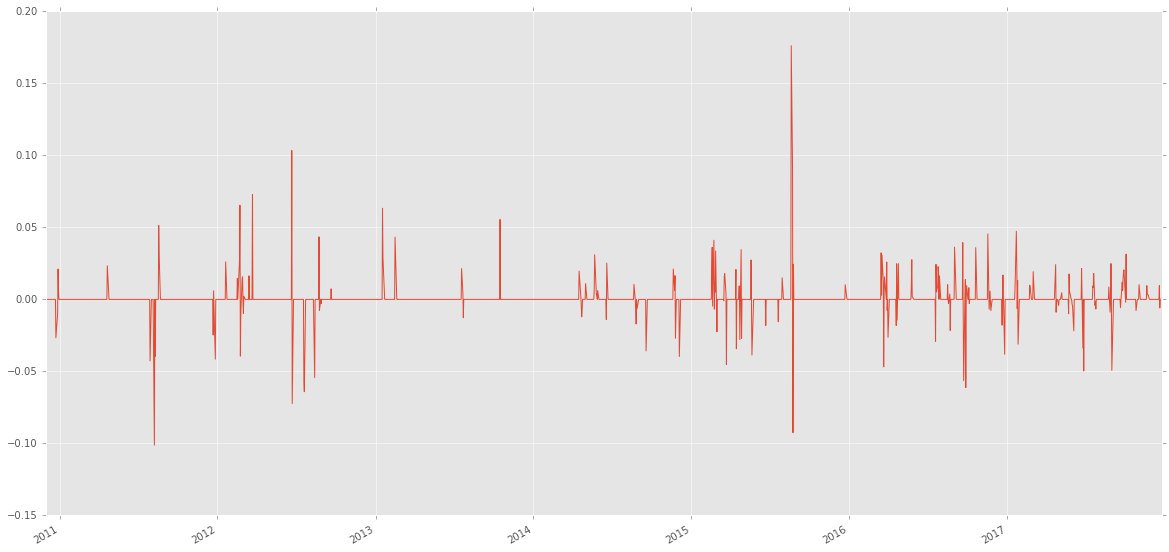

In [84]:
trade_data.pnl.plot(figsize=(20, 10))

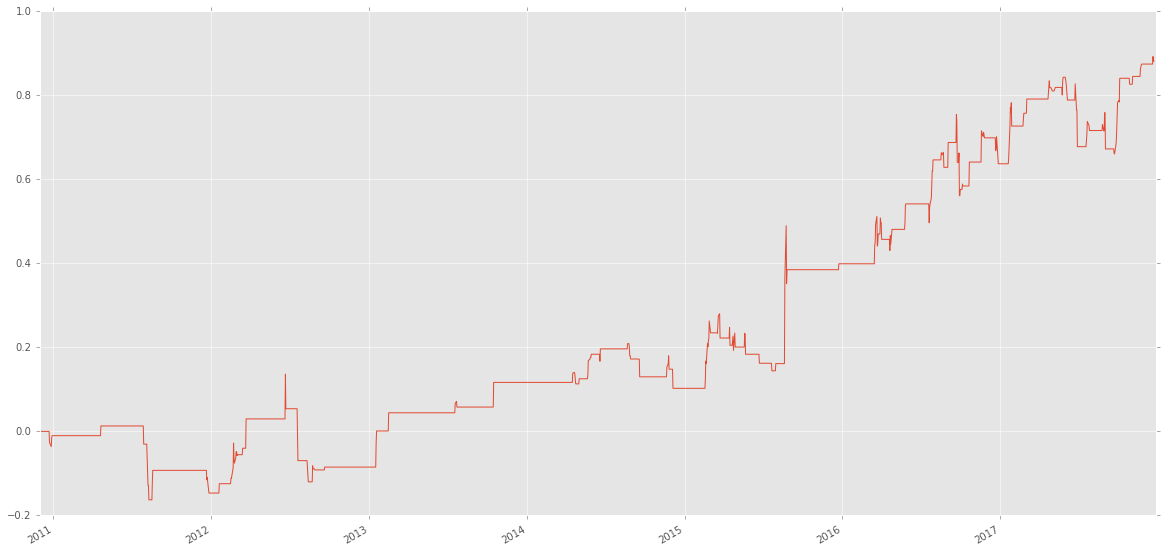

In [85]:
trade_data.cum_pnl.plot(figsize=(20, 10))

### Strategy 4. Time Series Momentum of Volatility 

In this part I look back M days, and if the absolute `VIX` return is positive I hold onto `VXX` for N days. If it is negative I buy `XIV` for N days. Volatility has mean-reversion and momentum. The best traders capture both effects in their strategy. Another simple start is to buy `XIV` when `VIX` is below M-day MA and buy `VXX` when they are above M-day MA. I am goin to start from the latter since it is a special case of the first. 

In [125]:
#vix.head()
window = 3
vix['rolling_vix'] = pd.rolling_mean(vix.loc[:,'VIX Close'], window=window)
#vix.head(20)

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  app.launch_new_instance()


In [126]:
trade_data = pd.concat([vix.loc[:,['VIX Close', 'rolling_vix']], xiv.loc[:,'adj_close']], axis = 1, join = 'inner')
trade_data = pd.concat([trade_data, vxx.loc[:,'adj_close']], axis = 1, join = 'inner')

In [127]:
trade_data.columns = ['vix_close', 'rolling_vix', 'xiv_close', 'vxx_close']
trade_data.sort_index(axis=0, inplace=True)
trade_data['xiv_ret'] = \
(trade_data.loc[:,'xiv_close'] - trade_data.loc[:,'xiv_close'].shift(1))/trade_data.loc[:,'xiv_close'].shift(1)
trade_data.sort_index(axis=0, inplace=True)
trade_data['vxx_ret'] = \
(trade_data.loc[:,'vxx_close'] - trade_data.loc[:,'vxx_close'].shift(1))/trade_data.loc[:,'vxx_close'].shift(1)

In [128]:
# signal
# building the signal
# 
trade_data['xiv_sig'] = 0
trade_data['vxx_sig'] = 0
#
trade_data.loc[trade_data['rolling_vix'] > trade_data['vix_close'], 'xiv_sig'] = 1
trade_data.loc[trade_data['rolling_vix'] < trade_data['vix_close'], 'vxx_sig'] = 1
# real returns
trade_data['real_xiv_ret'] = trade_data.loc[:,'xiv_ret'].shift(-1)
trade_data['real_vxx_ret'] = trade_data.loc[:,'vxx_ret'].shift(-1)
#

In [129]:
trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_xiv_ret']
trade_data['vxx_pnl'] = trade_data['vxx_sig'] * trade_data['real_vxx_ret']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxx_pnl']
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1

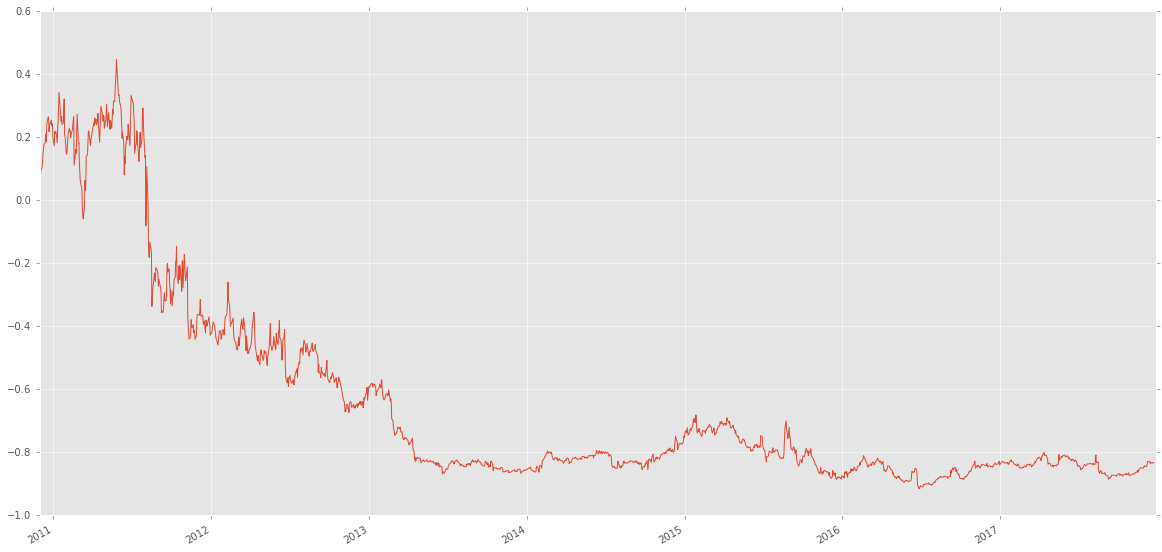

In [130]:
trade_data.cum_pnl.plot(figsize=(20, 10))

#### Real Time Series Momentum - Pedersen and Frazzini 

In [168]:
trade_data = pd.concat([vix.loc[:,['VIX Close']], xiv.loc[:,'adj_close']], axis = 1, join = 'inner')
trade_data = pd.concat([trade_data, vxx.loc[:,'adj_close']], axis = 1, join = 'inner')
trade_data.columns = ['vix_close', 'xiv_close', 'vxx_close']
trade_data.sort_index(axis=0, inplace=True)
trade_data['vix_ret'] = \
(trade_data.loc[:,'vix_close'] - trade_data.loc[:,'vix_close'].shift(1))/trade_data.loc[:,'vix_close'].shift(1)
trade_data.sort_index(axis=0, inplace=True)
trade_data['xiv_ret'] = \
(trade_data.loc[:,'xiv_close'] - trade_data.loc[:,'xiv_close'].shift(1))/trade_data.loc[:,'xiv_close'].shift(1)
trade_data.sort_index(axis=0, inplace=True)
trade_data['vxx_ret'] = \
(trade_data.loc[:,'vxx_close'] - trade_data.loc[:,'vxx_close'].shift(1))/trade_data.loc[:,'vxx_close'].shift(1)

In [169]:
# one-day holding period
# This is based on Ernie Chan's technique
trade_data['xiv_sig'] = 0
trade_data['vxx_sig'] = 0
start = 100 # *: The important number!
for i in range(start, trade_data.shape[0]-1):
    start = 100 # *: The important number!
    sig_ret = (1 + trade_data.iloc[(i - start):i,3]).cumprod()[-1]
    if sig_ret > 1:
        trade_data.iloc[i, 7] = 1
    else:
        trade_data.iloc[i, 6] = 1
        

In [170]:
# real returns
trade_data['real_xiv_ret'] = trade_data.loc[:,'xiv_ret'].shift(-1)
trade_data['real_vxx_ret'] = trade_data.loc[:,'vxx_ret'].shift(-1)
#

In [171]:
trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_xiv_ret']
trade_data['vxx_pnl'] = trade_data['vxx_sig'] * trade_data['real_vxx_ret']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxx_pnl']
trade_data['cum_pnl'] = (1 + trade_data.loc[:,'pnl']).cumprod() - 1

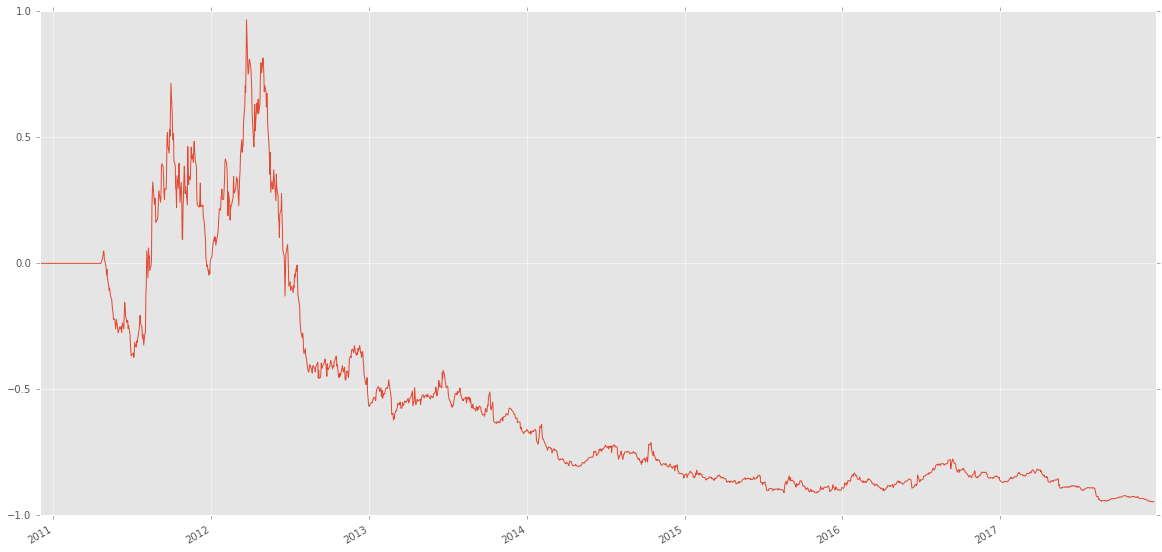

In [172]:
trade_data.cum_pnl.plot(figsize=(20, 10))

### Strategy 5. Curvature and Return

In [210]:
ts_vix_settle = ts_vix.loc[:,['settle_' + str(a) for a in range(1, 8)]]

In [211]:
ts_vix_settle = pd.concat([vix.loc[:,'VIX Close'], ts_vix_settle], axis = 1, join='inner')
ts_vix_settle.columns = ['VX0', 'VX1', 'VX2', 'VX3', 'VX4', 'VX5', 'VX6', 'VX7']

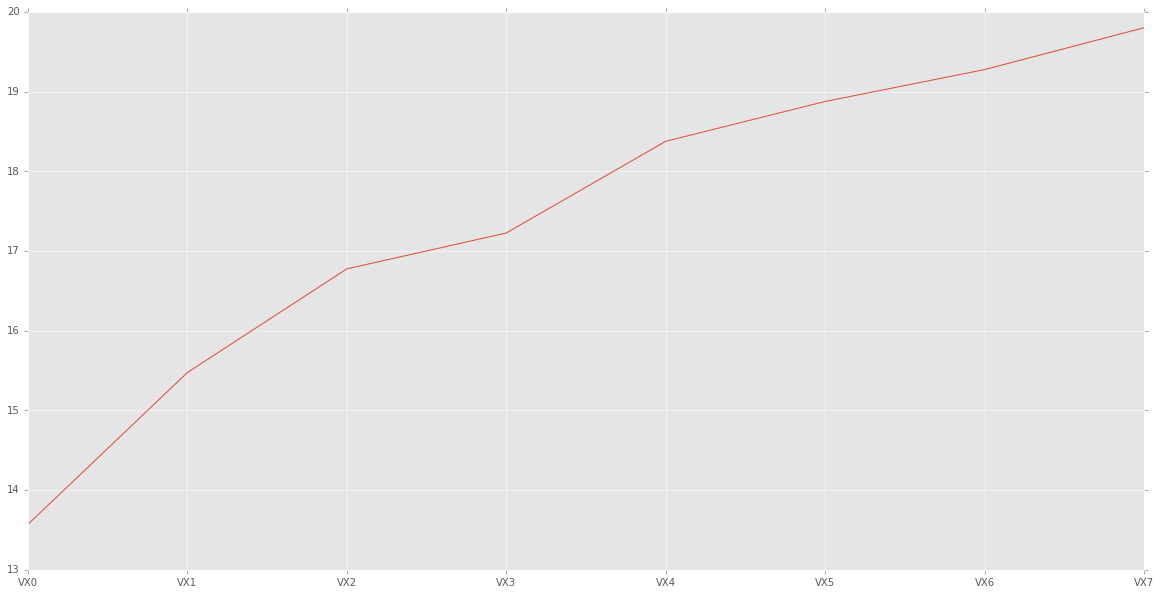

In [212]:
ts_vix_settle.loc['2016-10-03',:].plot(figsize = (20, 10))

real contango and backwardation - all curve or half-curve at east

In [213]:
cond_backwardation = (ts_vix_settle['VX0'] > ts_vix_settle['VX1']) \
        & (ts_vix_settle['VX1'] > ts_vix_settle['VX2'])\
        & (ts_vix_settle['VX2'] > ts_vix_settle['VX3'])\
        & (ts_vix_settle['VX3'] > ts_vix_settle['VX4'])\
        & (ts_vix_settle['VX4'] > ts_vix_settle['VX5'])\
        & (ts_vix_settle['VX5'] > ts_vix_settle['VX6'])\
        & (ts_vix_settle['VX6'] > ts_vix_settle['VX7'])

cond_contango = (ts_vix_settle['VX0'] < ts_vix_settle['VX1']) \
        & (ts_vix_settle['VX1'] < ts_vix_settle['VX2'])\
        & (ts_vix_settle['VX2'] < ts_vix_settle['VX3'])\
        & (ts_vix_settle['VX3'] < ts_vix_settle['VX4'])\
        & (ts_vix_settle['VX4'] < ts_vix_settle['VX5'])\
        & (ts_vix_settle['VX5'] < ts_vix_settle['VX6'])\
        & (ts_vix_settle['VX6'] < ts_vix_settle['VX7'])
        
ts_vix_settle.loc[: , 'contango'] = 0
ts_vix_settle.loc[cond_contango, 'contango'] = 1

ts_vix_settle.loc[: , 'backwardation'] = 0
ts_vix_settle.loc[cond_backwardation, 'backwardation'] = 1

In [215]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')

In [219]:
trade_data = pd.concat([rets, ts_vix_settle.loc[:,['contango', 'backwardation']]], axis = 1, join = 'inner')

In [221]:
trade_data.sort_index(axis=0, inplace=True)
trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)

In [223]:
trade_data['xiv_pnl'] = trade_data['contango'] * trade_data['ret_xiv_real']
trade_data['vxx_pnl'] = trade_data['backwardation'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxx_pnl']

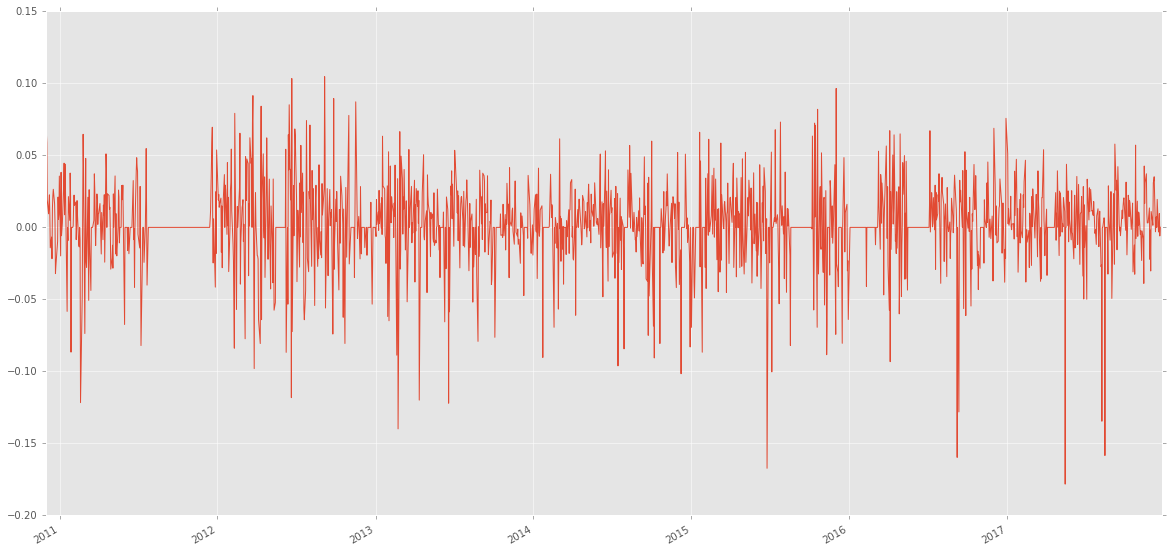

In [224]:
trade_data.loc[:,'pnl'].plot(figsize=(20, 10))

In [230]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1

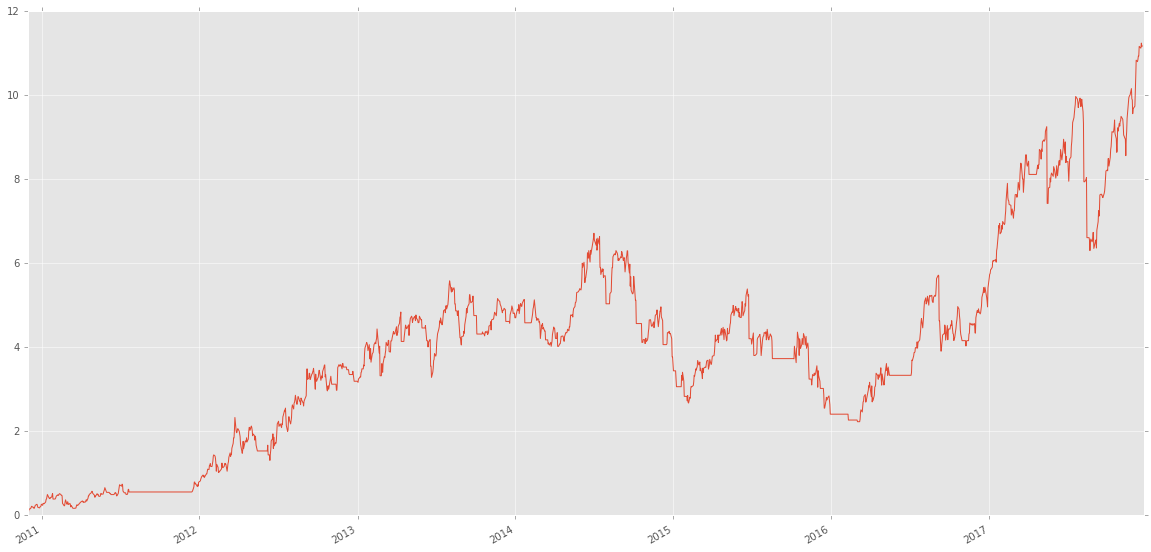

In [231]:
trade_data.loc[:,'cum_pnl'].plot(figsize = (20, 10))

In [239]:
# Only half curve
cond_backwardation = (ts_vix_settle['VX0'] > ts_vix_settle['VX1']) \
        & (ts_vix_settle['VX1'] > ts_vix_settle['VX2'])\
        & (ts_vix_settle['VX2'] > ts_vix_settle['VX3'])\
        & (ts_vix_settle['VX3'] > ts_vix_settle['VX4'])
        
cond_contango = (ts_vix_settle['VX0'] < ts_vix_settle['VX1']) \
        & (ts_vix_settle['VX1'] < ts_vix_settle['VX2'])\
        & (ts_vix_settle['VX2'] < ts_vix_settle['VX3'])\
        & (ts_vix_settle['VX3'] < ts_vix_settle['VX4'])
        
ts_vix_settle.loc[: , 'contango'] = 0
ts_vix_settle.loc[cond_contango, 'contango'] = 1

ts_vix_settle.loc[: , 'backwardation'] = 0
ts_vix_settle.loc[cond_backwardation, 'backwardation'] = 1

In [240]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')

In [241]:
trade_data = pd.concat([rets, ts_vix_settle.loc[:,['contango', 'backwardation']]], axis = 1, join = 'inner')

In [242]:
trade_data.sort_index(axis=0, inplace=True)
trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)

In [243]:
trade_data['xiv_pnl'] = trade_data['contango'] * trade_data['ret_xiv_real']
trade_data['vxx_pnl'] = trade_data['backwardation'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxx_pnl']

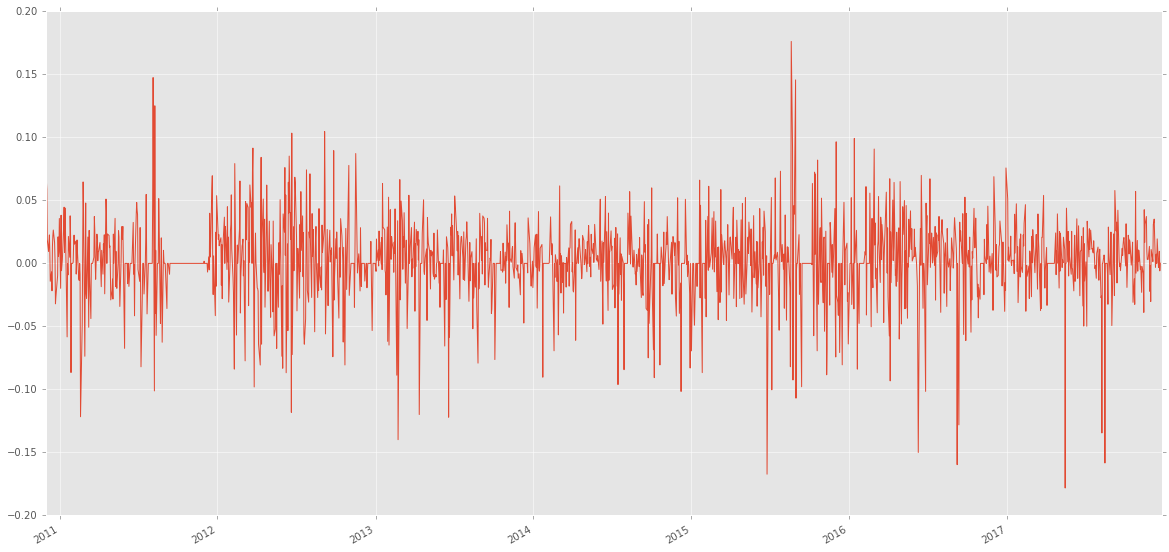

In [244]:
trade_data.pnl.plot(figsize = (20, 10))

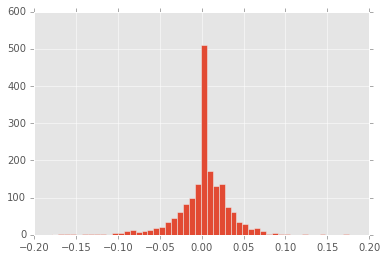

In [245]:
trade_data.pnl.hist(bins = 50)

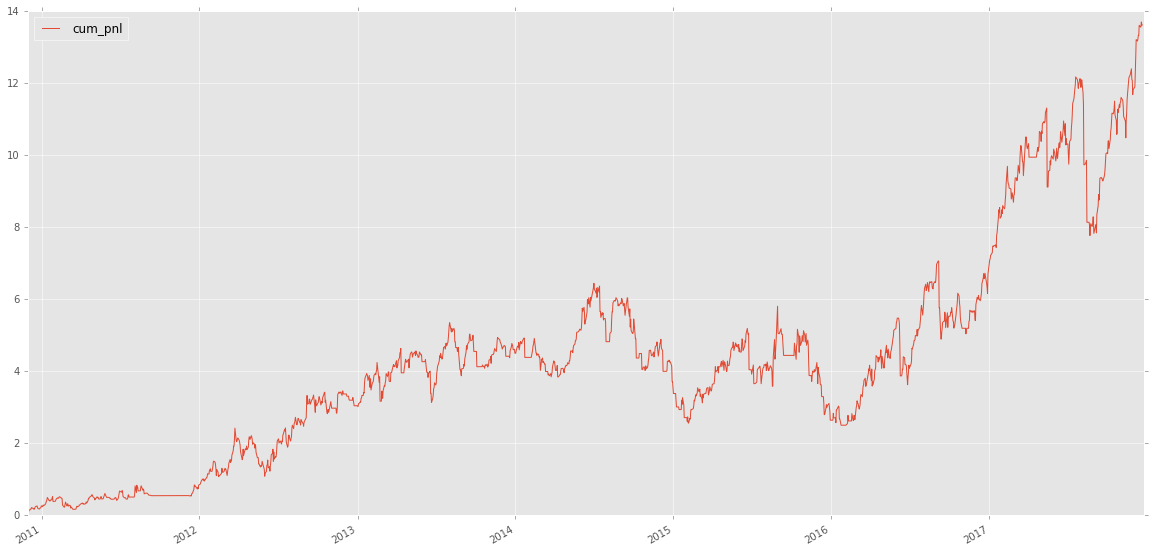

In [250]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,['cum_pnl']].plot(figsize = (20, 10))

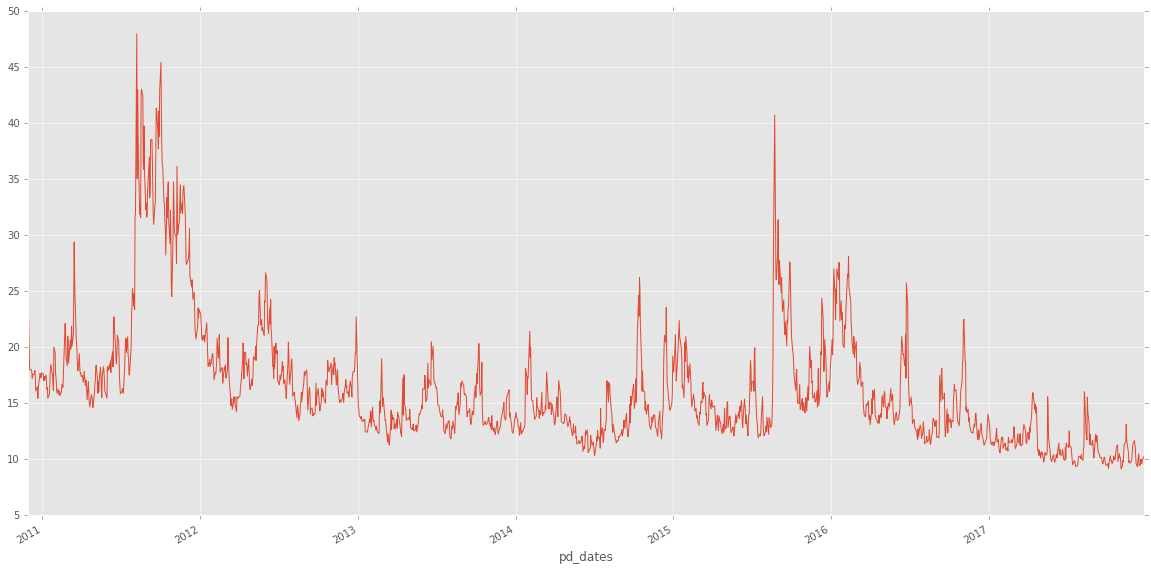

In [257]:
vix.loc['2010-11-29':,'VIX Close'].plot(figsize = (20, 10))

My analysis so far

1. Level of VIX for prediction of futures returns
2. Shape of the entire term structure
3. Hedging the positions with appropriate size of the position.
4. SMA on Contango and SMA on Backwardation

### Strategy 6. SMA on Contango

This strategy is basically like a time series momentum pilotted on the contango. I am only applying this to midterm volatility.

In [29]:
ts_vix_settle = ts_vix.loc[:,['settle_' + str(a) for a in range(1, 4)]]
ts_vix_settle = pd.concat([vix.loc[:,'VIX Close'], ts_vix_settle], axis = 1, join='inner')
ts_vix_settle.columns = ['VX0', 'VX1', 'VX2', 'VX3']

In [31]:
# The contango measure
ts_vix_settle['VX1_over_VX0'] = ts_vix_settle.VX1/ts_vix_settle.VX0
ts_vix_settle['VX2_over_VX1'] = ts_vix_settle.VX2/ts_vix_settle.VX1
ts_vix_settle['VX3_over_VX2'] = ts_vix_settle.VX3/ts_vix_settle.VX2

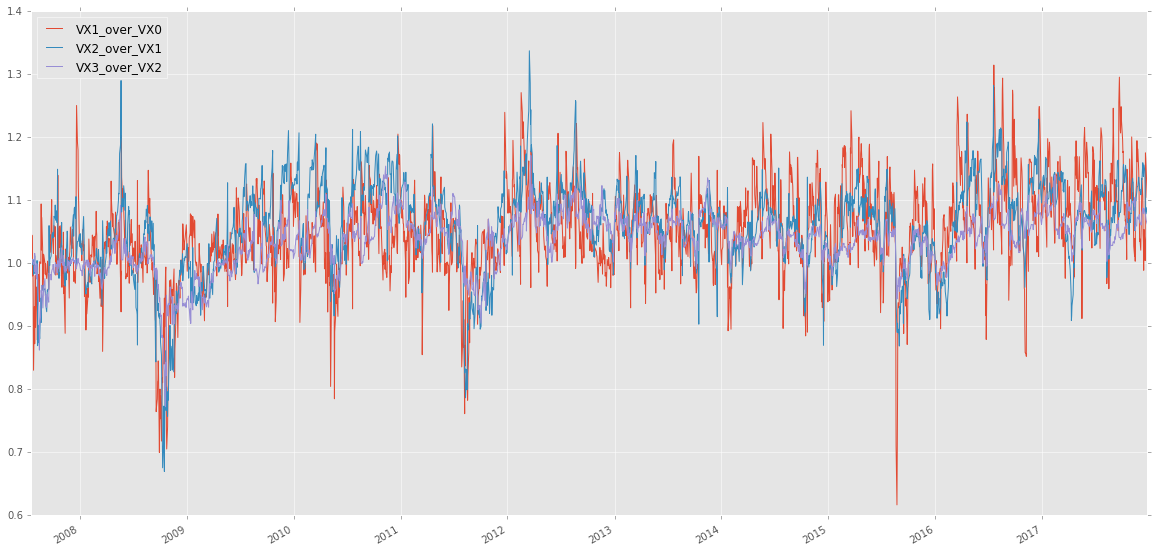

In [37]:
ts_vix_settle.loc[:, ['VX1_over_VX0', 'VX2_over_VX1', 'VX3_over_VX2']].plot(figsize = (20, 10))

In [41]:
# Normalizing it with the level of VIX

ts_vix_settle['VX1_over_VX0_norm'] = ts_vix_settle.VX1_over_VX0/np.log(ts_vix_settle.VX0) * 100.0
ts_vix_settle['VX2_over_VX1_norm'] = ts_vix_settle.VX2_over_VX1/np.log(ts_vix_settle.VX0) * 100.0
ts_vix_settle['VX3_over_VX2_norm'] = ts_vix_settle.VX3_over_VX2/np.log(ts_vix_settle.VX0) * 100.0

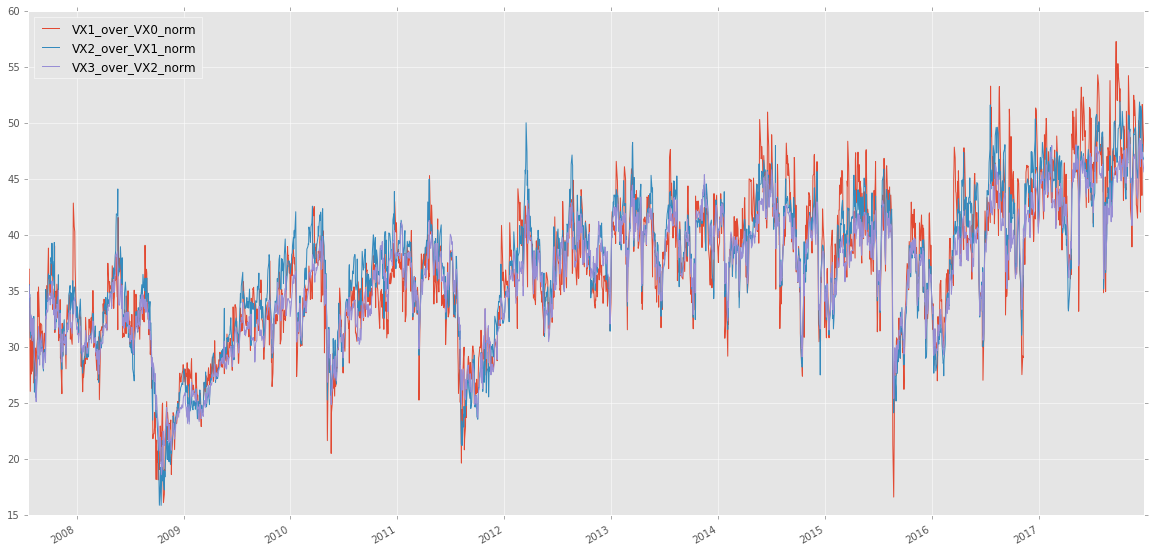

In [42]:
ts_vix_settle.loc[:, ['VX1_over_VX0_norm', 'VX2_over_VX1_norm', 'VX3_over_VX2_norm']].plot(figsize = (20, 10))

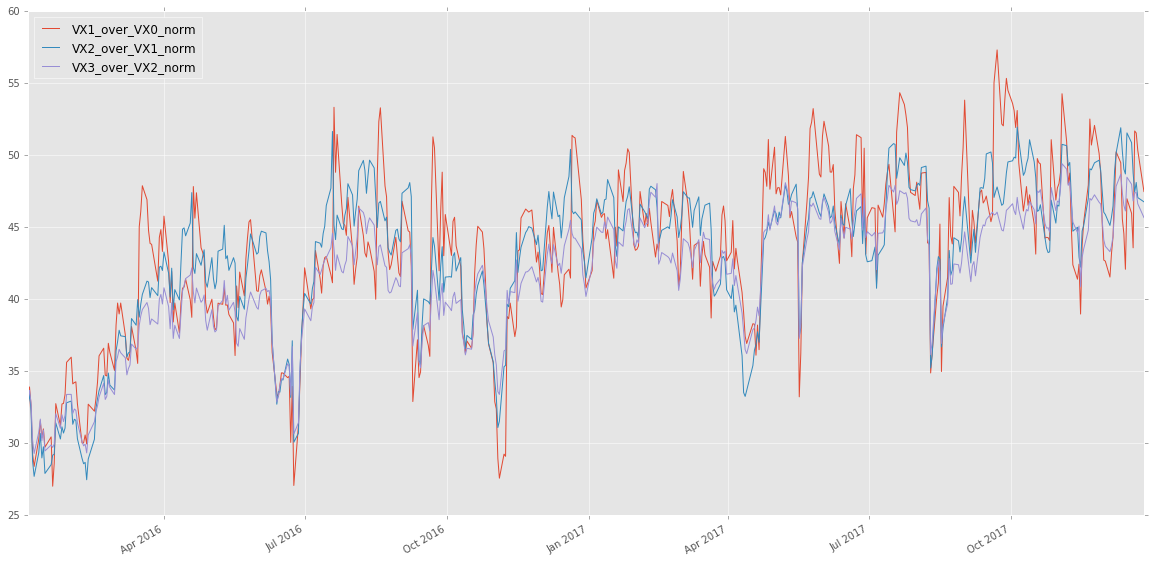

In [44]:
# The current low volatility period
ts_vix_settle.loc[ts_vix_settle.index > datetime.datetime(2016, 1, 1),\
                  ['VX1_over_VX0_norm', 'VX2_over_VX1_norm', 'VX3_over_VX2_norm']].plot(figsize = (20, 10))

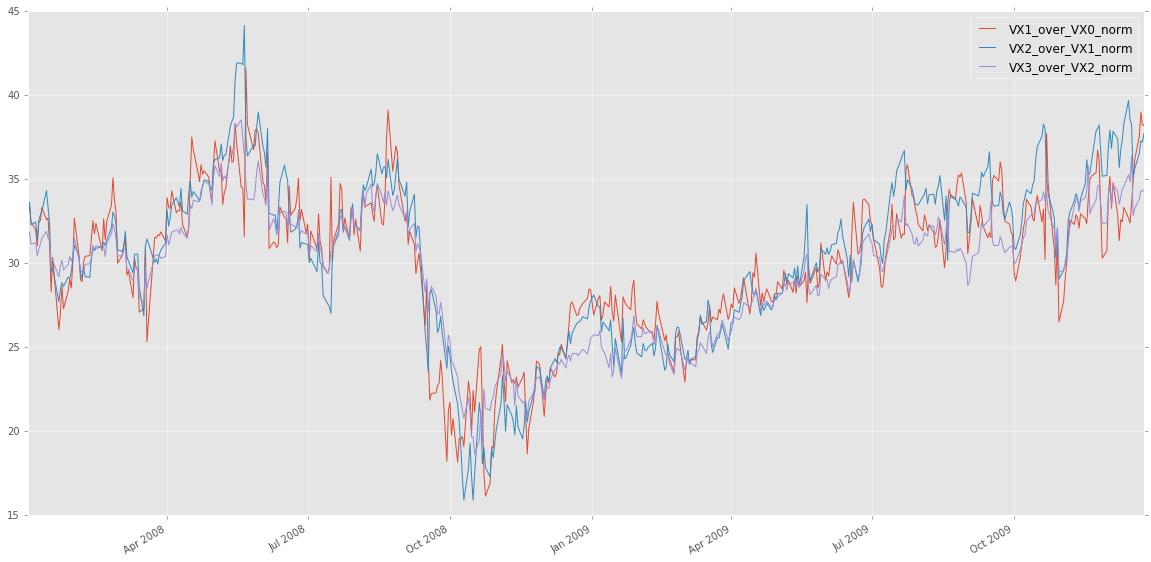

In [47]:
# Crisis high volatility period
ts_vix_settle.loc[(ts_vix_settle.index > datetime.datetime(2008, 1, 1)) & (ts_vix_settle.index < datetime.datetime(2009, 12, 25)),\
                  ['VX1_over_VX0_norm', 'VX2_over_VX1_norm', 'VX3_over_VX2_norm']].plot(figsize = (20, 10))

-- Before I move to the SMA on Contango/Backwardation, let's implement simple long strategies based on plain vanilla numbers. 

In [94]:
# long XIV
cond_xiv = (ts_vix_settle.VX1_over_VX0 > 1.0) \
        & (ts_vix_settle.VX2_over_VX1 > 1.0) # \
        # & (ts_vix_settle.VX2_over_VX1 > ts_vix_settle.VX3_over_VX2) 
# long VXX
cond_vxx = (ts_vix_settle.VX1_over_VX0 < 1.0) \
        & (ts_vix_settle.VX2_over_VX1 < 1.0) # \
        # & (ts_vix_settle.VX2_over_VX1 < ts_vix_settle.VX3_over_VX2) 


In [95]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')

In [96]:
trade_data = pd.concat([rets, cond_xiv], axis = 1, join='inner')
trade_data = pd.concat([trade_data, cond_vxx], axis = 1, join='inner')
trade_data.columns = ['close_xiv', 'ret_xiv', 'close_vxx', 'ret_vxx', 'xiv_sig', 'vxx_sig']

In [97]:
trade_data.sort_index(axis=0, inplace=True)
trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)

In [98]:
trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['ret_xiv_real']
trade_data['vxx_pnl'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxx_pnl']

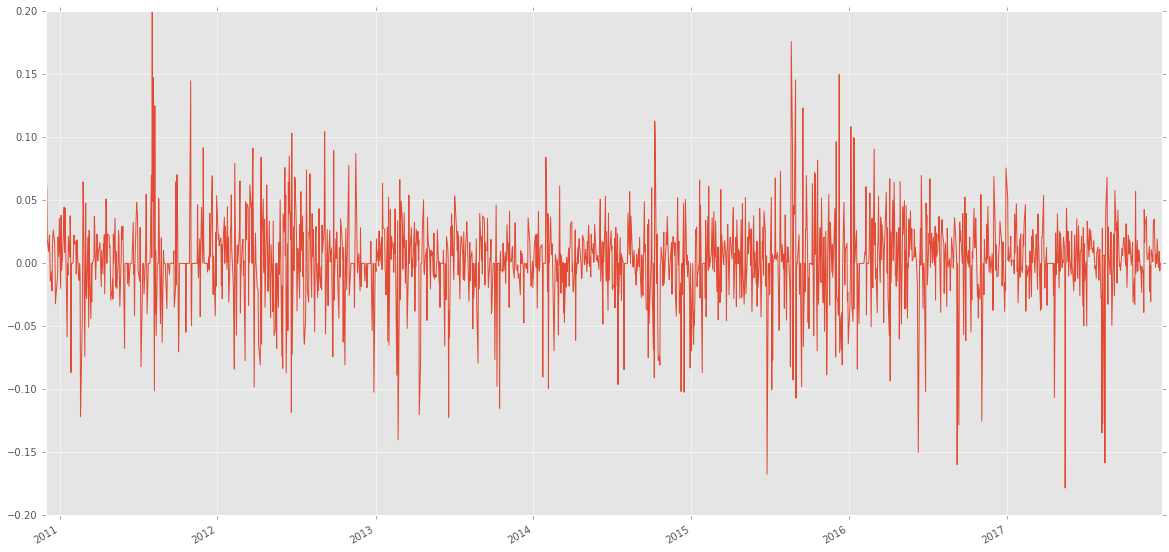

In [99]:
trade_data.pnl.plot(figsize=(20, 10))

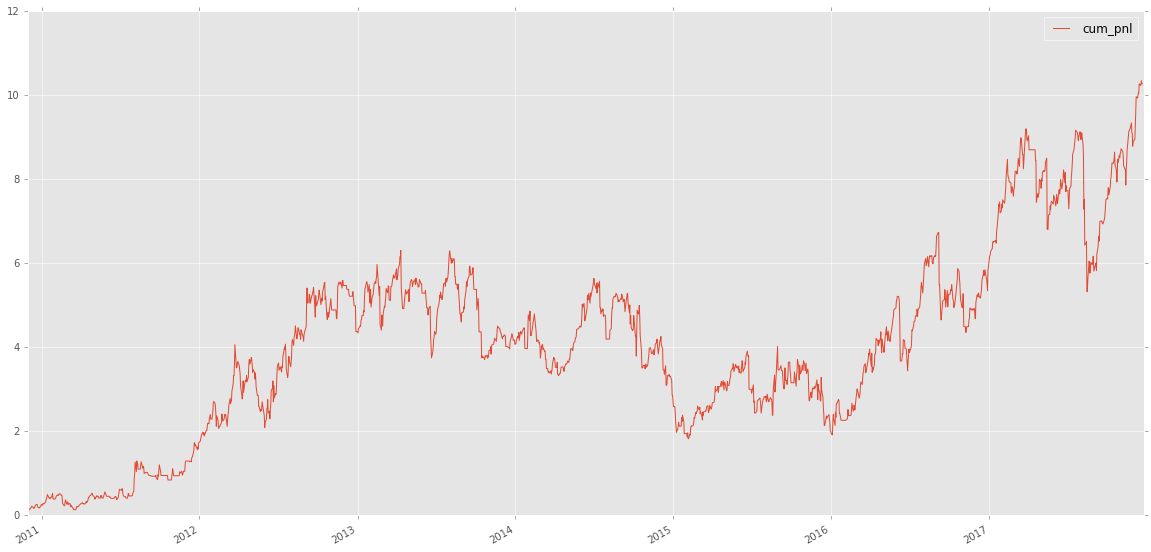

In [100]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,['cum_pnl']].plot(figsize = (20, 10))

In [77]:
xiv.head()

adj_close  adj_high  adj_low  adj_open  adj_volume   close  \
date                                                                     
2017-12-29     134.44    137.42   134.00    137.35   4539682.0  134.44   
2017-12-28     136.77    136.77   135.09    135.27   2562291.0  136.77   
2017-12-27     134.03    137.34   134.03    135.90   4343257.0  134.03   
2017-12-26     135.30    136.78   133.97    134.00   2677960.0  135.30   
2017-12-22     135.28    137.05   134.20    136.06   4054469.0  135.28   

            ex_dividend    high     low    open  split_ratio     volume  
date                                                                     
2017-12-29          0.0  137.42  134.00  137.35          1.0  4539682.0  
2017-12-28          0.0  136.77  135.09  135.27          1.0  2562291.0  
2017-12-27          0.0  137.34  134.03  135.90          1.0  4343257.0  
2017-12-26          0.0  136.78  133.97  134.00          1.0  2677960.0  
2017-12-22          0.0  137.05  134.20  136.06          1.0  4054469.0

# Strategy 7. Hedging Strategy 1

In [112]:
ivts = vix.iloc[:,3]/vix3m.iloc[:,3]
ivts = ivts.rename('ivts')
#ivts.describe()

In [113]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')

In [124]:
trade_data = pd.concat([ivts, rets], axis = 1, join='inner')

In [125]:
trade_data['xiv_sig'] = 0
trade_data['vxx_sig'] = 0
trade_data.loc[trade_data.loc[:,'ivts'] < 0.93, 'xiv_sig'] = 1
trade_data.loc[trade_data.loc[:,'ivts'] > 1.03, 'vxx_sig'] = 1

In [126]:
trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)
# Getting the "realized" returns
trade_data['pnl_xiv'] = trade_data['xiv_sig'] * trade_data['ret_xiv_real'] * 0.9 + trade_data['ret_vxx_real'] * 0.1
trade_data['pnl_vxx'] = trade_data['vxx_sig'] * trade_data['ret_vxx_real'] * 0.9 + trade_data['ret_xiv_real'] * 0.1
trade_data['pnl'] = trade_data['pnl_xiv'] + trade_data['pnl_vxx']

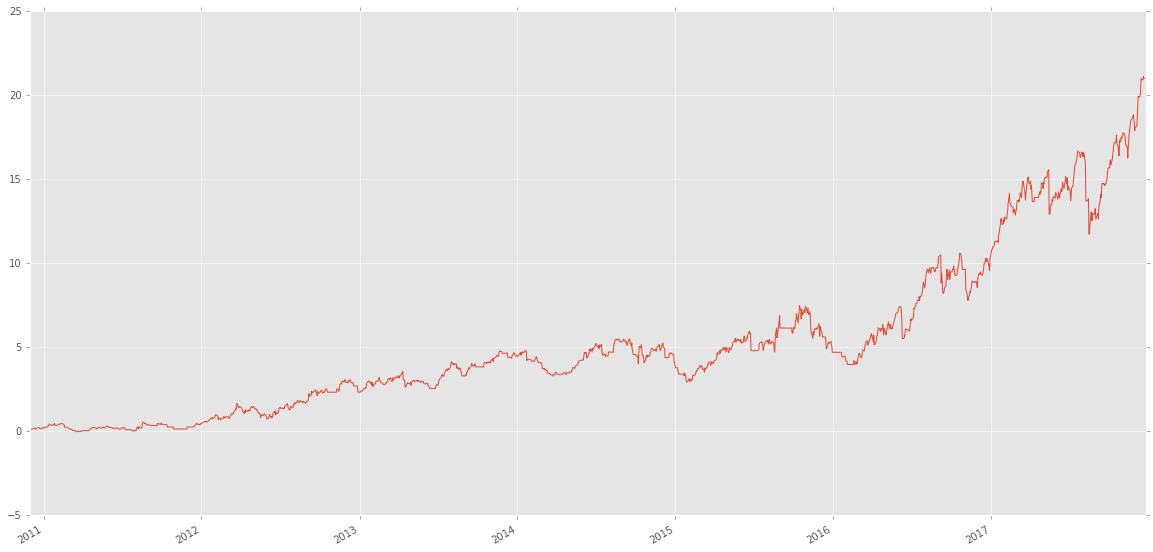

In [127]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.cum_pnl.plot(figsize = (20, 10))

In [128]:
trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

1.1927009148142409

## Strategy 8. Donninger Paper

We buy XIV, hedge it with ZIV and stay out of the market when VIX is high. Also, we only invest when front-month VIX contract is above VIX.

1. Front month contract must trade 5% at a premium on top of `VIX`.
2. Once the condition is met we sell `VIX` short and hedge it with mid-term futures. (Buy `XIV` and `VXZ` for example)

In [146]:
ts_vix_settle = ts_vix.loc[:,['settle_' + str(a) for a in range(1, 4)]]
ts_vix_settle = pd.concat([vix.loc[:,'VIX Close'], ts_vix_settle], axis = 1, join='inner')
ts_vix_settle.columns = ['VX0', 'VX1', 'VX2', 'VX3']
# bring in VIX, XIV and VXZ
trade_data = pd.concat([ts_vix_settle, xiv.loc[:, 'adj_close']], axis = 1, join='inner')
trade_data = pd.concat([trade_data, vxz.loc[:, 'adj_close']], axis = 1, join='inner')
trade_data = pd.concat([trade_data, ziv.loc[:, 'adj_close']], axis = 1, join='inner')
#
trade_data.columns = ['VX0', 'VX1', 'VX2', 'VX3', 'xiv_close', 'vxz_close', 'ziv_close']

In [147]:
# xiv and vxz return
trade_data['xiv_ret'] = trade_data.loc[:, 'xiv_close'].pct_change()
trade_data['vxz_ret'] = trade_data.loc[:, 'vxz_close'].pct_change()
trade_data['ziv_ret'] = trade_data.loc[:, 'ziv_close'].pct_change()
#
trade_data['xiv_real_ret'] = trade_data.loc[:, 'xiv_ret'].shift(-1)
trade_data['vxz_real_ret'] = trade_data.loc[:, 'vxz_ret'].shift(-1)
trade_data['ziv_real_ret'] = trade_data.loc[:, 'ziv_ret'].shift(-1)
#
trade_data['sig_xiv'] = 0
trade_data['sig_ziv'] = 0

trade_data.loc[(trade_data['VX1'] >  trade_data['VX0']) & (trade_data['VX1'] < 1.05 * trade_data['VX0']), 'sig_ziv'] = 1
trade_data.loc[trade_data['VX1'] >= 1.05 * trade_data['VX0'], 'sig_xiv'] = 1

trade_data['pnl'] = 0.8 * trade_data['sig_xiv'] * trade_data['xiv_real_ret'] + 0.2 * trade_data['sig_xiv'] * trade_data['vxz_real_ret'] \
+ 0.95 * trade_data['sig_ziv'] * trade_data['ziv_real_ret'] + 0.05 * trade_data['sig_ziv'] * trade_data['vxz_real_ret'] 

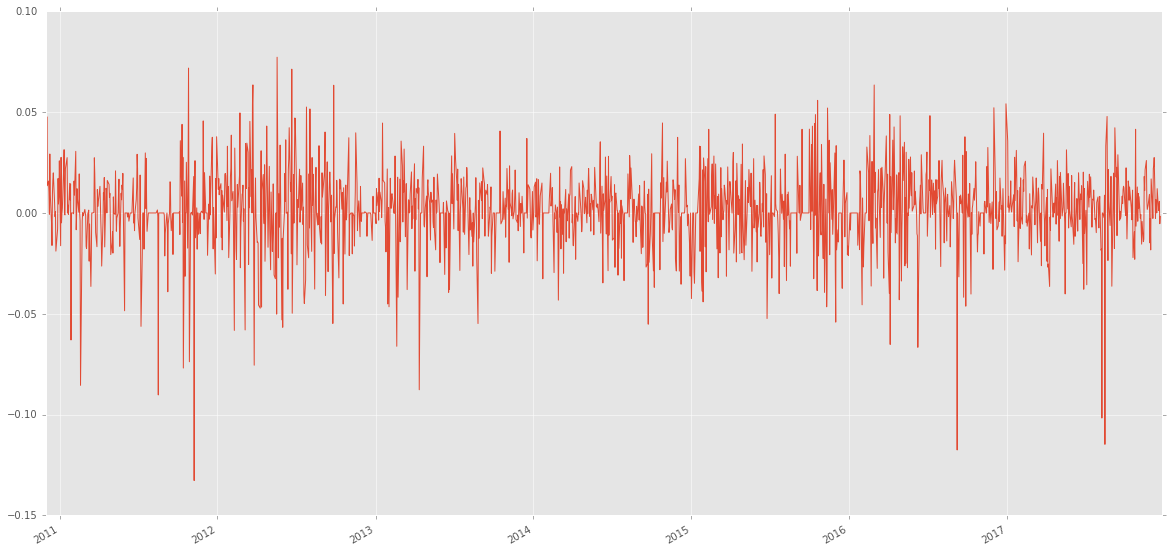

In [148]:
trade_data.pnl.plot(figsize=(20, 10))

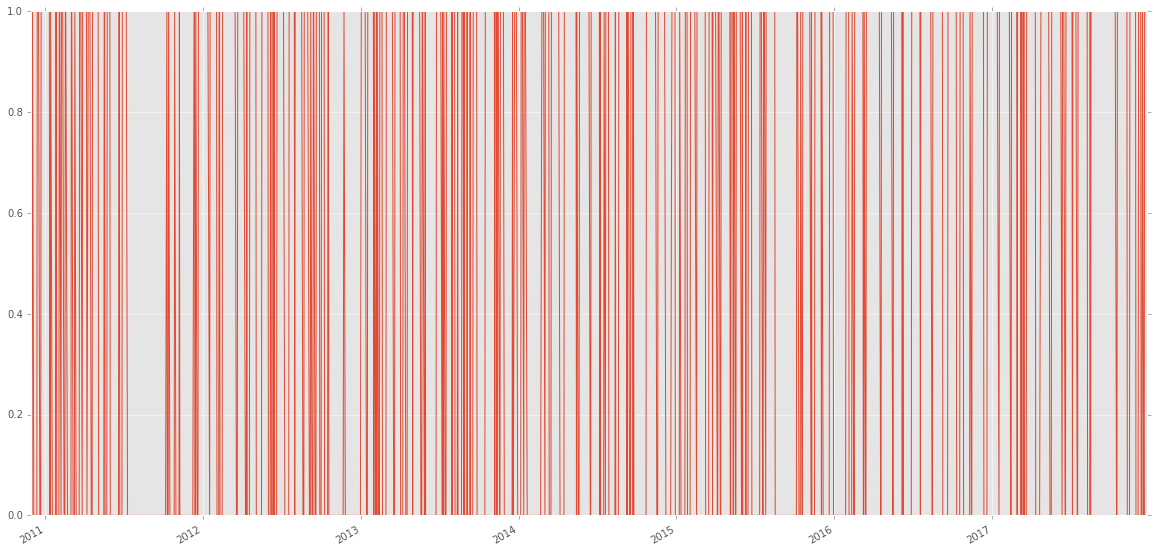

In [149]:
trade_data.sig_xiv.plot(figsize=(20, 10))

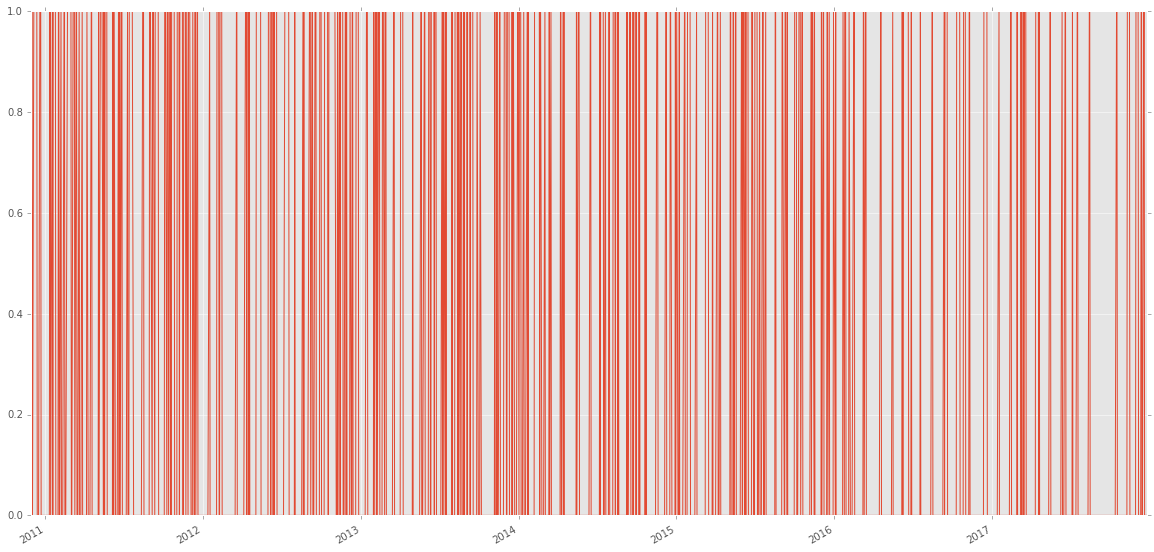

In [150]:
trade_data.sig_ziv.plot(figsize=(20, 10))

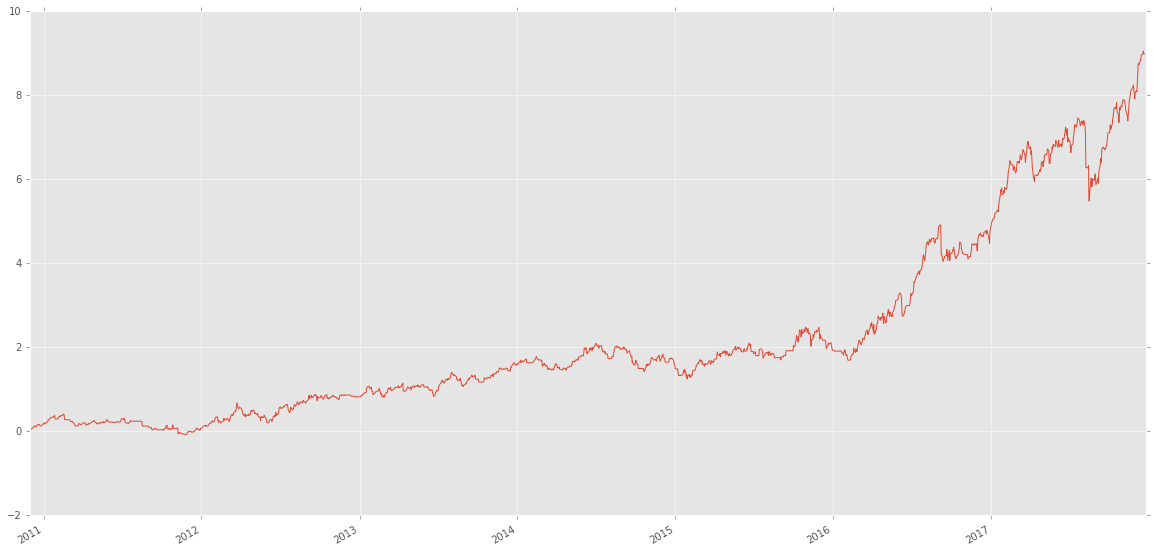

In [151]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.cum_pnl.plot(figsize = (20, 10))

In [152]:
trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

1.2322986095212869

In [153]:
trade_data.pnl.mean() * 252

0.37209649931098754

the amount of hedge is dependent on the VIX level. This can be defined as a mathematical problem. If VIX is around 11 would you hedge as aggressively as you would when it is 20? HELL NO

# Horserace Between Strategies

A number of indicators have been chosen to test as a contango/backwardation signal. 

1. VXST/VIX, 1 - 1.1
2. VXST/VXV, 1.02 - 1.12
3. VXST/VX30, 1.04 - 1.15
4. VIX/VXV, 0.92 - 1.02 
5. VIX/VX30, 0.92 - 1.1
6. VIX/VX45, 0.91 - 1.1
7. VIX/VX60, 0.9 - 1.08
8. VX1/VX45, 1 - 1.04 
9. VXV/VXMT, 

We are going to take the Donninger's recommendation and apply a filter to the signal for smoothness (always listen to traders but question their reasoning). 

In [18]:
all_signals = pd.concat([vix.loc[:,'VIX Close'], vxst.loc[:,'Close']], axis=1, join='outer')
all_signals = pd.concat([all_signals, vix3m.loc[:,'CLOSE']], axis=1, join='outer')
ts_vix_settle = ts_vix.loc[:,['settle_' + str(a) for a in range(1, 8)]]
all_signals = pd.concat([all_signals, ts_vix_settle], axis=1, join='outer')
all_signals = pd.concat([all_signals, vixmt.loc[:,'Close']], axis=1, join='outer')

In [19]:
all_signals.columns = ['vix', 'vxst', 'vix3m', 'vix30', 'vix60', 'vix90', 'vix120', 'vix150', 'vix180', 'vix210', 'vixmt']
all_signals.head()

vix  vxst  vix3m  vix30  vix60  vix90  vix120  vix150  vix180  \
2004-01-02  18.22   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-05  17.49   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-06  16.73   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-07  15.50   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-08  15.61   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

            vix210  vixmt  
2004-01-02     NaN    NaN  
2004-01-05     NaN    NaN  
2004-01-06     NaN    NaN  
2004-01-07     NaN    NaN  
2004-01-08     NaN    NaN

We bring in XIV and VXZ. Longer backtest can be available later.

In [20]:
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxz_ret = pd.DataFrame(columns=['close_vxz', 'ret_vxz'], index=pd.to_datetime(vxz.index))
vxz_ret['close_vxz'] = vxz.loc[:,'adj_close']
vxz_ret.sort_index(axis=0)
vxz_ret['ret_vxz'] = (vxz_ret.close_vxz - vxz_ret.close_vxz.shift(-1))/vxz_ret.close_vxz.shift(-1)
#
rets = pd.concat([xiv_ret, vxz_ret], axis=1, join='inner')
rets['real_ret_xiv'] = rets.loc[:,'ret_xiv'].shift(1)
rets['real_ret_vxz'] = rets.loc[:,'ret_vxz'].shift(1)

In [21]:
# Combining it all
trade_data = pd.concat([all_signals, rets], axis = 1, join='outer')

### Signal 1. VXST/VIX

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).median()
  app.launch_new_instance()
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()


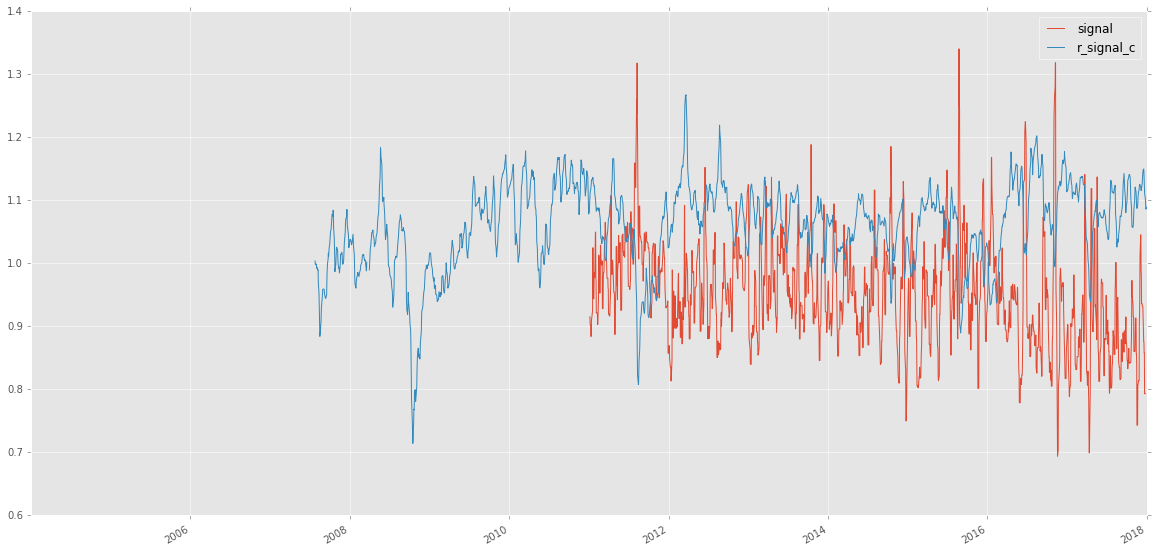

In [164]:
# Starting from signal 1
trade_data['signal'] = trade_data['vxst']/trade_data['vix']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=3)
trade_data['r_signal_c'] = pd.rolling_mean(trade_data['vix60']/trade_data['vix30'], window=6)
trade_data['r_diff_signal_c'] = trade_data['r_signal_c'].diff(1)
trade_data.loc[:,['signal', 'r_signal_c']].plot(figsize=(20, 10))

In [165]:
print trade_data.loc[:,'signal'].quantile(0.7), trade_data.loc[:,'signal'].quantile(0.9) 

0.9933890405 1.0522434553


In [177]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[(trade_data['signal'] < 0.994) & (trade_data['r_diff_signal_c'] > 0.0), 'xiv_sig'] = 1.0
trade_data.loc[(trade_data['signal'] < 0.994) & (trade_data['r_diff_signal_c'] > 0.0), 'vxz_sig'] = 0.0

#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'xiv_sig'] = 0.6
#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'vxz_sig'] = 0.4

#trade_data.loc[(trade_data['signal'] > 1.05) & (trade_data['r_diff_signal_c'] < 0.0), 'xiv_sig'] = 0.3
#trade_data.loc[(trade_data['signal'] > 1.05) & (trade_data['r_diff_signal_c'] < 0.0), 'vxz_sig'] = 0.7

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.00167679490697
robust average return:  0.0
worst return:  -0.188197767145
std:  0.0197650824091
win rate:  1.64102564103
win size:  0.0214644056156
robust win size:  0.0168489521077
sharpe:  1.34673326374


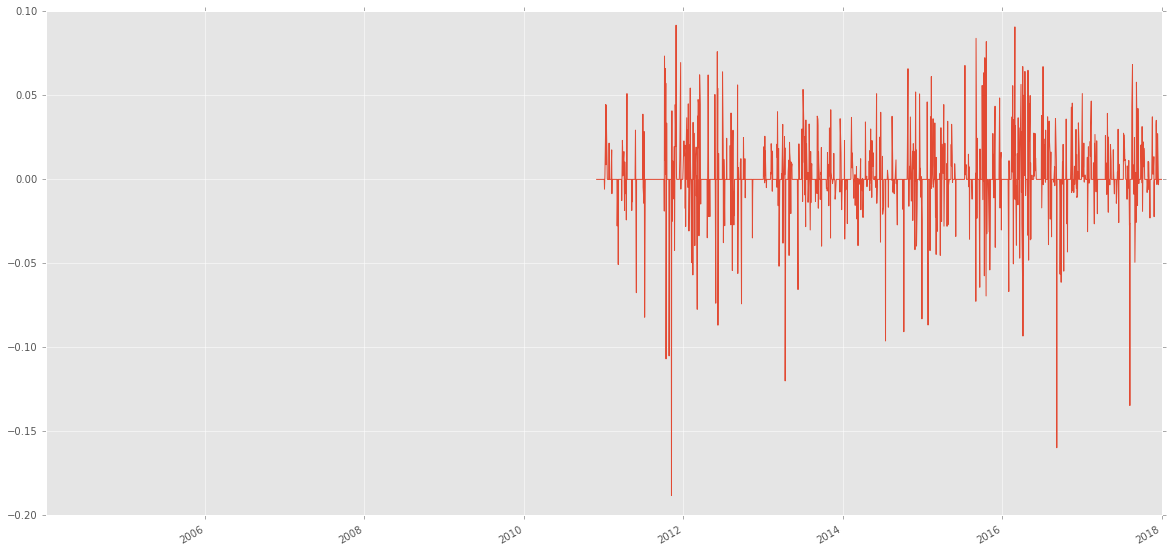

In [178]:
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

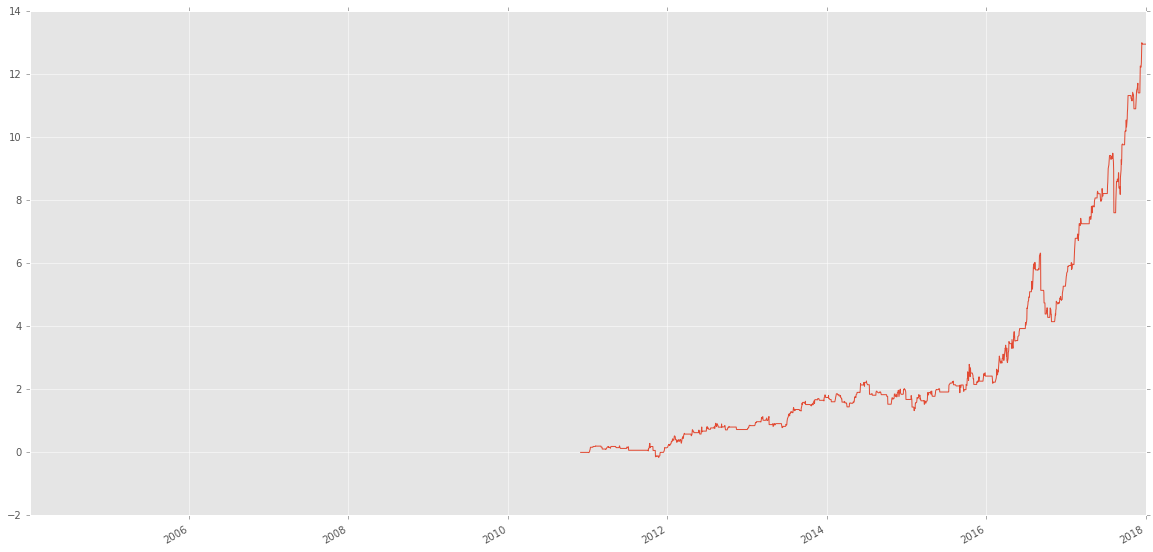

In [179]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,'cum_pnl'].plot(figsize = (20, 10))

##### Signal 2. VXST/VXV

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).median()
  app.launch_new_instance()
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] w

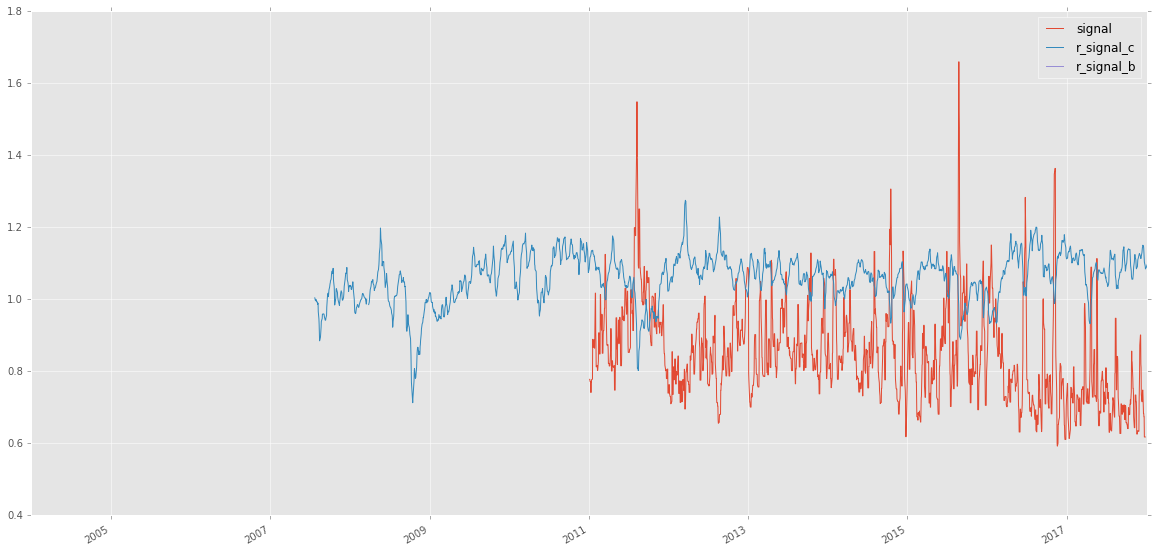

In [22]:
# Starting from signal 1
trade_data['signal'] = trade_data['vxst']/trade_data['vix3m']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=3)
trade_data['r_signal_c'] = pd.rolling_mean(trade_data['vix60']/trade_data['vix30'], window=5)
trade_data['r_diff_signal_c'] = trade_data['r_signal_c'].diff(1)
trade_data.loc[:,['signal', 'r_signal_c', 'r_signal_b']].plot(figsize=(20, 10))

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_quantile is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).quantile(quantile=0.7)
  if __name__ == '__main__':


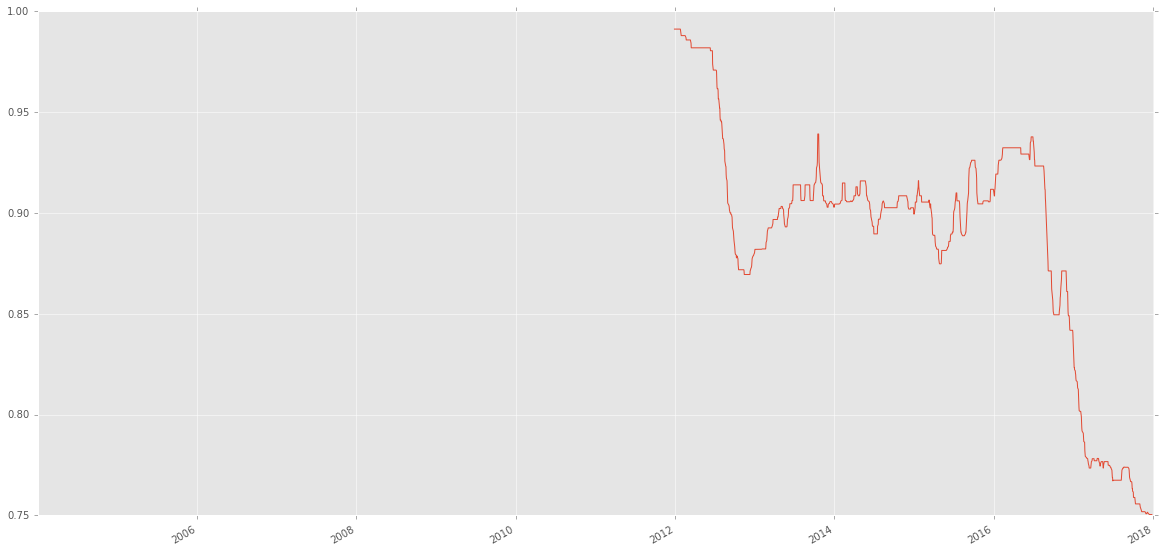

In [181]:
pd.rolling_quantile(trade_data['signal'], quantile=0.7 ,window=250).plot(figsize = (20, 10))

Rolling quantile is another area that should be investigated!!

In [182]:
print trade_data.loc[:,'signal'].quantile(0.7), trade_data.loc[:,'signal'].quantile(0.95) 

0.899100899101 1.07095516885


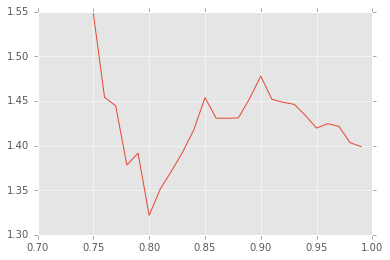

In [25]:
# Let's see if the threshold is important
thres_list = np.arange(0.75, 1, 0.01)
winrates = np.array([float(np.sum(trade_data.loc[trade_data['signal'] < thres ,'real_ret_xiv'] > 0))\
 /float(np.sum(trade_data.loc[trade_data['signal'] < thres ,'real_ret_xiv'] < 0))  for thres in thres_list])
#print thres_list
#print winrates
plt.plot(thres_list, winrates)

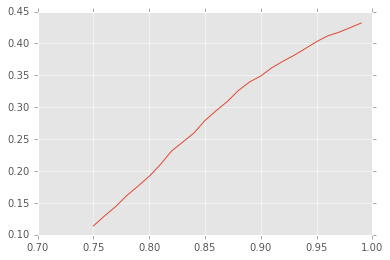

In [27]:
# next we look at the number of times we are in the market! 
thres_list = np.arange(0.75, 1, 0.01)
traderates = np.array([float(np.sum(trade_data['signal'] < thres))/trade_data.shape[0] for thres in thres_list])
#print thres_list
#print winrates
plt.plot(thres_list, traderates)

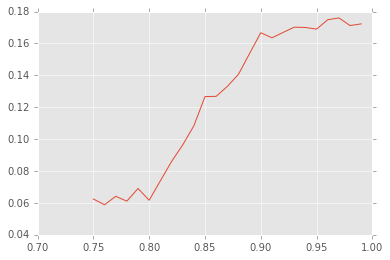

In [29]:
# where has been optimal in the past. 
# This is prob overfitting
plt.plot(thres_list, traderates * (winrates - 1))

In [190]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[(trade_data['signal'] < 0.9) & (trade_data['r_diff_signal_c'] > 0.0), 'xiv_sig'] = 0.7
trade_data.loc[(trade_data['signal'] < 0.9) & (trade_data['r_diff_signal_c'] > 0.0), 'vxz_sig'] = 0.3

#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'xiv_sig'] = 0.6
#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'vxz_sig'] = 0.4

trade_data.loc[(trade_data['signal'] > 1.06) & (trade_data['r_diff_signal_c'] < 0.0), 'xiv_sig'] = 0.3
trade_data.loc[(trade_data['signal'] > 1.06) & (trade_data['r_diff_signal_c'] < 0.0), 'vxz_sig'] = 0.7

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.00100130010764
robust average return:  0.0
worst return:  -0.0964683109624
std:  0.0105073144387
win rate:  1.52615384615
win size:  0.0112171500693
robust win size:  0.00918677727729
sharpe:  1.51276965472


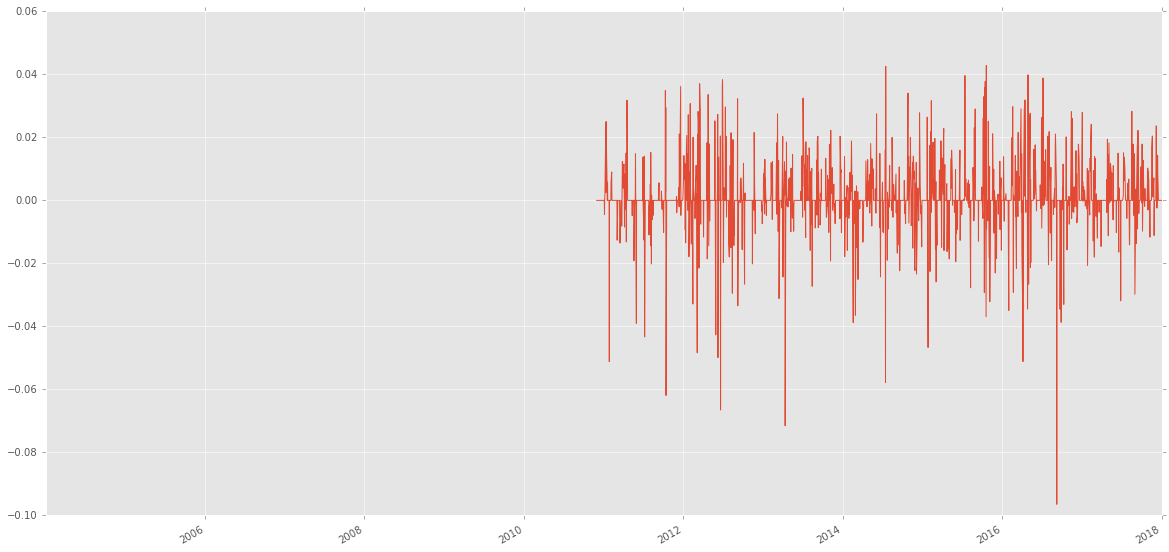

In [191]:
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

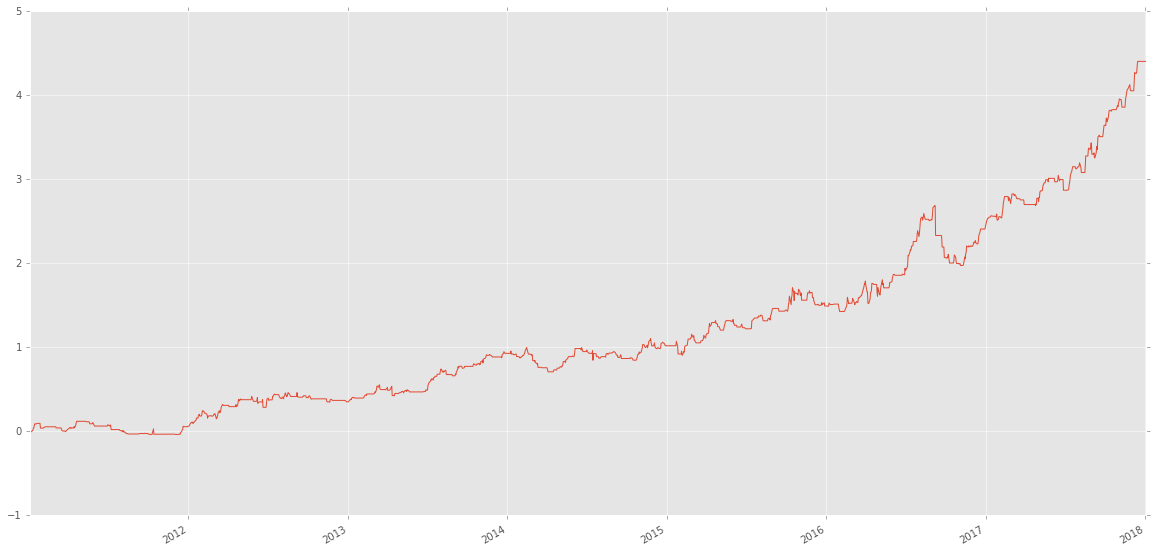

In [192]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[trade_data.index > datetime.datetime(2011, 1, 1),'cum_pnl'].plot(figsize = (20, 10))

THERE ARE A FEW THINGS TO TRY

1. Mean-reversion of the contango 
2. Just trading XIV or a leveraged version of one. 
3. Robustness of this signal. Can I trade open-to-open instead of close-to-close? What if I use CBOE's close price instead of settle?
4. Sortino and drawdowns
5. Longer back-test.

### Signal 3. VXST/VX30

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).median()
  app.launch_new_instance()


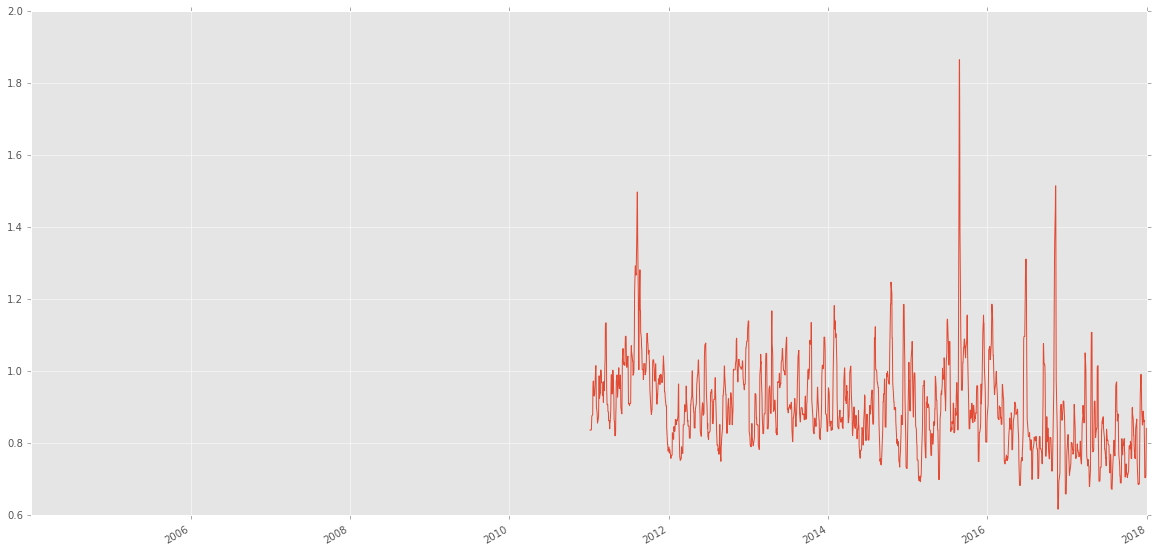

In [106]:
# Starting from signal 1
trade_data['signal'] = trade_data['vxst']/trade_data['vix30']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=4)
trade_data.loc[:,'signal'].plot(figsize=(20, 10))

In [107]:
print trade_data.loc[:,'signal'].quantile(0.7), trade_data.loc[:,'signal'].quantile(0.9) 

0.959980864536 1.05081022407


In [111]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[trade_data['signal'] <= 0.96, 'xiv_sig'] = 0.7
trade_data.loc[trade_data['signal'] <= 0.96, 'vxz_sig'] = 0.3

trade_data.loc[trade_data['signal'] > 1.05, 'xiv_sig'] = 0.5
trade_data.loc[trade_data['signal'] > 1.05, 'vxz_sig'] = 0.5

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.000786565093103
robust average return:  0.00114559034874
worst return:  -0.110289257411
std:  0.0195996816284
win rate:  1.38962962963
win size:  0.0134751294823
robust win size:  0.010629505633
sharpe:  0.637068192977


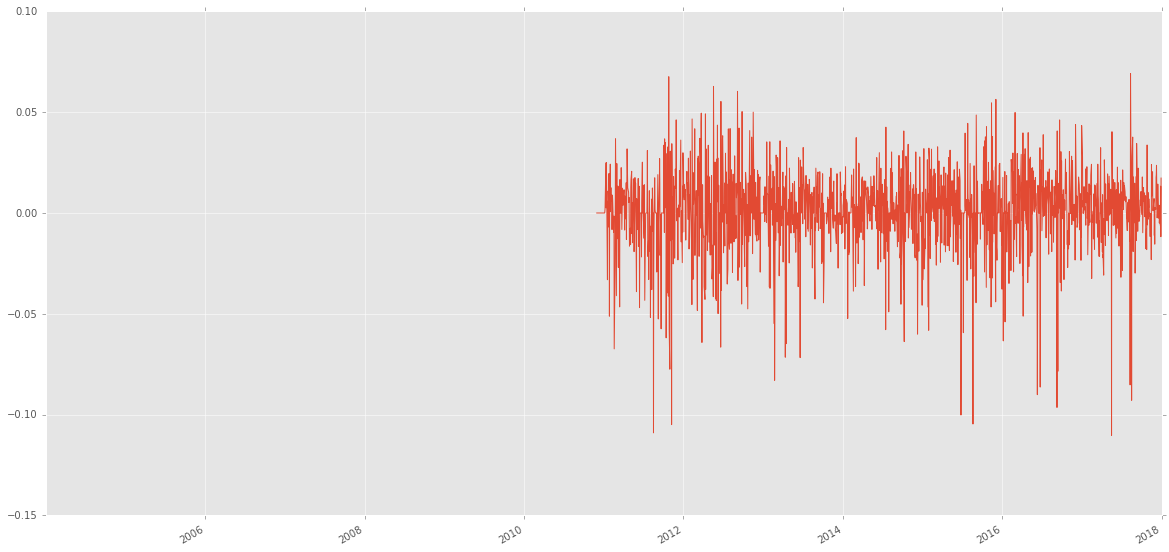

In [112]:
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

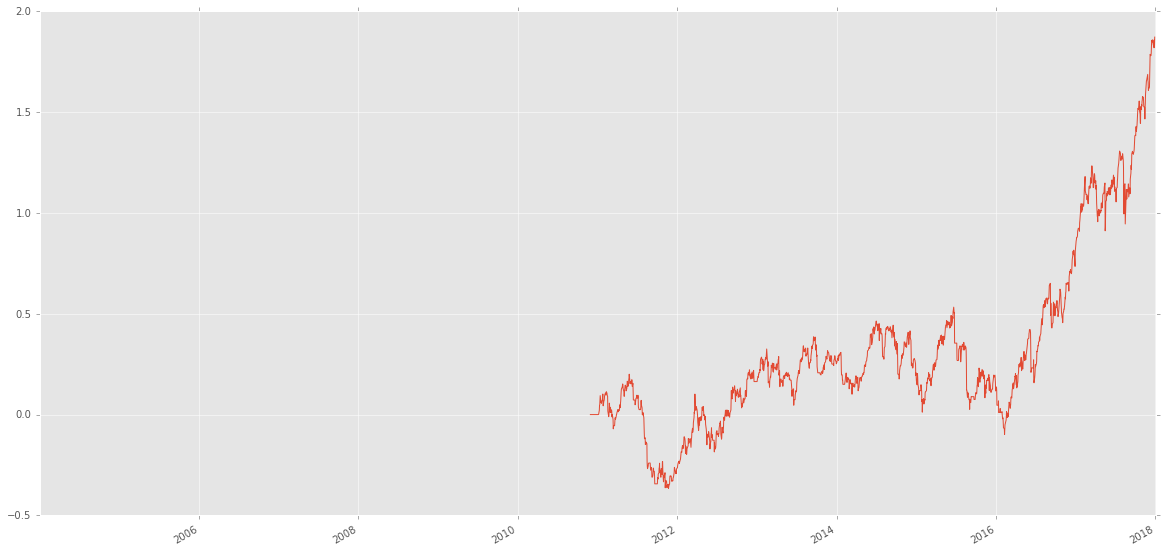

In [113]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,'cum_pnl'].plot(figsize = (20, 10))

### Signal 4. VIX/VXV

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).median()
  app.launch_new_instance()
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()


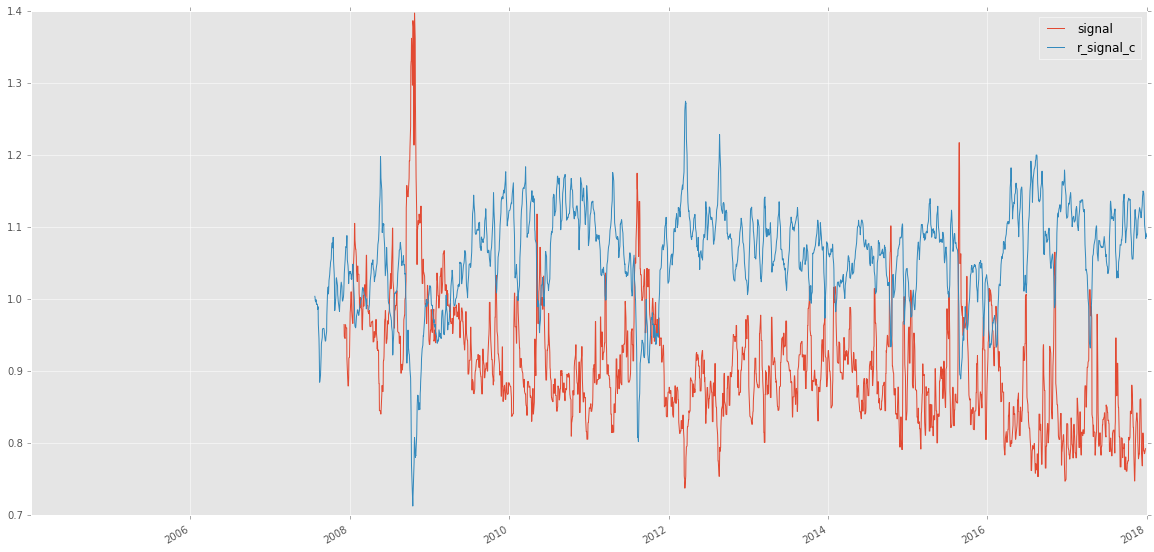

In [105]:
# Starting from signal 1
trade_data['signal'] = trade_data['vix']/trade_data['vix3m']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=3)
trade_data['r_signal_c'] = pd.rolling_mean(trade_data['vix60']/trade_data['vix30'], window=5)
trade_data['r_diff_signal_c'] = trade_data['r_signal_c'].diff(1)
trade_data.loc[:,['signal', 'r_signal_c']].plot(figsize=(20, 10))

In [106]:
print trade_data.loc[:,'signal'].quantile(0.7), trade_data.loc[:,'signal'].quantile(0.95) 

0.937287988665 1.03826460442


In [114]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[(trade_data['signal'] < 0.93) & (trade_data['r_diff_signal_c'] > 0.0), 'xiv_sig'] = 0.8
trade_data.loc[(trade_data['signal'] < 0.93) & (trade_data['r_diff_signal_c'] > 0.0), 'vxz_sig'] = 0.2

#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'xiv_sig'] = 0.6
#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'vxz_sig'] = 0.4

trade_data.loc[(trade_data['signal'] > 1.03) & (trade_data['r_diff_signal_c'] < 0.0), 'xiv_sig'] = 0.2
trade_data.loc[(trade_data['signal'] > 1.03) & (trade_data['r_diff_signal_c'] < 0.0), 'vxz_sig'] = 0.8

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.00132095152405
robust average return:  0.0
worst return:  -0.122570124847
std:  0.0143524835739
win rate:  1.51612903226
win size:  0.014999652333
robust win size:  0.0120249799897
sharpe:  1.46103322478


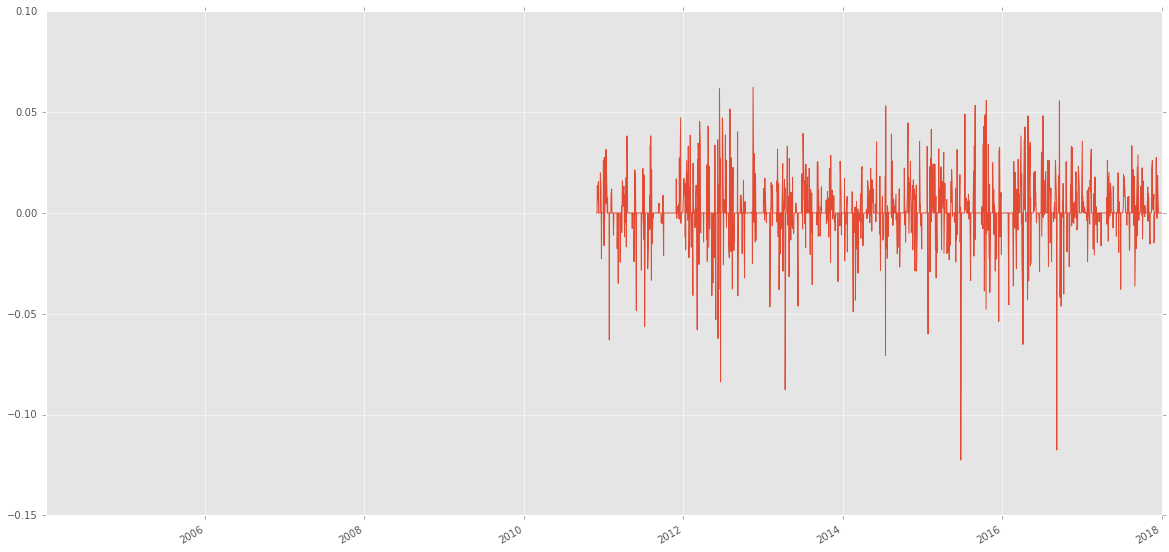

In [115]:
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

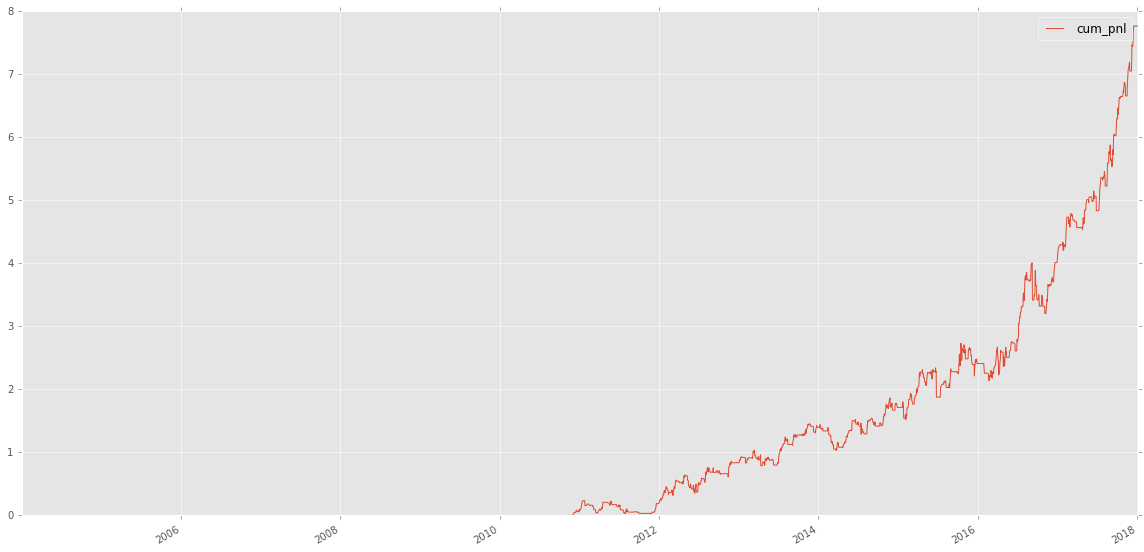

In [116]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data['cum_pnl_xiv'] = (1 + trade_data['real_ret_xiv']).cumprod() - 1
#trade_data.loc[:,['cum_pnl', 'cum_pnl_xiv']].plot(figsize = (20, 10))
trade_data.loc[:,['cum_pnl']].plot(figsize = (20, 10))

### Signal 6. VIX/VIX30 

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).median()
  app.launch_new_instance()


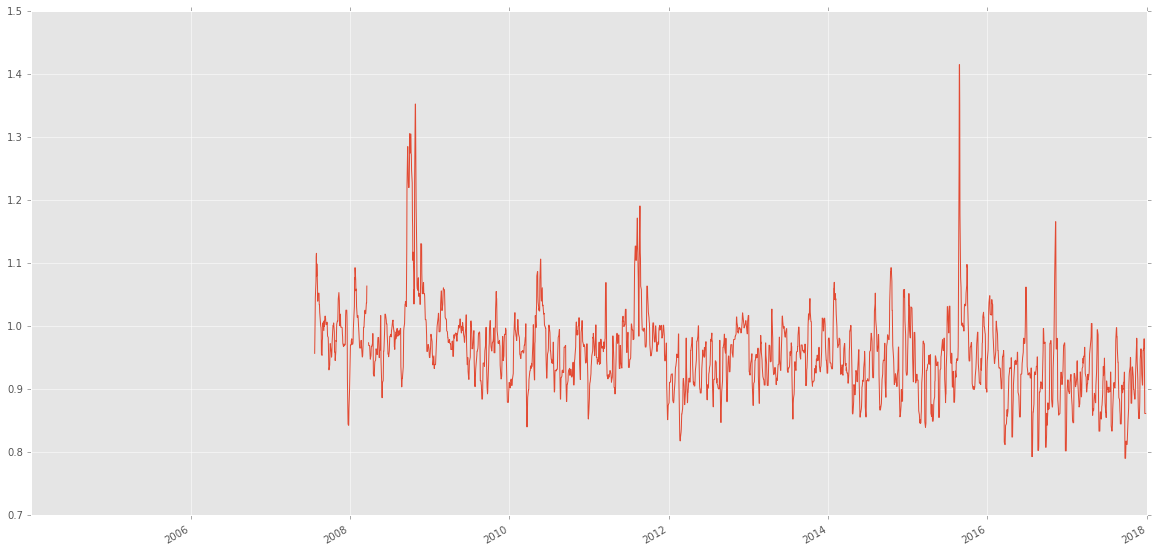

In [131]:
# Starting from signal 1
trade_data['signal'] = trade_data['vix']/trade_data['vix30']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=4)
trade_data.loc[:,'signal'].plot(figsize=(20, 10))

In [132]:
print trade_data.loc[:,'signal'].quantile(0.7), trade_data.loc[:,'signal'].quantile(0.95) 

0.982975145366 1.05364739628


In [134]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[trade_data['signal'] <= 0.98, 'xiv_sig'] = 0.7
trade_data.loc[trade_data['signal'] <= 0.98, 'vxz_sig'] = 0.3

trade_data.loc[trade_data['signal'] > 1.05, 'xiv_sig'] = 0.3
trade_data.loc[trade_data['signal'] > 1.05, 'vxz_sig'] = 0.7

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.000985304285448
robust average return:  0.0
worst return:  -0.110289257411
std:  0.0173297264228
win rate:  1.41595925297
win size:  0.0128058337997
robust win size:  0.00993135803364
sharpe:  0.902565929116


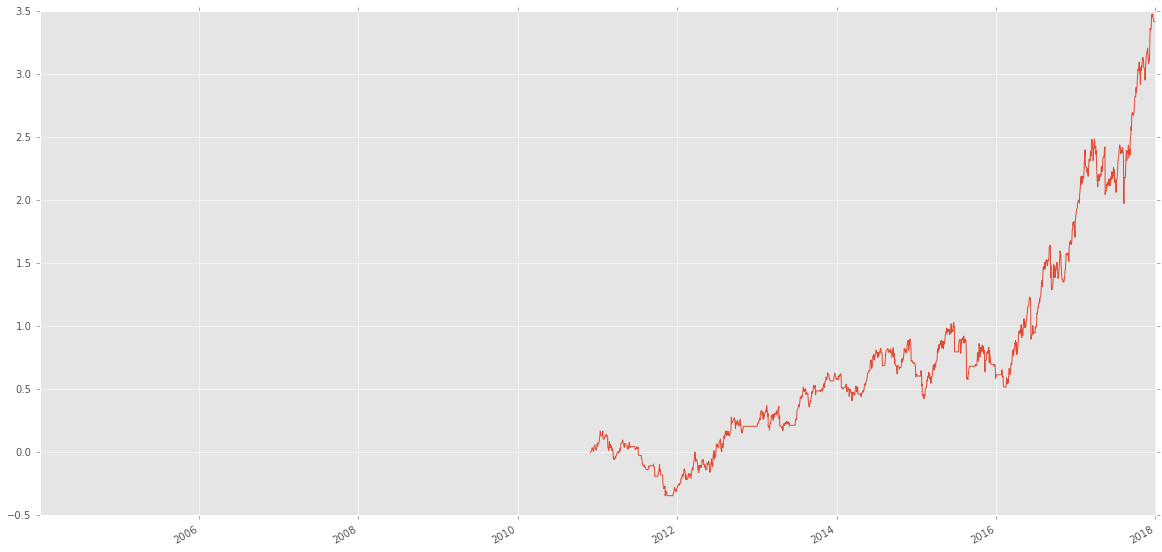

In [135]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,'cum_pnl'].plot(figsize = (20, 10))

### Signal 9. VXV/VXMT

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).median()
  app.launch_new_instance()


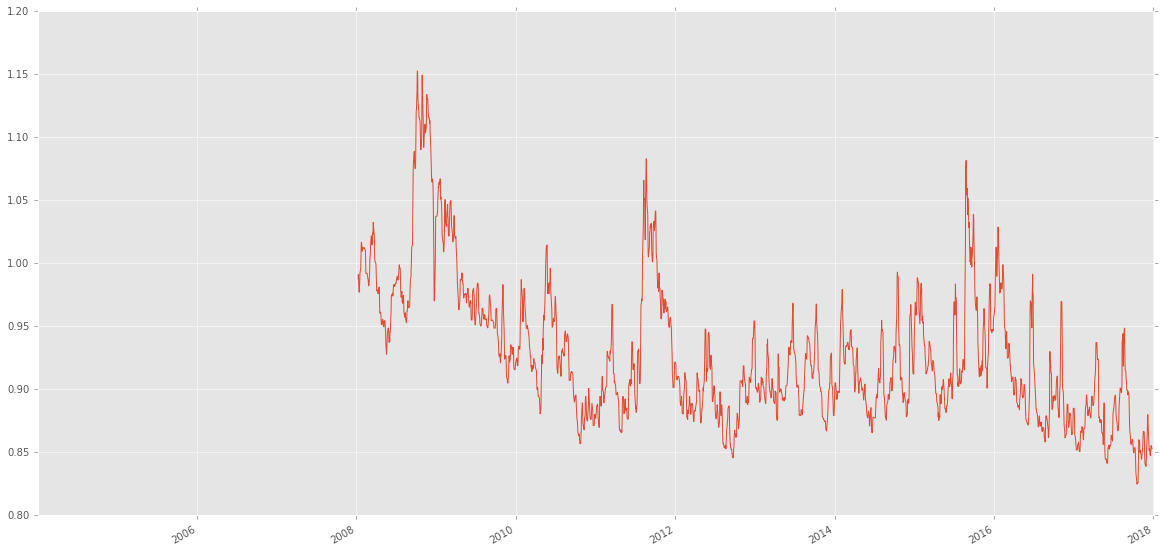

In [196]:
# Starting from signal 1
trade_data['signal'] = trade_data['vix3m']/trade_data['vixmt']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=4)
trade_data.loc[:,'signal'].plot(figsize=(20, 10))

In [197]:
print trade_data.loc[:,'signal'].quantile(0.6), trade_data.loc[:,'signal'].quantile(0.7) 
print trade_data.loc[:,'signal'].quantile(0.8), trade_data.loc[:,'signal'].quantile(0.95) 

0.929691035761 0.949340822264
0.969532951844 1.036134832


In [202]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[trade_data['signal'] < .96, 'xiv_sig'] = 0.66
trade_data.loc[trade_data['signal'] < .96, 'vxz_sig'] = 0.33

#trade_data.loc[(trade_data['signal'] >= 1.0) & (trade_data['signal'] < 1.05), 'xiv_sig'] = 0.0
#trade_data.loc[(trade_data['signal'] >= 1.0) & (trade_data['signal'] < 1.05), 'vxz_sig'] = 1.0

#trade_data.loc[(trade_data['signal'] >= 1.05) & (trade_data['signal'] < 1.15), 'xiv_sig'] = 0.3
#trade_data.loc[(trade_data['signal'] >= 1.05) & (trade_data['signal'] < 1.15), 'vxz_sig'] = 0.7

trade_data.loc[trade_data['signal'] >= 1.03, 'xiv_sig'] = 0.5
trade_data.loc[trade_data['signal'] >= 1.03, 'vxz_sig'] = 0.5

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.000986128605879
robust average return:  0.00117777699841
worst return:  -0.145391862921
std:  0.017678743002
win rate:  1.44104134763
win size:  0.0121915801213
robust win size:  0.00954532185082
sharpe:  0.885487520779


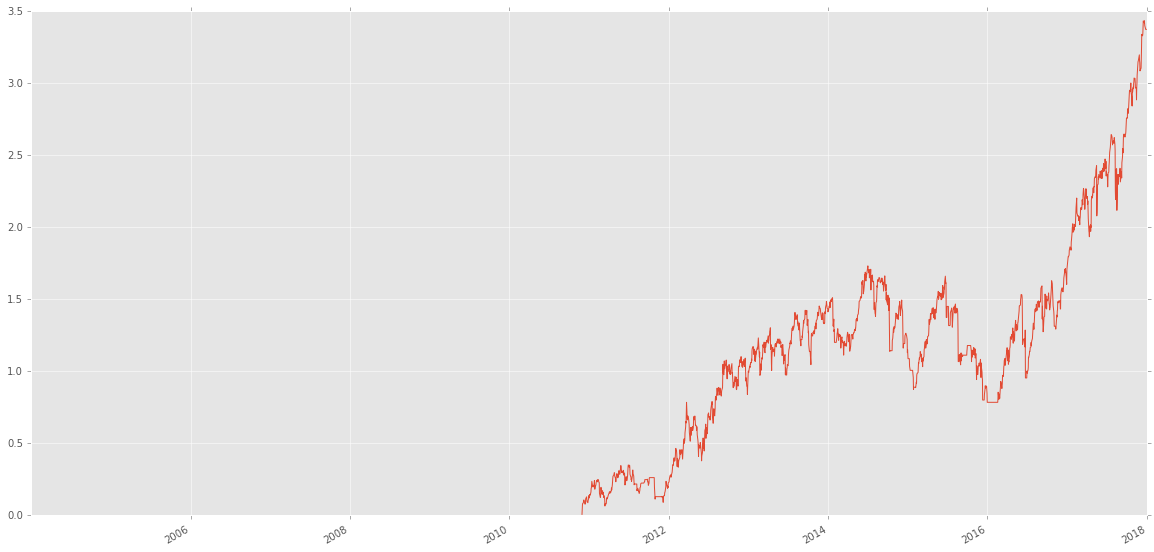

In [203]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,'cum_pnl'].plot(figsize = (20, 10))

### Signal VIX/VIX45

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).median()
  app.launch_new_instance()


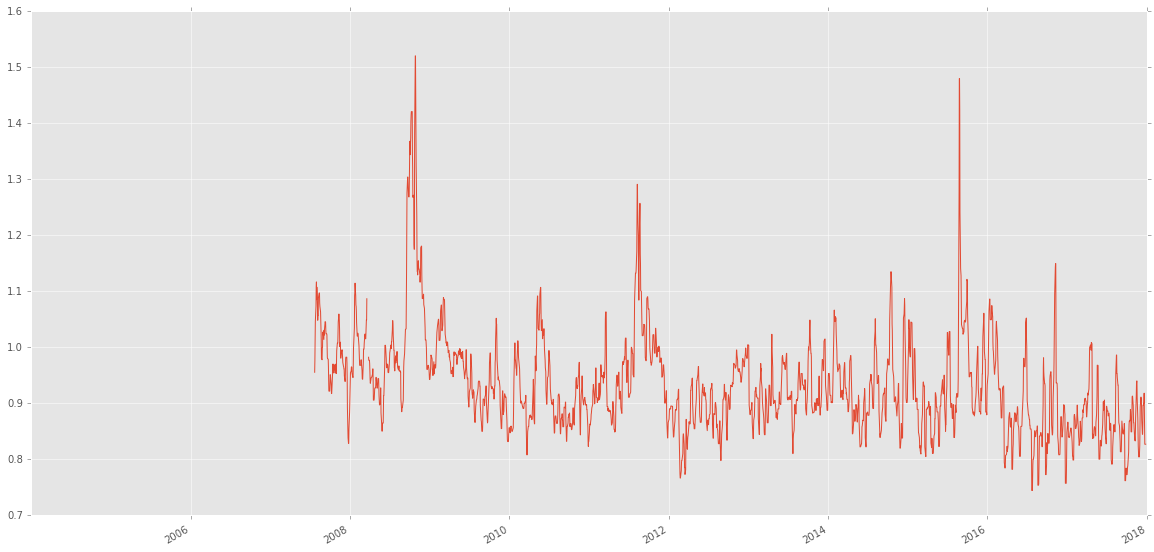

In [187]:
trade_data['vix45'] = (trade_data['vix30'] + trade_data['vix60'])/2.0
trade_data['signal'] = trade_data['vix']/trade_data['vix45']
trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=4)
trade_data.loc[:,'signal'].plot(figsize=(20, 10))

In [188]:
print trade_data.loc[:,'signal'].quantile(0.6), trade_data.loc[:,'signal'].quantile(0.7) 
print trade_data.loc[:,'signal'].quantile(0.8), trade_data.loc[:,'signal'].quantile(0.95) 

0.940711719038 0.963539524971
0.987548609976 1.07887979433


In [194]:
trade_data['xiv_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[trade_data['signal'] < 0.91, 'xiv_sig'] = 0.7
trade_data.loc[trade_data['signal'] < 0.91, 'vxz_sig'] = 0.3

#trade_data.loc[(trade_data['signal'] >= 1.0) & (trade_data['signal'] < 1.05), 'xiv_sig'] = 0.0
#trade_data.loc[(trade_data['signal'] >= 1.0) & (trade_data['signal'] < 1.05), 'vxz_sig'] = 1.0

#trade_data.loc[(trade_data['signal'] >= 1.05) & (trade_data['signal'] < 1.1), 'xiv_sig'] = 0.2
#trade_data.loc[(trade_data['signal'] >= 1.05) & (trade_data['signal'] < 1.1), 'vxz_sig'] = 0.8

trade_data.loc[trade_data['signal'] >= 1.1, 'xiv_sig'] = 0.5
trade_data.loc[trade_data['signal'] >= 1.1, 'vxz_sig'] = 0.5

trade_data['xiv_pnl'] = trade_data['xiv_sig'] * trade_data['real_ret_xiv']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['xiv_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.000715089900993
robust average return:  0.0
worst return:  -0.110289257411
std:  0.0135029285664
win rate:  1.45343137255
win size:  0.0119017580043
robust win size:  0.00954022653145
sharpe:  0.840684315452


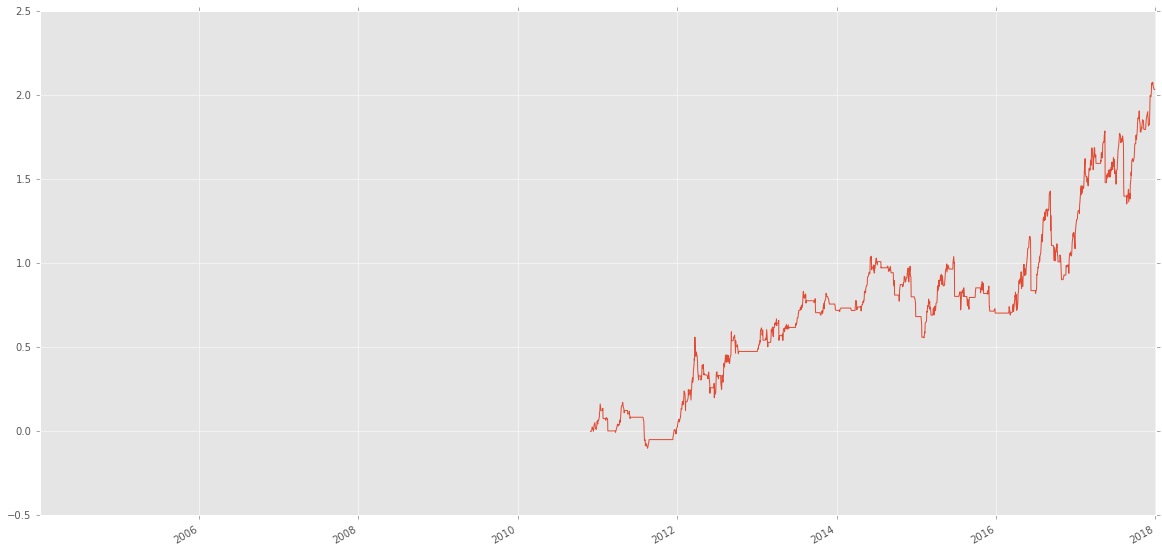

In [195]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[:,'cum_pnl'].plot(figsize = (20, 10))

In order, I need to try things below. 

1. UVXY instead of XIV
2. A robust threshold setting based on rolling values. 
3. Longer back-test.
4. Open-to-open instead of close-to-close. How much of Sharpe is lost
5. Look at sortino and ulcer index. Plus drawdowns.


## Robustness Analysis
### UVXY

In [18]:
all_signals = pd.concat([vix.loc[:,'VIX Close'], vxst.loc[:,'Close']], axis=1, join='outer')
all_signals = pd.concat([all_signals, vix3m.loc[:,'CLOSE']], axis=1, join='outer')
ts_vix_settle = ts_vix.loc[:,['settle_' + str(a) for a in range(1, 8)]]
all_signals = pd.concat([all_signals, ts_vix_settle], axis=1, join='outer')
all_signals = pd.concat([all_signals, vixmt.loc[:,'Close']], axis=1, join='outer')
all_signals.columns = ['vix', 'vxst', 'vix3m', 'vix30', 'vix60', 'vix90', 'vix120', 'vix150', 'vix180', 'vix210', 'vixmt']
all_signals.head()

vix  vxst  vix3m  vix30  vix60  vix90  vix120  vix150  vix180  \
2004-01-02  18.22   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-05  17.49   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-06  16.73   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-07  15.50   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2004-01-08  15.61   NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

            vix210  vixmt  
2004-01-02     NaN    NaN  
2004-01-05     NaN    NaN  
2004-01-06     NaN    NaN  
2004-01-07     NaN    NaN  
2004-01-08     NaN    NaN

In [19]:
uvxy_ret = pd.DataFrame(columns=['close_uvxy', 'ret_uvxy'], index=pd.to_datetime(uvxy.index))
uvxy_ret['close_uvxy'] = uvxy.loc[:,'adj_close']
uvxy_ret.sort_index(axis=0)
uvxy_ret['ret_uvxy'] = (uvxy_ret.close_uvxy - uvxy_ret.close_uvxy.shift(-1))/uvxy_ret.close_uvxy.shift(-1)
#
vxz_ret = pd.DataFrame(columns=['close_vxz', 'ret_vxz'], index=pd.to_datetime(vxz.index))
vxz_ret['close_vxz'] = vxz.loc[:,'adj_close']
vxz_ret.sort_index(axis=0)
vxz_ret['ret_vxz'] = (vxz_ret.close_vxz - vxz_ret.close_vxz.shift(-1))/vxz_ret.close_vxz.shift(-1)
#
rets = pd.concat([uvxy_ret, vxz_ret], axis=1, join='inner')
rets['real_ret_uvxy'] = rets.loc[:,'ret_uvxy'].shift(1)
rets['real_ret_vxz'] = rets.loc[:,'ret_vxz'].shift(1)

In [29]:
# Combining it all
trade_data = pd.concat([all_signals, rets], axis = 1, join='outer')

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()


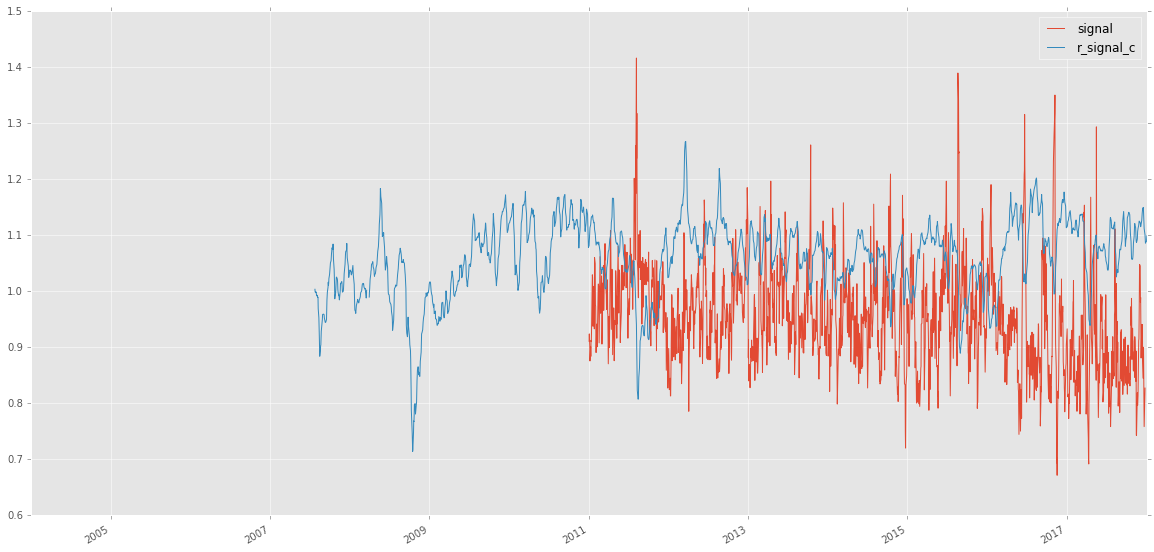

In [30]:
# Starting from signal 1
trade_data['signal'] = trade_data['vxst']/trade_data['vix']
#trade_data['signal'] = pd.rolling_median(trade_data['signal'], window=3)
trade_data['r_signal_c'] = pd.rolling_mean(trade_data['vix60']/trade_data['vix30'], window=6)
trade_data['r_diff_signal_c'] = trade_data['r_signal_c'].diff(1)
trade_data['r_signal_b'] = pd.rolling_mean(trade_data['vix180']/trade_data['vix150'], window=6)
trade_data['r_diff_signal_b'] = trade_data['r_signal_b'].diff(1)
#
trade_data.loc[:,['signal', 'r_signal_c']].plot(figsize=(20, 10))

In [31]:
print trade_data['signal'].quantile(0.7), trade_data['signal'].quantile(0.9) 

0.994661304018 1.060007475


/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.expanding_quantile is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=132).quantile(quantile=0.7)
  from ipykernel import kernelapp as app
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.expanding_quantile is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=132).quantile(quantile=0.9)
  app.launch_new_instance()
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_quantile is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).quantile(quantile=0.7)
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_quantile is deprecated for Series and will be 

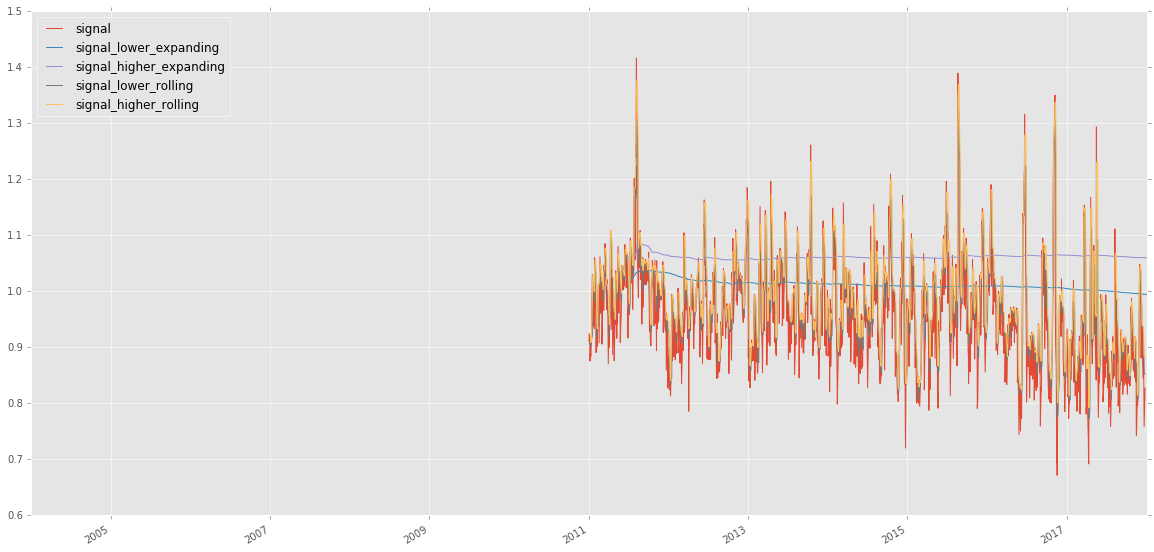

In [80]:
# Adding the rolling threshold and expanding window threshold for the signal
trade_data['signal_lower_expanding'] = pd.expanding_quantile(trade_data['signal'], min_periods=132, quantile=0.7)
trade_data['signal_higher_expanding'] = pd.expanding_quantile(trade_data['signal'], min_periods=132, quantile=0.9)
# Rolling signal
trade_data['signal_lower_rolling'] = pd.rolling_quantile(trade_data['signal'], window = 5, quantile=0.7)
trade_data['signal_higher_rolling'] = pd.rolling_quantile(trade_data['signal'], window = 5, quantile=0.9)
#
trade_data.loc[:, ['signal', 'signal_lower_expanding', 'signal_higher_expanding', 'signal_lower_rolling',\
                  'signal_higher_rolling']].plot(figsize = (20, 10))


In [78]:
trade_data['uvxy_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[(trade_data['signal'] < 0.95) & (trade_data['r_diff_signal_c'] > 0.0), 'uvxy_sig'] = -0.7
trade_data.loc[(trade_data['signal'] < 0.95) & (trade_data['r_diff_signal_c'] > 0.0), 'vxz_sig'] = 0.3

#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'uvxy_sig'] = 0.6
#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'vxz_sig'] = 0.4

#trade_data.loc[(trade_data['signal'] > 1.05) & (trade_data['r_diff_signal_c'] < 0.0), 'uvxy_sig'] = 0.0
#trade_data.loc[(trade_data['signal'] > 1.05) & (trade_data['r_diff_signal_c'] < 0.0), 'vxz_sig'] = 0.0

trade_data['uvxy_pnl'] = trade_data['uvxy_sig'] * trade_data['real_ret_uvxy']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['uvxy_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.00206115539153
robust average return:  0.0
worst return:  -0.232377834302
std:  0.0219694791772
win rate:  1.82631578947
win size:  0.0255144172894
robust win size:  0.0201557845084
sharpe:  1.48933104936


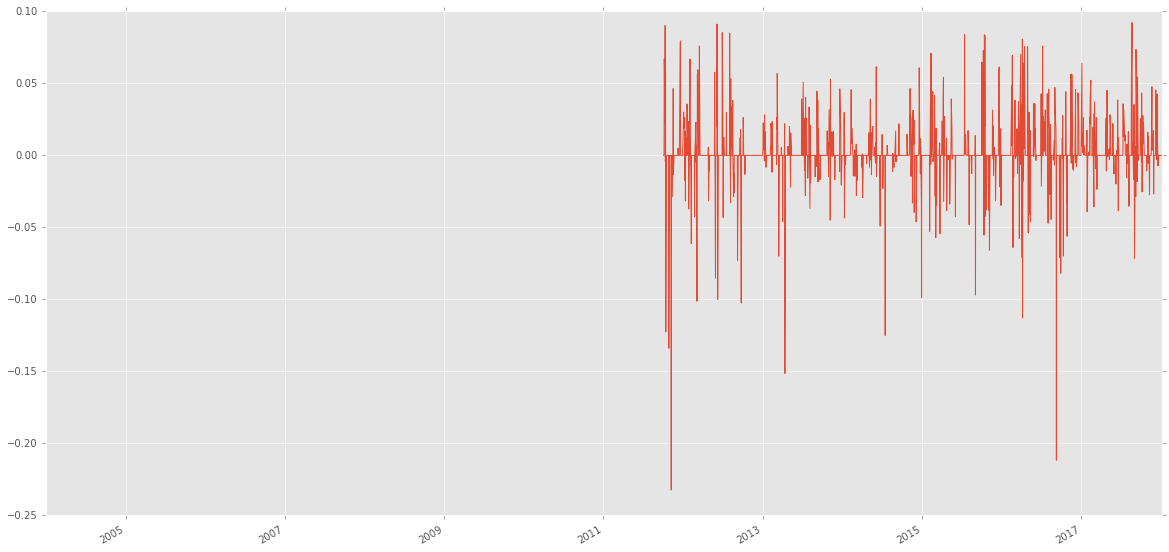

In [65]:
# let's look at the PnL
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

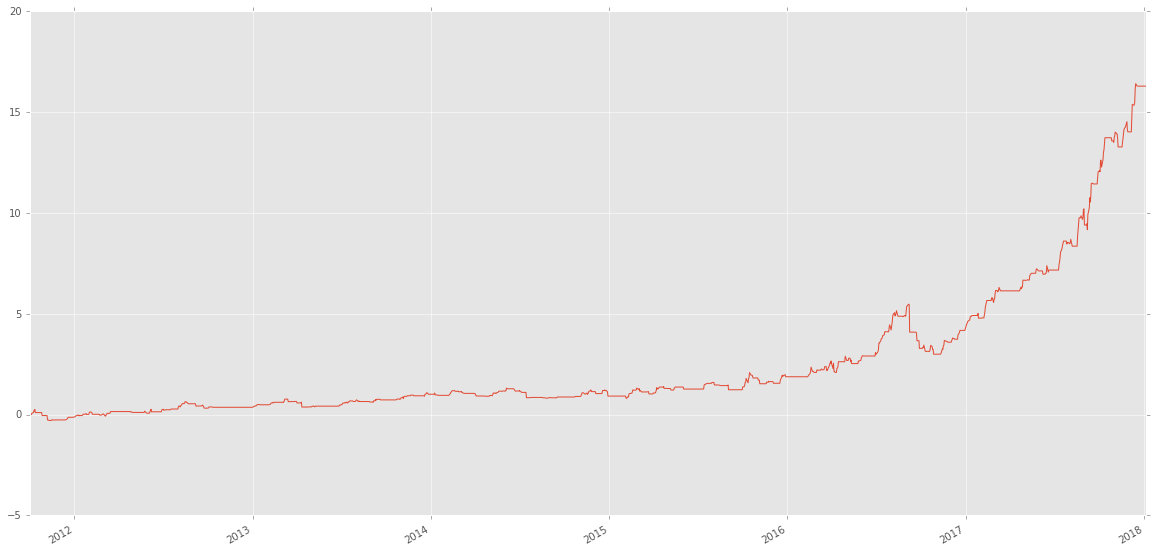

In [66]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[trade_data.index > datetime.datetime(2011, 10, 1),'cum_pnl'].plot(figsize = (20, 10))

## Rolling Signal
second part of analysis is based on rolling and expanding signal

In [81]:
trade_data['uvxy_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[(trade_data['signal'] < trade_data['signal_lower_rolling']) & (trade_data['r_diff_signal_c'] > 0.0),\
               'uvxy_sig'] = -0.75
trade_data.loc[(trade_data['signal'] < trade_data['signal_lower_rolling']) & (trade_data['r_diff_signal_c'] > 0.0), \
               'vxz_sig'] = 0.25

#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'uvxy_sig'] = 0.6
#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'vxz_sig'] = 0.4

#trade_data.loc[(trade_data['signal'] > trade_data['signal_higher_rolling']) & (trade_data['r_diff_signal_c'] < 0.0), \
#               'uvxy_sig'] = 0.0
#trade_data.loc[(trade_data['signal'] > trade_data['signal_higher_rolling']) & (trade_data['r_diff_signal_c'] < 0.0), \
#               'vxz_sig'] = 0.0

trade_data['uvxy_pnl'] = trade_data['uvxy_sig'] * trade_data['real_ret_uvxy']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['uvxy_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.00332860973193
robust average return:  0.0
worst return:  -0.255348721964
std:  0.026349419657
win rate:  1.86802030457
win size:  0.0317729711358
robust win size:  0.0251735012664
sharpe:  2.00535882997


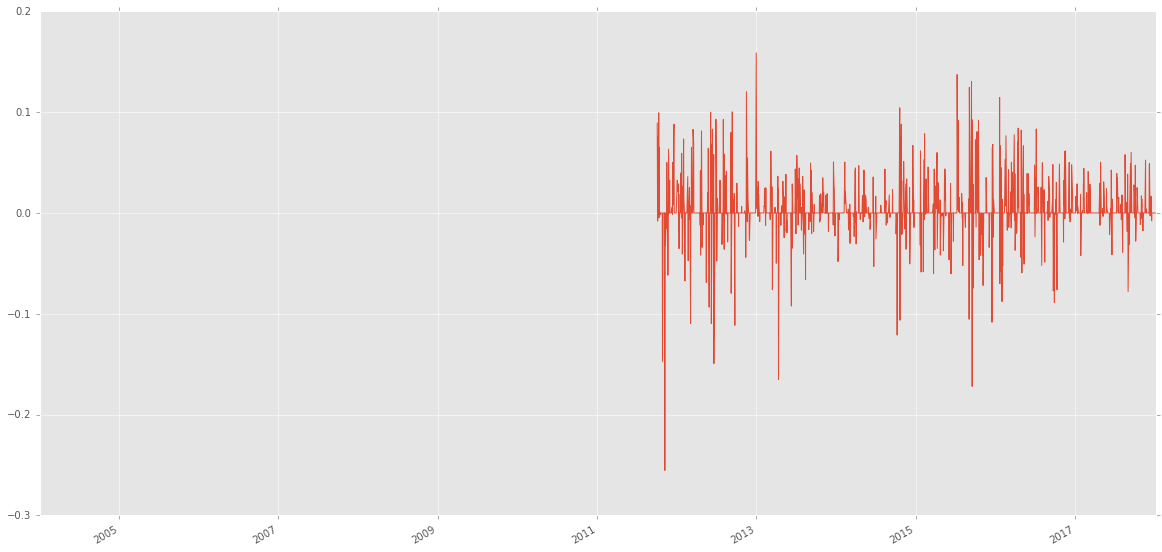

In [82]:
# let's look at the PnL
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

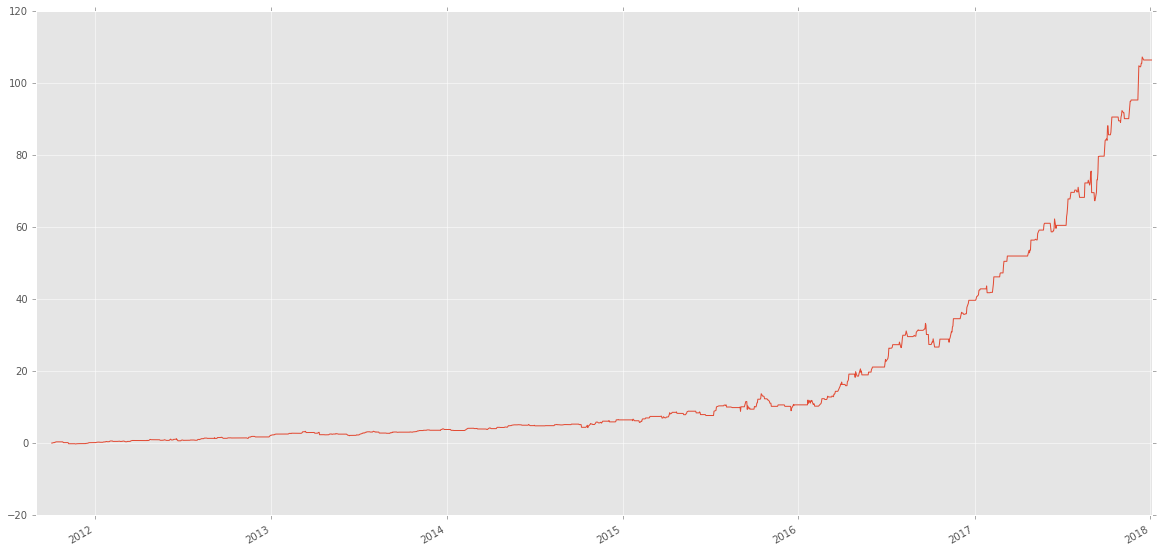

In [83]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[trade_data.index > datetime.datetime(2011, 9, 1),'cum_pnl'].plot(figsize = (20, 10))

## Expanding Signal
Third part of the analysis

In [49]:
trade_data['uvxy_sig'] = 0
trade_data['vxz_sig'] = 0

trade_data.loc[(trade_data['signal'] < trade_data['signal_lower_expanding']) & (trade_data['r_diff_signal_c'] > 0.0),\
               'uvxy_sig'] = -0.7
trade_data.loc[(trade_data['signal'] < trade_data['signal_lower_expanding']) & (trade_data['r_diff_signal_c'] > 0.0), \
               'vxz_sig'] = 0.3

#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'uvxy_sig'] = 0.6
#trade_data.loc[(trade_data['signal'] >= 0.9) & (trade_data['signal'] < 0.98), 'vxz_sig'] = 0.4

#trade_data.loc[(trade_data['signal'] > trade_data['signal_higher_rolling']) & (trade_data['r_diff_signal_c'] < 0.0), \
#               'uvxy_sig'] = 0.0
#trade_data.loc[(trade_data['signal'] > trade_data['signal_higher_rolling']) & (trade_data['r_diff_signal_c'] < 0.0), \
#               'vxz_sig'] = 0.0

trade_data['uvxy_pnl'] = trade_data['uvxy_sig'] * trade_data['real_ret_uvxy']
trade_data['vxz_pnl'] = trade_data['vxz_sig'] * trade_data['real_ret_vxz']
trade_data['pnl'] = trade_data['uvxy_pnl'] + trade_data['vxz_pnl']
# =======================
print 'average return: ', trade_data.loc[:,'pnl'].mean()
print 'robust average return: ', trade_data.loc[:,'pnl'].median()
print 'worst return: ', trade_data.loc[:,'pnl'].min()
print 'std: ', trade_data.loc[:,'pnl'].std()
print 'win rate: ', float((trade_data.loc[:,'pnl'] > 0).sum())/float((trade_data.loc[:,'pnl'] < 0).sum())
print 'win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].mean()
print 'robust win size: ', trade_data.loc[trade_data['pnl'] > 0,'pnl'].median()
print 'sharpe: ', trade_data.pnl.mean()/trade_data.pnl.std() * np.sqrt(252)

average return:  0.00242685793063
robust average return:  0.0
worst return:  -0.232377834302
std:  0.0269243562755
win rate:  1.64157706093
win size:  0.0270227514776
robust win size:  0.0214315048538
sharpe:  1.43086708986


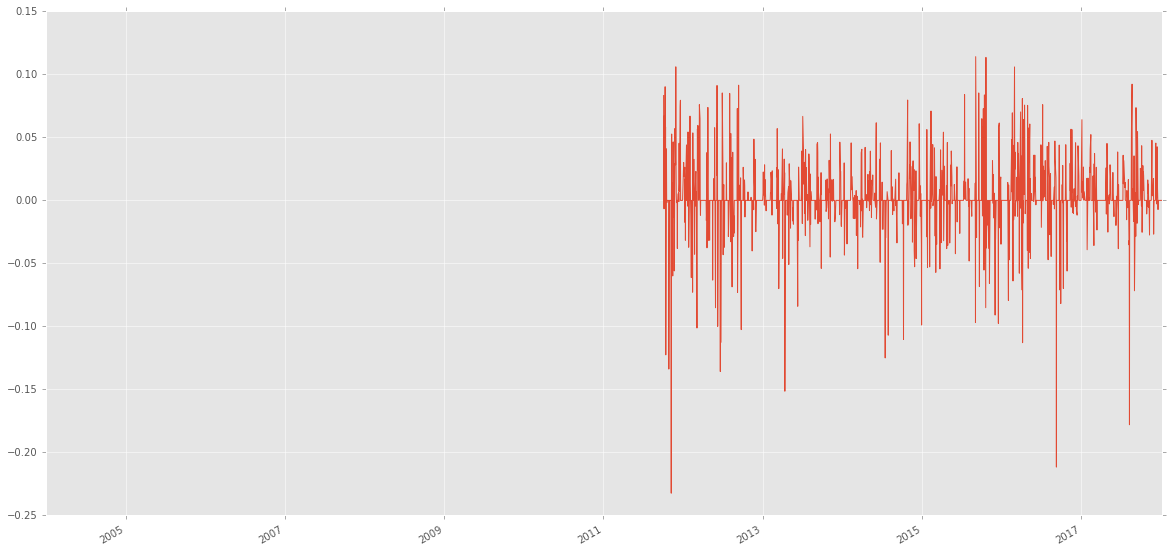

In [50]:
# let's look at the PnL
trade_data.loc[:,'pnl'].plot(figsize = (20, 10))

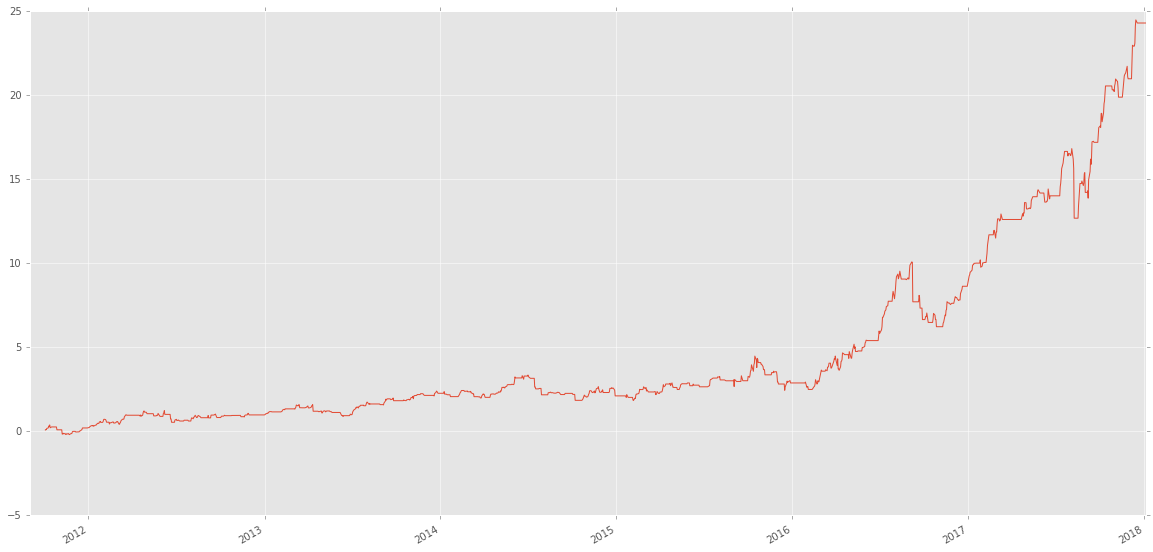

In [51]:
trade_data['cum_pnl'] = (1 + trade_data['pnl']).cumprod() - 1
trade_data.loc[trade_data.index > datetime.datetime(2011, 9, 1),'cum_pnl'].plot(figsize = (20, 10))

# Analysis 
## Trade Idea Generation

In [259]:
ts_vix_settle = ts_vix.loc[:,['settle_' + str(a) for a in range(1, 4)]]
ts_vix_settle = pd.concat([vix.loc[:,'VIX Close'], ts_vix_settle], axis = 1, join='inner')
ts_vix_settle.columns = ['VX0', 'VX1', 'VX2', 'VX3']
ts_vix_settle['VX1_over_VX0'] = ts_vix_settle.VX1/ts_vix_settle.VX0
ts_vix_settle['VX2_over_VX1'] = ts_vix_settle.VX2/ts_vix_settle.VX1
ts_vix_settle['VX3_over_VX2'] = ts_vix_settle.VX3/ts_vix_settle.VX2
ts_vix_settle['VX1_over_VX0_norm'] = ts_vix_settle.VX1_over_VX0/np.log(ts_vix_settle.VX0) * 100.0
ts_vix_settle['VX2_over_VX1_norm'] = ts_vix_settle.VX2_over_VX1/np.log(ts_vix_settle.VX0) * 100.0
ts_vix_settle['VX3_over_VX2_norm'] = ts_vix_settle.VX3_over_VX2/np.log(ts_vix_settle.VX0) * 100.0
#
xiv_ret = pd.DataFrame(columns=['close_xiv', 'ret_xiv'], index=pd.to_datetime(xiv.index))
xiv_ret['close_xiv'] = xiv.loc[:,'adj_close']
xiv_ret.sort_index(axis=0)
xiv_ret['ret_xiv'] = (xiv_ret.close_xiv - xiv_ret.close_xiv.shift(-1))/xiv_ret.close_xiv.shift(-1)
#
vxx_ret = pd.DataFrame(columns=['close_vxx', 'ret_vxx'], index=pd.to_datetime(vxx.index))
vxx_ret['close_vxx'] = vxx.loc[:,'adj_close']
vxx_ret.sort_index(axis=0)
vxx_ret['ret_vxx'] = (vxx_ret.close_vxx - vxx_ret.close_vxx.shift(-1))/vxx_ret.close_vxx.shift(-1)
#
rets = pd.concat([xiv_ret, vxx_ret], axis=1, join='inner')
#
trade_data = pd.concat([rets, ts_vix_settle], axis = 1, join='inner')
trade_data.sort_index(axis=0, inplace=True)
trade_data['ret_xiv_real'] = trade_data.loc[:,'ret_xiv'].shift(-1)
trade_data['ret_vxx_real'] = trade_data.loc[:,'ret_vxx'].shift(-1)

In [169]:
# a linear regression on the returns
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [170]:
dinn.sort_index(axis = 0, inplace = True)
dinn['vxx_ret'] = dinn.iloc[:, 0].pct_change()
dinn['vxz_ret'] = dinn.iloc[:, 1].pct_change()

In [171]:
dinn.head()

adj_close  adj_close   vxx_ret   vxz_ret
date                                                
2009-02-20  116039.68     431.92       NaN       NaN
2009-02-23  122245.12     443.04  0.053477  0.025746
2009-02-24  110673.92     426.92 -0.094656 -0.036385
2009-02-25  110028.80     426.92 -0.005829  0.000000
2009-02-26  111124.48     437.56  0.009958  0.024923

In [172]:
M, N = dinn.shape
X = dinn['vxx_ret'][1:].reshape((M - 1, 1))
Y = dinn['vxz_ret'][1:].reshape((M - 1, 1))
reg.fit(X, Y, )

/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/HoumanDehghan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
reg.coef_

array([[ 0.44929398]])

In order to design a strategy, we need to determine

1. Volatility regimes
2. Hedging strategy

I am attempting to do 1 right now. To do that, I am going to look at `XIV` returns versus `IVTS` and `VIX` level. 

In [264]:
ivts = vix.loc[:, 'VIX Close']/vix3m.loc[:,'CLOSE']
ivts.rename('ivts', inplace=True)
trade_data = pd.concat([trade_data, ivts], axis = 1, join='inner')

Mean: 0.000585232050952
Median: 0.00311583528018
std: 0.0262634054293
Worst: -0.178276699029
upperbound Kelly like on XIV: 0.022283174683
percentage of winning: 0.582417582418
win size: 0.0150962305254
win size (robust): 0.00319892246822
Mean of the implied vol ts:  0.812337387032
Median of the implied vol ts:  0.810344827586


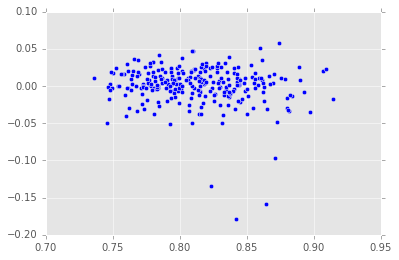

In [316]:
upper = 12
field = 'VX0'
plt.scatter(trade_data.loc[trade_data[field] < upper,'ivts'], trade_data.loc[trade_data[field] < upper,'ret_xiv_real'])
print 'Mean:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].median()
print 'std:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].mean()/trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median()
print 'Mean of the implied vol ts: ', trade_data.loc[trade_data[field] < upper,'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[trade_data[field] < upper,'ivts'].median()


Mean: 0.00195267861303
Median: 0.00461676285959
std: 0.0303678099825
Worst: -0.167283950617
upperbound Kelly like on XIV: 0.0753965606911
percentage of winning: 0.583067092652
win size: 0.0203416174635
win size (robust): 0.0165885322755
Mean of the implied vol ts:  0.862112462005
Median of the implied vol ts:  0.864108297089


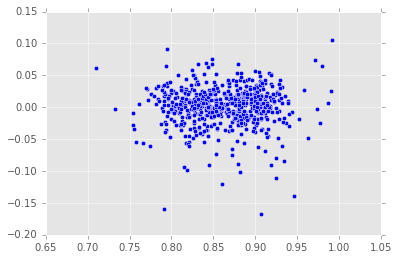

In [308]:
upper = 15
lower = 12
field = 'VX0'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


Mean: 0.00278820060704
Median: 0.00679274300132
std: 0.0430023359888
Worst: -0.267886855241
upperbound Kelly like on XIV: 0.0532442802409
percentage of winning: 0.573089700997
win size: 0.0308668385388
win size (robust): 0.025748502994
Mean of the implied vol ts:  0.898528877438
Median of the implied vol ts:  0.895557128233


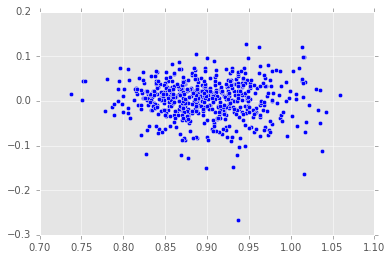

In [307]:
upper = 20
lower = 15
field = 'VX0'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


Mean: 0.0086550989327
Median: 0.0161473445187
std: 0.0523717084838
Worst: -0.194174757282
upperbound Kelly like on XIV: 0.0437188034282
percentage of winning: 0.653594771242
win size: 0.0392078479232
win size (robust): 0.0334427346827
Mean of the implied vol ts:  0.944120275225
Median of the implied vol ts:  0.944421740907


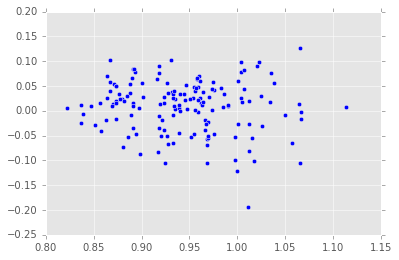

In [306]:
upper = 25
lower = 20
field = 'VX0'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


Mean: -0.00439208728231
Median: 0.00171232876712
std: 0.061430271414
Worst: -0.199792960663
upperbound Kelly like on XIV: 0.0372719894557
percentage of winning: 0.515789473684
win size: 0.0387318800343
win size (robust): 0.0368525896414
Mean of the implied vol ts:  0.986329916525
Median of the implied vol ts:  0.983907185629


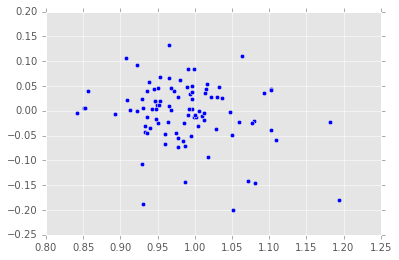

In [305]:
upper = 35
lower = 25
field = 'VX0'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


In [313]:
# ok I don't think I had the calibratio right.
# Let's re do the exercise with something else. For example, the ivts!

Mean: 0.00382302506224
Median: 0.00474811141981
std: 0.0262492658589
Worst: -0.159732540862
upperbound Kelly like on XIV: 0.145643123232
percentage of winning: 0.606349206349
win size: 0.0189340681522
win size (robust): 0.0062015503876
Kelly 2:  0.215124611735
Mean of the implied vol ts:  0.793083633012
Median of the implied vol ts:  0.796296296296


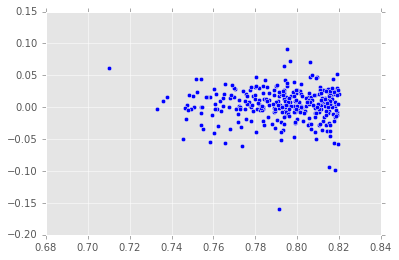

In [317]:
upper = 0.82
field = 'ivts'
plt.scatter(trade_data.loc[trade_data[field] < upper,'ivts'], trade_data.loc[trade_data[field] < upper,'ret_xiv_real'])
print 'Mean:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].median()
print 'std:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].mean()/trade_data.loc[trade_data[field] < upper,'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median()
prob = float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
odds = trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median() + 1.0
print 'Kelly 2: ', (prob * (1 + odds) - 1)/odds
print 'Mean of the implied vol ts: ', trade_data.loc[trade_data[field] < upper,'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[trade_data[field] < upper,'ivts'].median()


Mean: 0.00236796767008
Median: 0.00491519510493
std: 0.0297967346631
Worst: -0.178276699029
upperbound Kelly like on XIV: 0.0761087587612
percentage of winning: 0.585051546392
win size: 0.0202862565855
win size (robust): 0.0158404224113
Kelly 2:  0.191288375754
Mean of the implied vol ts:  0.84091079512
Median of the implied vol ts:  0.841495923521


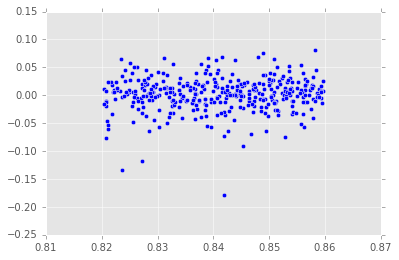

In [318]:
upper = 0.86
lower = 0.82
field = 'ivts'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
prob = float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
odds = trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median() + 1.0
print 'Kelly 2: ', (prob * (1 + odds) - 1)/odds
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


Mean: 0.00301920354259
Median: 0.00652476273924
std: 0.0362146543279
Worst: -0.158427495292
upperbound Kelly like on XIV: 0.0570022965835
percentage of winning: 0.583333333333
win size: 0.0255288287365
win size (robust): 0.0202108963093
Kelly 2:  0.183162557753
Mean of the implied vol ts:  0.879972773888
Median of the implied vol ts:  0.880018107741


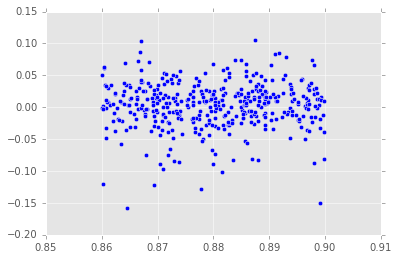

In [319]:
upper = 0.9
lower = 0.86
field = 'ivts'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
prob = float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
odds = trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median() + 1.0
print 'Kelly 2: ', (prob * (1 + odds) - 1)/odds
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


Mean: 0.00205073957218
Median: 0.00533687965692
std: 0.0390570811161
Worst: -0.167283950617
upperbound Kelly like on XIV: 0.0596688469624
percentage of winning: 0.580769230769
win size: 0.0269105805117
win size (robust): 0.0213950126491
Kelly 2:  0.179295445489
Mean of the implied vol ts:  0.914086636313
Median of the implied vol ts:  0.913924843166


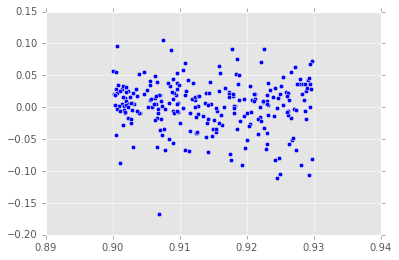

In [320]:
upper = 0.93
lower = 0.90
field = 'ivts'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
prob = float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
odds = trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median() + 1.0
print 'Kelly 2: ', (prob * (1 + odds) - 1)/odds
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()


Mean: -0.00291370548727
Median: 0.0084449017098
std: 0.0681407970445
Worst: -0.199792960663
upperbound Kelly like on XIV: 0.0336014330285
percentage of winning: 0.51724137931
win size: 0.0481618855762
win size (robust): 0.0425530764136
Kelly 2:  0.166684480757
Mean of the implied vol ts:  1.04785497871
Median of the implied vol ts:  1.03103904477


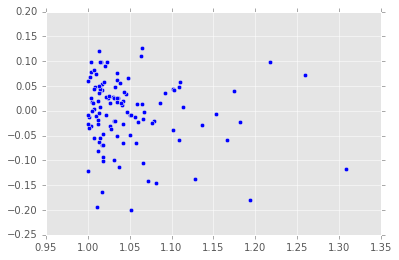

In [327]:
upper = 2.0
lower = 1.0
field = 'ivts'
plt.scatter(trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'], trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'])
print 'Mean:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].mean()
print 'Median:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].median()
print 'std:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
print 'Worst:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].min()
print 'upperbound Kelly like on XIV:', \
trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) < upper,'ret_xiv_real'].mean()/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'].std()
#print 'semi-robust upperbound Kelly like on XIV:', \
#trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()/(trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'] - trade_data.loc[trade_data['VX0'] < upper,'ret_xiv'].median()).median()
print 'percentage of winning:', float((trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ret_xiv_real'] > 0).sum())/trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),:].shape[0]
print 'win size:', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].mean()
print 'win size (robust):', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper) & (trade_data['ret_xiv_real'] > 0),'ret_xiv_real'].median()
prob = float((trade_data.loc[trade_data[field] < upper,'ret_xiv_real'] > 0).sum())/trade_data.loc[trade_data[field] < upper,:].shape[0]
odds = trade_data.loc[(trade_data[field] < upper) & (trade_data['ret_xiv'] > 0),'ret_xiv_real'].median() + 1.0
print 'Kelly 2: ', (prob * (1 + odds) - 1)/odds
print 'Mean of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].mean()
print 'Median of the implied vol ts: ', trade_data.loc[(trade_data[field] >= lower) & (trade_data[field] < upper),'ivts'].median()
